## Data Scientist Intern Assessment: Shantanu Pagare

### Aim: To predict the rank of players based on the given player data, I will use a machine learning algorithm with python. One popular algorithm for predicting categorical outcomes like ranks/LeagueIndex, is the Random Forest Classifier. Our data has less than 1 million rows even less than 10,000 rows, so an ML algorithm would be great to solve this type of problem. 

### I chose a Classifier because we can classify/predict the ranks of the players based on the LeagueIndex and other factors like, Actions made by a player per minute, hours played by a player, etc. (all important columns are mentioned below as well). 

### Importing necesssary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

### Exploratory Data Analysis/Extract, Transform, Load:

In [2]:
# Importing the data:
df_player = pd.read_csv('C://Users//shant//Downloads//Intership and Job Companies//Evil_Geniuses_Assessment//starcraft_player_data.csv')
df_player

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [3]:
df_player.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
df_player.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


In [5]:
df_player.shape

(3395, 20)

In [6]:
df_player.nunique()

GameID                  3395
LeagueIndex                8
Age                       29
HoursPerWeek              33
TotalHours               238
APM                     3374
SelectByHotkeys         3373
AssignToHotkeys         3307
UniqueHotkeys             11
MinimapAttacks          1728
MinimapRightClicks      3159
NumberOfPACs            3386
GapBetweenPACs          3358
ActionLatency           3367
ActionsInPAC            3223
TotalMapExplored          52
WorkersMade             3256
UniqueUnitsMade           12
ComplexUnitsMade        1059
ComplexAbilitiesUsed    1658
dtype: int64

### After reviewing the dataset, I did found some null/'?' values and I want to replace them with the mean of those values. Another thing could have been to just ignore those values.
### Columns that should be handeled, Age, HoursPerWeek, and TotalHours

In [7]:
null_values = df_player.isnull().sum()
print(null_values)

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64


In [8]:
df_player['Age'].max()

'?'

In [9]:
df_player['Age'].min()

'16'

In [10]:
df_player['TotalHours'].max()

'?'

In [11]:
df_player['TotalHours'].min()

'10'

In [12]:
df_player['HoursPerWeek'].max()

'?'

In [13]:
df_player['HoursPerWeek'].min()

'0'

In [14]:
df_player['ActionLatency'].max()

176.3721

In [15]:
df_player['ActionLatency'].min()

24.0936

### Age:

In [16]:
# Replacing '?' with NaN
df_player['Age'] = df_player['Age'].replace('?', np.nan)

# Converting the column to numeric type
df_player['Age'] = pd.to_numeric(df_player['Age'])

# Calculating the mean value
mean_value = df_player['Age'].mean()

# Replacing null values and '?' with the mean value
df_player['Age'].fillna(mean_value, inplace=True)

In [17]:
df_player.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,21.647904,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,21.647904,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,21.647904,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,21.647904,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,21.647904,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


### HoursPerWeek:

In [18]:
# Replacing '?' with NaN
df_player['HoursPerWeek'] = df_player['HoursPerWeek'].replace('?', np.nan)

# Converting the column to numeric type
df_player['HoursPerWeek'] = pd.to_numeric(df_player['HoursPerWeek'])

# Calculating the mean value
mean_value = df_player['HoursPerWeek'].mean()

# Replacing null values and '?' with the mean value
df_player['HoursPerWeek'].fillna(mean_value, inplace=True)

In [19]:
df_player.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,21.647904,15.910752,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,21.647904,15.910752,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,21.647904,15.910752,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,21.647904,15.910752,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,21.647904,15.910752,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


### TotalHours:

In [20]:
# Replacing '?' with NaN
df_player['TotalHours'] = df_player['TotalHours'].replace('?', np.nan)

# Converting the column to numeric type
df_player['TotalHours'] = pd.to_numeric(df_player['TotalHours'])

# Calculating the mean value
mean_value = df_player['TotalHours'].mean()

# Replacing null values and '?' with the mean value
df_player['TotalHours'].fillna(mean_value, inplace=True)

In [21]:
df_player.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,21.647904,15.910752,960.421809,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,21.647904,15.910752,960.421809,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,21.647904,15.910752,960.421809,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,21.647904,15.910752,960.421809,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,21.647904,15.910752,960.421809,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


### Exploring the data and doing some data preprocessing like adjusting the null values by dropping them or more probably filling them with the mean strategy:

In [22]:
important_columns = ['APM', 'HoursPerWeek', 'TotalHours', 'ActionLatency']

In [23]:
variances = df_player[important_columns].var()
print(variances)

APM              2.698313e+03
HoursPerWeek     1.407500e+02
TotalHours       2.948808e+08
ActionLatency    3.701341e+02
dtype: float64


In [24]:
df_player.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.172119,11.863809,17172.094828,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


### To observe the Variablity in the dataset:
#### To assess mean, median, mode and see if there are any outliers in the dataset

### Age:

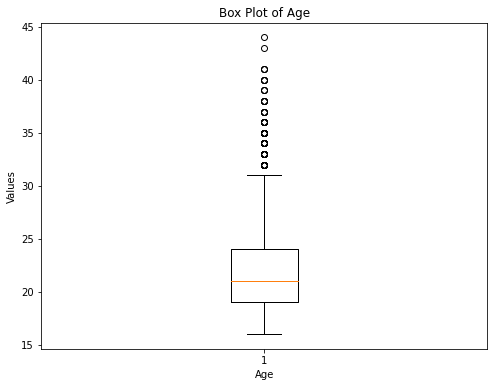

In [25]:
# Mean is 22, Majority players are between 19 to 24 age bracket
age = 'Age'
plt.figure(figsize=(8, 6))

# Create the box plot
plt.boxplot(df_player[age])

plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of {}'.format(age))

plt.show()

### HoursPerWeek:

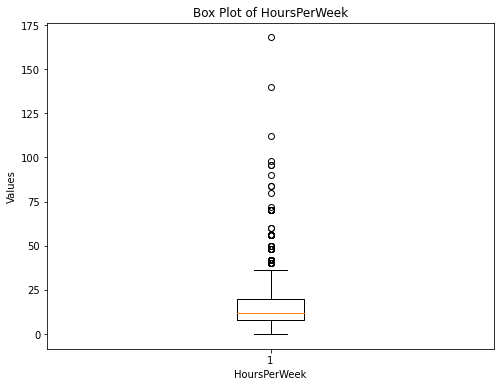

In [26]:
hrsperweek = 'HoursPerWeek'
plt.figure(figsize=(8, 6))

# Create the box plot
plt.boxplot(df_player[hrsperweek])

plt.xlabel('HoursPerWeek')
plt.ylabel('Values')
plt.title('Box Plot of {}'.format(hrsperweek))

plt.show()

### TotalHours:

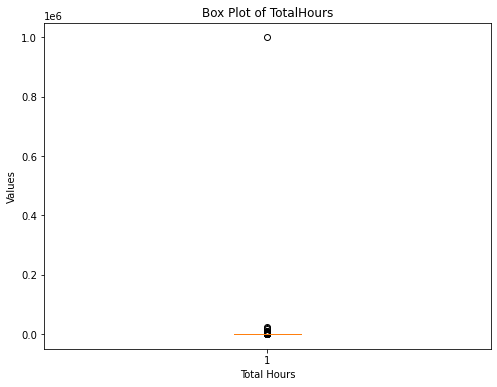

In [27]:
# One player is extremly experienced and has played more than 100,000 hrs and it can be the player who age is 44 in the dataset
totalhours = 'TotalHours'
plt.figure(figsize=(8, 6))

# Create the box plot
plt.boxplot(df_player[totalhours])

plt.xlabel('Total Hours')
plt.ylabel('Values')
plt.title('Box Plot of {}'.format(totalhours))

plt.show()

### ActionLatency:

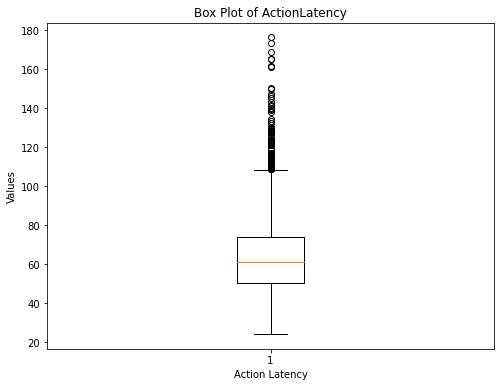

In [28]:
actionlatency = 'ActionLatency'
plt.figure(figsize=(8, 6))

# Create the box plot
plt.boxplot(df_player[actionlatency])

plt.xlabel('Action Latency')
plt.ylabel('Values')
plt.title('Box Plot of {}'.format(actionlatency))

plt.show()

### I found the most important columns for our analysis would be 'LeagueIndex', 'HoursPerWeek', 'TotalHours', 'APM (Actions Per Minute)', and 'Action Latency'

### After some readings/gaining some domain knowledge, I found that their can be several ranks in a game of Starcraft or a similar game as League of Lengends:

#### 1. Challenger, 2. GrandMaster, 3. Master, 4.Diamond, 5.Platinum, 6.Gold, 7.Silver, 8.Bronze, 9.Iron

#### Using Box Plots too, to see Variablity and Also making some box plots below:

### Age:

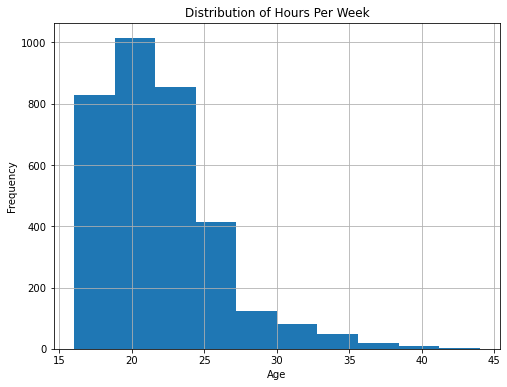

In [29]:
# So, our data is left skewed for 'Age of players':

plt.figure(figsize=(8, 6))
df_player['Age'].hist()

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Per Week')

plt.show()

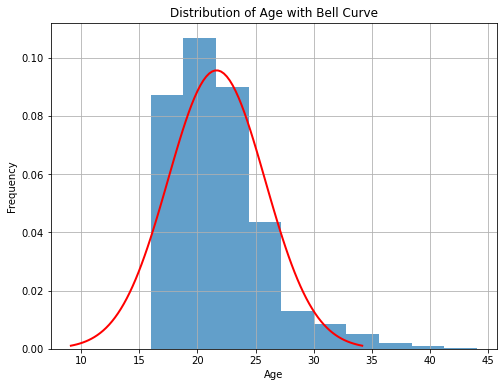

In [30]:
plt.figure(figsize=(8, 6))

# Plot the histogram
df_player['Age'].hist(density=True, alpha=0.7)

# Calculate mean and standard deviation
mu = df_player['Age'].mean()
sigma = df_player['Age'].std()

# Create a range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Plot the bell curve
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age with Bell Curve')

plt.show()

### HoursPerWeek:

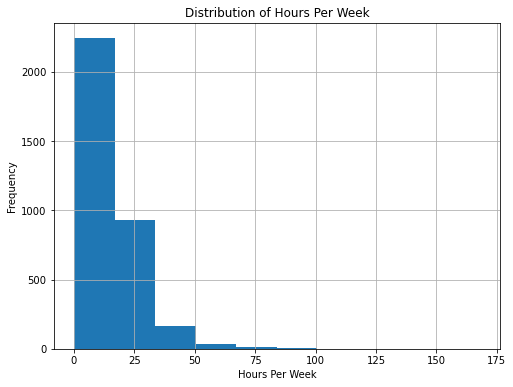

In [31]:
# So, our data is left skewed for 'Hours Played Per Week':

plt.figure(figsize=(8, 6))
df_player['HoursPerWeek'].hist()

plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Per Week')

plt.show()

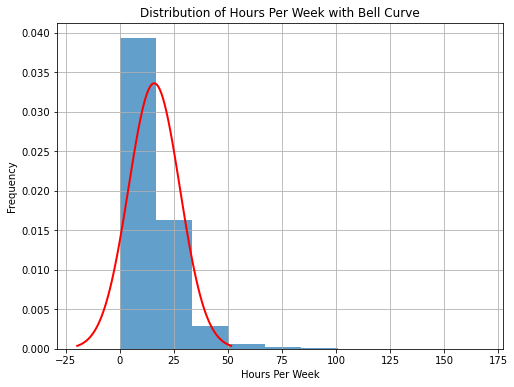

In [32]:
# Assuming df_player is your DataFrame
plt.figure(figsize=(8, 6))

# Plot the histogram
df_player['HoursPerWeek'].hist(density=True, alpha=0.7)

# Calculate mean and standard deviation
mu = df_player['HoursPerWeek'].mean()
sigma = df_player['HoursPerWeek'].std()

# Create a range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Plotting the bell curve
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)

plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Per Week with Bell Curve')

plt.show()

### TotalHours:

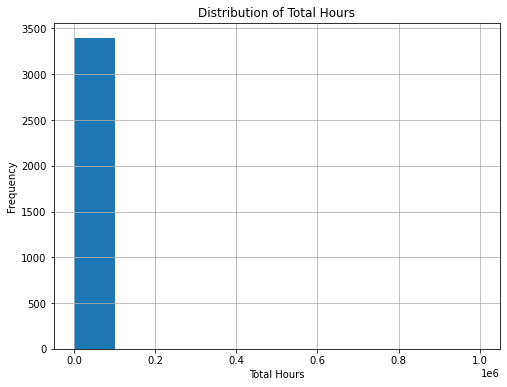

In [33]:
# Again Left Skewed, because of one highly experienced player:
plt.figure(figsize=(8, 6))
df_player['TotalHours'].hist()

plt.xlabel('Total Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Total Hours')

plt.show()

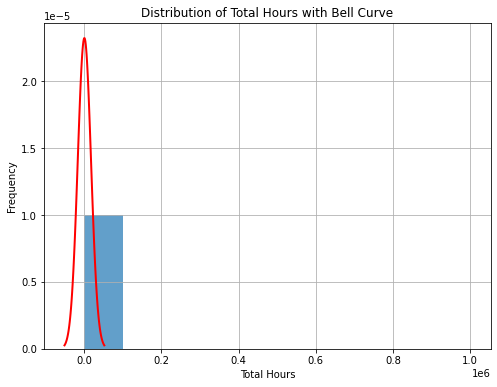

In [34]:
plt.figure(figsize=(8, 6))

# Plot the histogram
df_player['TotalHours'].hist(density=True, alpha=0.7)

# Calculate mean and standard deviation
mu = df_player['TotalHours'].mean()
sigma = df_player['TotalHours'].std()

# Create a range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Plot the bell curve
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)

plt.xlabel('Total Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Total Hours with Bell Curve')

plt.show()

### ActionPerMinute:

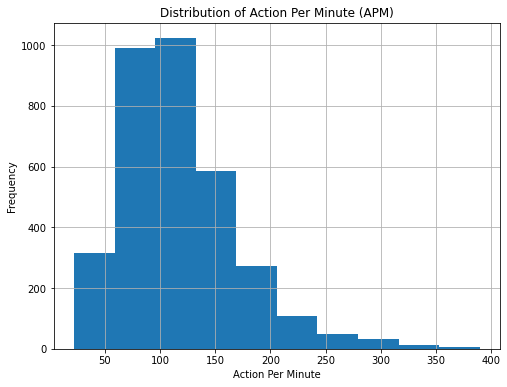

In [35]:
plt.figure(figsize=(8, 6))
df_player['APM'].hist()

plt.xlabel('Action Per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of Action Per Minute (APM)')

plt.show()

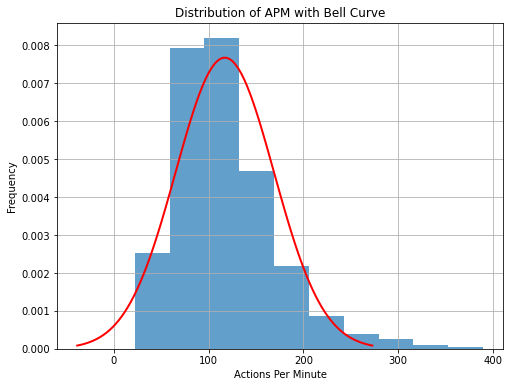

In [36]:
plt.figure(figsize=(8, 6))

# Plot the histogram
df_player['APM'].hist(density=True, alpha=0.7)

# Calculate mean and standard deviation
mu = df_player['APM'].mean()
sigma = df_player['APM'].std()

# Create a range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Plot the bell curve
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)

plt.xlabel('Actions Per Minute')
plt.ylabel('Frequency')
plt.title('Distribution of APM with Bell Curve')

plt.show()

### ActionLatency:

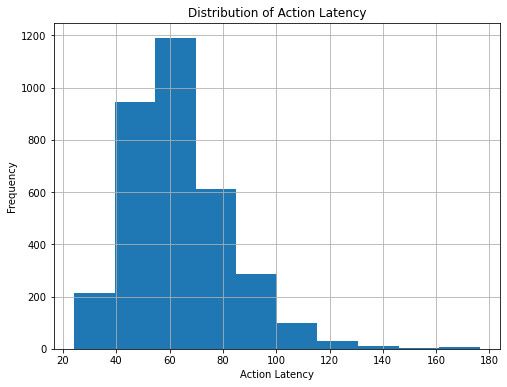

In [37]:
plt.figure(figsize=(8, 6))
df_player['ActionLatency'].hist()

plt.xlabel('Action Latency')
plt.ylabel('Frequency')
plt.title('Distribution of Action Latency')

plt.show()

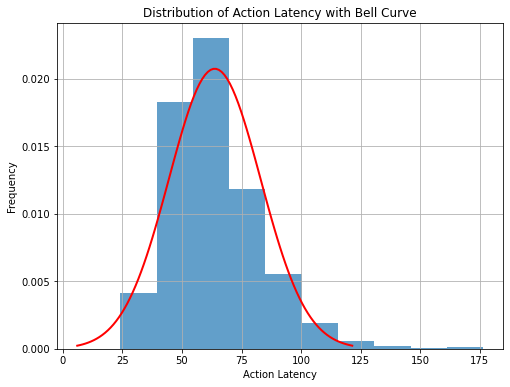

In [38]:
plt.figure(figsize=(8, 6))

# Plot the histogram
df_player['ActionLatency'].hist(density=True, alpha=0.7)

# Calculate mean and standard deviation
mu = df_player['ActionLatency'].mean()
sigma = df_player['ActionLatency'].std()

# Create a range of x values
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Plot the bell curve
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)

plt.xlabel('Action Latency')
plt.ylabel('Frequency')
plt.title('Distribution of Action Latency with Bell Curve')

plt.show()

In [87]:
df_player['LeagueIndex'].max()

8

In [88]:
df_player['LeagueIndex'].min()

1

In [39]:
df_player['HoursPerWeek'].max()

168.0

In [40]:
df_player['HoursPerWeek'].min()

0.0

In [41]:
df_player['TotalHours'].min()

3.0

In [42]:
df_player['TotalHours'].max()

1000000.0

In [43]:
df_player['ActionLatency'].max()

176.3721

In [44]:
df_player['ActionLatency'].min()

24.0936

In [45]:
df_player['ActionLatency'].min()

24.0936

In [46]:
df_player['ActionLatency'].max()

176.3721

### Normalizing the dataset as values are highly varying in columns like TotalHours, HoursPerWeek, ActionLatency, and APM:

In [47]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['HoursPerWeek', 'TotalHours', 'ActionLatency', 'APM']

# Apply the MinMaxScaler to the selected columns
df_player[columns_to_normalize] = scaler.fit_transform(df_player[columns_to_normalize])

In [48]:
df_player

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27.000000,0.059524,0.002997,0.330799,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,0.110151,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23.000000,0.059524,0.004997,0.291411,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,0.119858,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30.000000,0.059524,0.000197,0.130248,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,0.336628,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19.000000,0.119048,0.000397,0.232595,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,0.194654,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32.000000,0.059524,0.000497,0.274168,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,0.249462,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,21.647904,0.094707,0.000957,0.645971,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,0.123068,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,21.647904,0.094707,0.000957,0.795630,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,0.078947,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,21.647904,0.094707,0.000957,0.754187,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,0.101275,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,21.647904,0.094707,0.000957,0.962028,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,0.070667,7.9615,15,0.000613,6,0.000000,0.000631


### Implementing the ML Model using Random Forest Classifier: 

In [56]:
# Step 3: Preprocess the data
# features = df_player.drop(['GameID', 'LeagueIndex'], axis=1)
features = df_player[['HoursPerWeek', 'TotalHours', 'ActionLatency', 'APM']]
target = df_player['LeagueIndex']

In [57]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [58]:
# Define the parameter grid:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [59]:
# Create an instance of the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [60]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [61]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

### More things can be done to check True Positives and false positives and maybe do more hyperparameter tuning to bring the Accuracy up of the given model

In [65]:
### Sadly, the accuracy here only is close to 42%, Our Classification Model did not perform very well:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.41863828404289893


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 9: Calculate evaluation metrics
# More analysis on True positives and 
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.37260677466863035
Precision: 0.3956055797934353
Recall: 0.3858514577162151
F1 Score: 0.3874281050867806


### Now trying with Ensemble Learning to increase Accuracy:

In [68]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from catboost import CatBoostClassifier
# Creating an instance of the CatBoost classifier:
catboost_classifier = CatBoostClassifier(random_state=42)

# Define the parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [71]:
# Perform grid search with cross-validation for CatBoost
grid_search = GridSearchCV(catboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

0:	learn: 1.9800101	total: 1.91ms	remaining: 189ms
1:	learn: 1.9025925	total: 3.77ms	remaining: 185ms
2:	learn: 1.8347930	total: 5.51ms	remaining: 178ms
3:	learn: 1.7833852	total: 7.16ms	remaining: 172ms
4:	learn: 1.7353899	total: 8.8ms	remaining: 167ms
5:	learn: 1.6957463	total: 10.8ms	remaining: 169ms
6:	learn: 1.6659528	total: 12.6ms	remaining: 168ms
7:	learn: 1.6359432	total: 14.4ms	remaining: 165ms
8:	learn: 1.6091192	total: 15.9ms	remaining: 161ms
9:	learn: 1.5828588	total: 17.4ms	remaining: 157ms
10:	learn: 1.5615745	total: 18.9ms	remaining: 153ms
11:	learn: 1.5403616	total: 20.4ms	remaining: 150ms
12:	learn: 1.5230024	total: 21.9ms	remaining: 147ms
13:	learn: 1.5063399	total: 23.2ms	remaining: 143ms
14:	learn: 1.4901820	total: 24.6ms	remaining: 139ms
15:	learn: 1.4764192	total: 26ms	remaining: 136ms
16:	learn: 1.4656242	total: 27.4ms	remaining: 134ms
17:	learn: 1.4534331	total: 28.8ms	remaining: 131ms
18:	learn: 1.4417546	total: 30.3ms	remaining: 129ms
19:	learn: 1.4325341	tota

7:	learn: 1.6419774	total: 10.9ms	remaining: 125ms
8:	learn: 1.6153933	total: 12.2ms	remaining: 123ms
9:	learn: 1.5917009	total: 13.6ms	remaining: 123ms
10:	learn: 1.5724616	total: 15ms	remaining: 121ms
11:	learn: 1.5549038	total: 16.3ms	remaining: 120ms
12:	learn: 1.5367810	total: 17.6ms	remaining: 118ms
13:	learn: 1.5213554	total: 19.1ms	remaining: 117ms
14:	learn: 1.5075127	total: 20.4ms	remaining: 116ms
15:	learn: 1.4945588	total: 21.7ms	remaining: 114ms
16:	learn: 1.4834637	total: 23.1ms	remaining: 113ms
17:	learn: 1.4723941	total: 24.4ms	remaining: 111ms
18:	learn: 1.4611424	total: 25.8ms	remaining: 110ms
19:	learn: 1.4510467	total: 27.7ms	remaining: 111ms
20:	learn: 1.4427695	total: 29.2ms	remaining: 110ms
21:	learn: 1.4344246	total: 30.9ms	remaining: 110ms
22:	learn: 1.4293574	total: 32.4ms	remaining: 108ms
23:	learn: 1.4187990	total: 33.8ms	remaining: 107ms
24:	learn: 1.4126916	total: 35.2ms	remaining: 106ms
25:	learn: 1.4063012	total: 36.7ms	remaining: 105ms
26:	learn: 1.4009

19:	learn: 1.4436689	total: 25.9ms	remaining: 104ms
20:	learn: 1.4350157	total: 27.4ms	remaining: 103ms
21:	learn: 1.4248483	total: 28.7ms	remaining: 102ms
22:	learn: 1.4170218	total: 29.9ms	remaining: 100ms
23:	learn: 1.4089177	total: 31.2ms	remaining: 98.7ms
24:	learn: 1.4028831	total: 32.4ms	remaining: 97.3ms
25:	learn: 1.3971909	total: 33.7ms	remaining: 95.9ms
26:	learn: 1.3908002	total: 34.9ms	remaining: 94.3ms
27:	learn: 1.3863919	total: 36.3ms	remaining: 93.3ms
28:	learn: 1.3824996	total: 37.5ms	remaining: 91.8ms
29:	learn: 1.3770853	total: 38.8ms	remaining: 90.5ms
30:	learn: 1.3716389	total: 40.2ms	remaining: 89.4ms
31:	learn: 1.3683195	total: 41.5ms	remaining: 88.1ms
32:	learn: 1.3633892	total: 43ms	remaining: 87.4ms
33:	learn: 1.3590449	total: 44.5ms	remaining: 86.4ms
34:	learn: 1.3562312	total: 45.9ms	remaining: 85.2ms
35:	learn: 1.3535335	total: 47.2ms	remaining: 83.9ms
36:	learn: 1.3509635	total: 48.5ms	remaining: 82.6ms
37:	learn: 1.3476196	total: 49.8ms	remaining: 81.3ms

34:	learn: 1.8242145	total: 44.4ms	remaining: 82.4ms
35:	learn: 1.8190182	total: 45.8ms	remaining: 81.4ms
36:	learn: 1.8135519	total: 47.1ms	remaining: 80.2ms
37:	learn: 1.8083342	total: 48.5ms	remaining: 79.1ms
38:	learn: 1.8032914	total: 49.8ms	remaining: 77.9ms
39:	learn: 1.7985188	total: 51.1ms	remaining: 76.7ms
40:	learn: 1.7934310	total: 52.5ms	remaining: 75.5ms
41:	learn: 1.7883261	total: 53.9ms	remaining: 74.4ms
42:	learn: 1.7838321	total: 55.2ms	remaining: 73.2ms
43:	learn: 1.7787197	total: 56.6ms	remaining: 72ms
44:	learn: 1.7741195	total: 58ms	remaining: 70.9ms
45:	learn: 1.7697355	total: 59.4ms	remaining: 69.8ms
46:	learn: 1.7651098	total: 60.8ms	remaining: 68.6ms
47:	learn: 1.7607661	total: 62.5ms	remaining: 67.7ms
48:	learn: 1.7570213	total: 64.1ms	remaining: 66.8ms
49:	learn: 1.7528507	total: 65.5ms	remaining: 65.5ms
50:	learn: 1.7489051	total: 66.9ms	remaining: 64.3ms
51:	learn: 1.7451157	total: 68.2ms	remaining: 63ms
52:	learn: 1.7407383	total: 69.8ms	remaining: 61.9ms

39:	learn: 1.7935271	total: 52.6ms	remaining: 78.9ms
40:	learn: 1.7888099	total: 54.2ms	remaining: 77.9ms
41:	learn: 1.7836155	total: 55.5ms	remaining: 76.7ms
42:	learn: 1.7789193	total: 56.9ms	remaining: 75.4ms
43:	learn: 1.7736981	total: 58.2ms	remaining: 74.1ms
44:	learn: 1.7690505	total: 59.5ms	remaining: 72.7ms
45:	learn: 1.7642404	total: 60.8ms	remaining: 71.3ms
46:	learn: 1.7594239	total: 62ms	remaining: 69.9ms
47:	learn: 1.7549926	total: 63.2ms	remaining: 68.5ms
48:	learn: 1.7508635	total: 64.4ms	remaining: 67.1ms
49:	learn: 1.7465864	total: 65.8ms	remaining: 65.8ms
50:	learn: 1.7424958	total: 67.2ms	remaining: 64.5ms
51:	learn: 1.7383699	total: 68.7ms	remaining: 63.4ms
52:	learn: 1.7340475	total: 70.3ms	remaining: 62.3ms
53:	learn: 1.7297522	total: 71.8ms	remaining: 61.2ms
54:	learn: 1.7256162	total: 73.4ms	remaining: 60ms
55:	learn: 1.7221900	total: 74.9ms	remaining: 58.9ms
56:	learn: 1.7184443	total: 76.3ms	remaining: 57.6ms
57:	learn: 1.7145290	total: 77.7ms	remaining: 56.3

37:	learn: 2.0426452	total: 55.3ms	remaining: 90.2ms
38:	learn: 2.0417578	total: 56.9ms	remaining: 88.9ms
39:	learn: 2.0407830	total: 58.2ms	remaining: 87.3ms
40:	learn: 2.0398599	total: 59.6ms	remaining: 85.8ms
41:	learn: 2.0388593	total: 61.1ms	remaining: 84.4ms
42:	learn: 2.0379789	total: 62.4ms	remaining: 82.7ms
43:	learn: 2.0369705	total: 67.5ms	remaining: 85.9ms
44:	learn: 2.0360625	total: 69ms	remaining: 84.4ms
45:	learn: 2.0351427	total: 70.5ms	remaining: 82.7ms
46:	learn: 2.0341604	total: 71.8ms	remaining: 81ms
47:	learn: 2.0332536	total: 73.3ms	remaining: 79.4ms
48:	learn: 2.0323861	total: 74.7ms	remaining: 77.7ms
49:	learn: 2.0315283	total: 76.1ms	remaining: 76.1ms
50:	learn: 2.0306517	total: 77.5ms	remaining: 74.5ms
51:	learn: 2.0298678	total: 79ms	remaining: 72.9ms
52:	learn: 2.0289646	total: 80.6ms	remaining: 71.5ms
53:	learn: 2.0280271	total: 82.1ms	remaining: 70ms
54:	learn: 2.0270911	total: 83.7ms	remaining: 68.5ms
55:	learn: 2.0262223	total: 85.2ms	remaining: 67ms
56:

1:	learn: 2.0774473	total: 3.73ms	remaining: 183ms
2:	learn: 2.0764372	total: 5.15ms	remaining: 166ms
3:	learn: 2.0754668	total: 6.47ms	remaining: 155ms
4:	learn: 2.0744868	total: 7.69ms	remaining: 146ms
5:	learn: 2.0734878	total: 8.95ms	remaining: 140ms
6:	learn: 2.0725551	total: 10.1ms	remaining: 134ms
7:	learn: 2.0715757	total: 11.3ms	remaining: 130ms
8:	learn: 2.0706316	total: 12.6ms	remaining: 127ms
9:	learn: 2.0696195	total: 13.8ms	remaining: 124ms
10:	learn: 2.0686080	total: 15ms	remaining: 121ms
11:	learn: 2.0676459	total: 16.2ms	remaining: 119ms
12:	learn: 2.0666721	total: 17.5ms	remaining: 117ms
13:	learn: 2.0657187	total: 18.8ms	remaining: 116ms
14:	learn: 2.0647039	total: 20.1ms	remaining: 114ms
15:	learn: 2.0637278	total: 21.3ms	remaining: 112ms
16:	learn: 2.0628316	total: 22.6ms	remaining: 110ms
17:	learn: 2.0618910	total: 23.8ms	remaining: 108ms
18:	learn: 2.0609402	total: 25.3ms	remaining: 108ms
19:	learn: 2.0599451	total: 26.6ms	remaining: 107ms
20:	learn: 2.0589854	to

32:	learn: 2.0472426	total: 41.3ms	remaining: 83.9ms
33:	learn: 2.0462739	total: 42.6ms	remaining: 82.8ms
34:	learn: 2.0453488	total: 43.9ms	remaining: 81.5ms
35:	learn: 2.0444239	total: 45.1ms	remaining: 80.1ms
36:	learn: 2.0434919	total: 46.3ms	remaining: 78.8ms
37:	learn: 2.0425488	total: 47.5ms	remaining: 77.5ms
38:	learn: 2.0416213	total: 48.7ms	remaining: 76.1ms
39:	learn: 2.0406905	total: 49.9ms	remaining: 74.9ms
40:	learn: 2.0397585	total: 51.2ms	remaining: 73.6ms
41:	learn: 2.0387794	total: 52.4ms	remaining: 72.4ms
42:	learn: 2.0379062	total: 53.6ms	remaining: 71.1ms
43:	learn: 2.0369160	total: 54.8ms	remaining: 69.8ms
44:	learn: 2.0359988	total: 56ms	remaining: 68.5ms
45:	learn: 2.0350552	total: 57.3ms	remaining: 67.3ms
46:	learn: 2.0340948	total: 58.6ms	remaining: 66.1ms
47:	learn: 2.0331987	total: 59.9ms	remaining: 64.9ms
48:	learn: 2.0323350	total: 61.3ms	remaining: 63.8ms
49:	learn: 2.0313992	total: 62.6ms	remaining: 62.6ms
50:	learn: 2.0305010	total: 64ms	remaining: 61.5

199:	learn: 1.2169037	total: 248ms	remaining: 0us
0:	learn: 1.9865898	total: 1.53ms	remaining: 304ms
1:	learn: 1.9068054	total: 2.89ms	remaining: 286ms
2:	learn: 1.8397607	total: 4.13ms	remaining: 271ms
3:	learn: 1.7881874	total: 5.46ms	remaining: 268ms
4:	learn: 1.7410295	total: 6.86ms	remaining: 267ms
5:	learn: 1.7048509	total: 8.17ms	remaining: 264ms
6:	learn: 1.6723069	total: 9.5ms	remaining: 262ms
7:	learn: 1.6419971	total: 10.8ms	remaining: 260ms
8:	learn: 1.6149142	total: 12.1ms	remaining: 257ms
9:	learn: 1.5905444	total: 13.4ms	remaining: 255ms
10:	learn: 1.5713981	total: 14.7ms	remaining: 253ms
11:	learn: 1.5515663	total: 16ms	remaining: 250ms
12:	learn: 1.5353988	total: 17.3ms	remaining: 249ms
13:	learn: 1.5185980	total: 18.5ms	remaining: 246ms
14:	learn: 1.5044189	total: 19.7ms	remaining: 243ms
15:	learn: 1.4913792	total: 21ms	remaining: 241ms
16:	learn: 1.4796358	total: 22.3ms	remaining: 240ms
17:	learn: 1.4677691	total: 23.5ms	remaining: 238ms
18:	learn: 1.4585866	total: 2

19:	learn: 1.4510467	total: 24.9ms	remaining: 224ms
20:	learn: 1.4427695	total: 26.2ms	remaining: 223ms
21:	learn: 1.4344246	total: 27.6ms	remaining: 223ms
22:	learn: 1.4293574	total: 28.9ms	remaining: 222ms
23:	learn: 1.4187990	total: 30.2ms	remaining: 221ms
24:	learn: 1.4126916	total: 31.4ms	remaining: 220ms
25:	learn: 1.4063012	total: 32.7ms	remaining: 219ms
26:	learn: 1.4009258	total: 34.1ms	remaining: 218ms
27:	learn: 1.3964883	total: 35.4ms	remaining: 218ms
28:	learn: 1.3913588	total: 36.7ms	remaining: 217ms
29:	learn: 1.3873695	total: 38.1ms	remaining: 216ms
30:	learn: 1.3826463	total: 39.4ms	remaining: 215ms
31:	learn: 1.3793590	total: 40.8ms	remaining: 214ms
32:	learn: 1.3744889	total: 42.3ms	remaining: 214ms
33:	learn: 1.3703555	total: 43.6ms	remaining: 213ms
34:	learn: 1.3671080	total: 44.9ms	remaining: 212ms
35:	learn: 1.3639212	total: 46.2ms	remaining: 210ms
36:	learn: 1.3616399	total: 47.4ms	remaining: 209ms
37:	learn: 1.3584354	total: 48.8ms	remaining: 208ms
38:	learn: 1

64:	learn: 1.2947225	total: 79.7ms	remaining: 165ms
65:	learn: 1.2939730	total: 80.9ms	remaining: 164ms
66:	learn: 1.2933450	total: 82.3ms	remaining: 163ms
67:	learn: 1.2909104	total: 83.5ms	remaining: 162ms
68:	learn: 1.2885012	total: 84.8ms	remaining: 161ms
69:	learn: 1.2879838	total: 86ms	remaining: 160ms
70:	learn: 1.2871645	total: 87.2ms	remaining: 158ms
71:	learn: 1.2867227	total: 88.3ms	remaining: 157ms
72:	learn: 1.2860520	total: 89.5ms	remaining: 156ms
73:	learn: 1.2853511	total: 90.8ms	remaining: 155ms
74:	learn: 1.2842081	total: 92ms	remaining: 153ms
75:	learn: 1.2836623	total: 93.3ms	remaining: 152ms
76:	learn: 1.2816451	total: 94.6ms	remaining: 151ms
77:	learn: 1.2805465	total: 96.2ms	remaining: 151ms
78:	learn: 1.2799304	total: 97.8ms	remaining: 150ms
79:	learn: 1.2792128	total: 99.1ms	remaining: 149ms
80:	learn: 1.2786924	total: 100ms	remaining: 147ms
81:	learn: 1.2778583	total: 102ms	remaining: 146ms
82:	learn: 1.2774069	total: 103ms	remaining: 145ms
83:	learn: 1.276838

122:	learn: 1.2580056	total: 168ms	remaining: 105ms
123:	learn: 1.2572777	total: 170ms	remaining: 104ms
124:	learn: 1.2571027	total: 171ms	remaining: 102ms
125:	learn: 1.2564805	total: 172ms	remaining: 101ms
126:	learn: 1.2561348	total: 173ms	remaining: 99.5ms
127:	learn: 1.2559101	total: 175ms	remaining: 98.2ms
128:	learn: 1.2556412	total: 176ms	remaining: 96.7ms
129:	learn: 1.2553890	total: 177ms	remaining: 95.2ms
130:	learn: 1.2548779	total: 178ms	remaining: 93.9ms
131:	learn: 1.2547282	total: 180ms	remaining: 92.5ms
132:	learn: 1.2539453	total: 181ms	remaining: 91.2ms
133:	learn: 1.2533057	total: 183ms	remaining: 89.9ms
134:	learn: 1.2531191	total: 184ms	remaining: 88.5ms
135:	learn: 1.2526833	total: 185ms	remaining: 87.1ms
136:	learn: 1.2522843	total: 186ms	remaining: 85.7ms
137:	learn: 1.2518596	total: 188ms	remaining: 84.4ms
138:	learn: 1.2513715	total: 189ms	remaining: 83ms
139:	learn: 1.2508410	total: 190ms	remaining: 81.6ms
140:	learn: 1.2504079	total: 192ms	remaining: 80.4ms

152:	learn: 1.4914866	total: 214ms	remaining: 65.7ms
153:	learn: 1.4899032	total: 215ms	remaining: 64.3ms
154:	learn: 1.4885374	total: 217ms	remaining: 62.9ms
155:	learn: 1.4871783	total: 218ms	remaining: 61.5ms
156:	learn: 1.4858949	total: 220ms	remaining: 60.1ms
157:	learn: 1.4847245	total: 221ms	remaining: 58.7ms
158:	learn: 1.4831455	total: 222ms	remaining: 57.3ms
159:	learn: 1.4817104	total: 224ms	remaining: 55.9ms
160:	learn: 1.4806267	total: 225ms	remaining: 54.5ms
161:	learn: 1.4794685	total: 227ms	remaining: 53.1ms
162:	learn: 1.4781567	total: 228ms	remaining: 51.8ms
163:	learn: 1.4764830	total: 230ms	remaining: 50.5ms
164:	learn: 1.4753844	total: 232ms	remaining: 49.1ms
165:	learn: 1.4743133	total: 233ms	remaining: 47.7ms
166:	learn: 1.4732070	total: 235ms	remaining: 46.3ms
167:	learn: 1.4714700	total: 236ms	remaining: 44.9ms
168:	learn: 1.4702693	total: 237ms	remaining: 43.5ms
169:	learn: 1.4691125	total: 239ms	remaining: 42.1ms
170:	learn: 1.4679581	total: 240ms	remaining: 

179:	learn: 1.4689984	total: 248ms	remaining: 27.6ms
180:	learn: 1.4677335	total: 250ms	remaining: 26.2ms
181:	learn: 1.4667772	total: 251ms	remaining: 24.9ms
182:	learn: 1.4659408	total: 253ms	remaining: 23.5ms
183:	learn: 1.4650207	total: 254ms	remaining: 22.1ms
184:	learn: 1.4640135	total: 255ms	remaining: 20.7ms
185:	learn: 1.4632640	total: 257ms	remaining: 19.3ms
186:	learn: 1.4624226	total: 258ms	remaining: 17.9ms
187:	learn: 1.4608562	total: 260ms	remaining: 16.6ms
188:	learn: 1.4598173	total: 261ms	remaining: 15.2ms
189:	learn: 1.4588756	total: 262ms	remaining: 13.8ms
190:	learn: 1.4577345	total: 264ms	remaining: 12.4ms
191:	learn: 1.4563372	total: 266ms	remaining: 11.1ms
192:	learn: 1.4551822	total: 267ms	remaining: 9.68ms
193:	learn: 1.4542549	total: 268ms	remaining: 8.3ms
194:	learn: 1.4533538	total: 270ms	remaining: 6.92ms
195:	learn: 1.4524328	total: 271ms	remaining: 5.54ms
196:	learn: 1.4514649	total: 273ms	remaining: 4.15ms
197:	learn: 1.4504780	total: 274ms	remaining: 2

0:	learn: 2.0685946	total: 1.54ms	remaining: 307ms
1:	learn: 2.0590225	total: 3.11ms	remaining: 308ms
2:	learn: 2.0486670	total: 4.57ms	remaining: 300ms
3:	learn: 2.0396232	total: 5.92ms	remaining: 290ms
4:	learn: 2.0303588	total: 7.39ms	remaining: 288ms
5:	learn: 2.0219427	total: 8.72ms	remaining: 282ms
6:	learn: 2.0133020	total: 10.2ms	remaining: 280ms
7:	learn: 2.0040289	total: 11.5ms	remaining: 276ms
8:	learn: 1.9953156	total: 12.9ms	remaining: 273ms
9:	learn: 1.9866449	total: 14.4ms	remaining: 274ms
10:	learn: 1.9783124	total: 15.7ms	remaining: 271ms
11:	learn: 1.9695925	total: 17.4ms	remaining: 272ms
12:	learn: 1.9616337	total: 18.9ms	remaining: 272ms
13:	learn: 1.9536189	total: 20.4ms	remaining: 271ms
14:	learn: 1.9455395	total: 21.7ms	remaining: 268ms
15:	learn: 1.9382254	total: 23.2ms	remaining: 266ms
16:	learn: 1.9314194	total: 24.5ms	remaining: 264ms
17:	learn: 1.9243466	total: 26.1ms	remaining: 264ms
18:	learn: 1.9173145	total: 27.4ms	remaining: 261ms
19:	learn: 1.9099456	t

32:	learn: 1.8324141	total: 48.2ms	remaining: 244ms
33:	learn: 1.8268097	total: 49.9ms	remaining: 244ms
34:	learn: 1.8216518	total: 51.3ms	remaining: 242ms
35:	learn: 1.8163475	total: 52.6ms	remaining: 240ms
36:	learn: 1.8110006	total: 53.9ms	remaining: 238ms
37:	learn: 1.8058716	total: 55.4ms	remaining: 236ms
38:	learn: 1.8008109	total: 56.9ms	remaining: 235ms
39:	learn: 1.7959405	total: 58.4ms	remaining: 234ms
40:	learn: 1.7908691	total: 60.1ms	remaining: 233ms
41:	learn: 1.7857154	total: 61.5ms	remaining: 231ms
42:	learn: 1.7807097	total: 63ms	remaining: 230ms
43:	learn: 1.7755588	total: 64.3ms	remaining: 228ms
44:	learn: 1.7709783	total: 66.1ms	remaining: 228ms
45:	learn: 1.7664805	total: 67.5ms	remaining: 226ms
46:	learn: 1.7616574	total: 69.1ms	remaining: 225ms
47:	learn: 1.7571787	total: 71ms	remaining: 225ms
48:	learn: 1.7532141	total: 72.3ms	remaining: 223ms
49:	learn: 1.7491272	total: 73.7ms	remaining: 221ms
50:	learn: 1.7449757	total: 75.2ms	remaining: 220ms
51:	learn: 1.741

60:	learn: 2.0217147	total: 91ms	remaining: 207ms
61:	learn: 2.0208990	total: 92.4ms	remaining: 206ms
62:	learn: 2.0200114	total: 93.8ms	remaining: 204ms
63:	learn: 2.0190903	total: 95.1ms	remaining: 202ms
64:	learn: 2.0182621	total: 96.5ms	remaining: 200ms
65:	learn: 2.0173988	total: 97.8ms	remaining: 199ms
66:	learn: 2.0164992	total: 99.2ms	remaining: 197ms
67:	learn: 2.0155968	total: 101ms	remaining: 195ms
68:	learn: 2.0147182	total: 102ms	remaining: 193ms
69:	learn: 2.0139065	total: 103ms	remaining: 192ms
70:	learn: 2.0130461	total: 105ms	remaining: 190ms
71:	learn: 2.0121952	total: 106ms	remaining: 189ms
72:	learn: 2.0113892	total: 107ms	remaining: 187ms
73:	learn: 2.0104874	total: 109ms	remaining: 185ms
74:	learn: 2.0096251	total: 110ms	remaining: 184ms
75:	learn: 2.0087283	total: 112ms	remaining: 182ms
76:	learn: 2.0078657	total: 113ms	remaining: 181ms
77:	learn: 2.0070308	total: 114ms	remaining: 179ms
78:	learn: 2.0061731	total: 116ms	remaining: 177ms
79:	learn: 2.0053237	total

97:	learn: 1.9913751	total: 134ms	remaining: 139ms
98:	learn: 1.9905695	total: 135ms	remaining: 138ms
99:	learn: 1.9897139	total: 137ms	remaining: 137ms
100:	learn: 1.9889132	total: 138ms	remaining: 135ms
101:	learn: 1.9881233	total: 139ms	remaining: 134ms
102:	learn: 1.9873382	total: 141ms	remaining: 132ms
103:	learn: 1.9864883	total: 142ms	remaining: 131ms
104:	learn: 1.9856705	total: 143ms	remaining: 130ms
105:	learn: 1.9848406	total: 145ms	remaining: 128ms
106:	learn: 1.9839855	total: 146ms	remaining: 127ms
107:	learn: 1.9831382	total: 148ms	remaining: 126ms
108:	learn: 1.9823765	total: 149ms	remaining: 125ms
109:	learn: 1.9815464	total: 151ms	remaining: 123ms
110:	learn: 1.9807687	total: 152ms	remaining: 122ms
111:	learn: 1.9800259	total: 153ms	remaining: 120ms
112:	learn: 1.9792533	total: 154ms	remaining: 119ms
113:	learn: 1.9784423	total: 156ms	remaining: 118ms
114:	learn: 1.9776052	total: 157ms	remaining: 116ms
115:	learn: 1.9767848	total: 158ms	remaining: 115ms
116:	learn: 1.9

123:	learn: 1.9699611	total: 173ms	remaining: 106ms
124:	learn: 1.9691930	total: 174ms	remaining: 104ms
125:	learn: 1.9684211	total: 176ms	remaining: 103ms
126:	learn: 1.9677069	total: 177ms	remaining: 102ms
127:	learn: 1.9669263	total: 179ms	remaining: 101ms
128:	learn: 1.9661007	total: 180ms	remaining: 99.1ms
129:	learn: 1.9653501	total: 182ms	remaining: 97.8ms
130:	learn: 1.9645910	total: 183ms	remaining: 96.3ms
131:	learn: 1.9638620	total: 184ms	remaining: 94.9ms
132:	learn: 1.9630746	total: 186ms	remaining: 93.5ms
133:	learn: 1.9622557	total: 187ms	remaining: 92ms
134:	learn: 1.9615229	total: 188ms	remaining: 90.6ms
135:	learn: 1.9607855	total: 190ms	remaining: 89.2ms
136:	learn: 1.9599628	total: 191ms	remaining: 87.7ms
137:	learn: 1.9591774	total: 192ms	remaining: 86.4ms
138:	learn: 1.9584637	total: 194ms	remaining: 85.1ms
139:	learn: 1.9576875	total: 195ms	remaining: 83.6ms
140:	learn: 1.9570122	total: 197ms	remaining: 82.3ms
141:	learn: 1.9562516	total: 198ms	remaining: 80.9ms


163:	learn: 1.9376730	total: 225ms	remaining: 49.4ms
164:	learn: 1.9369281	total: 227ms	remaining: 48.1ms
165:	learn: 1.9362287	total: 228ms	remaining: 46.7ms
166:	learn: 1.9354342	total: 229ms	remaining: 45.3ms
167:	learn: 1.9346500	total: 230ms	remaining: 43.9ms
168:	learn: 1.9339140	total: 232ms	remaining: 42.5ms
169:	learn: 1.9331614	total: 233ms	remaining: 41.1ms
170:	learn: 1.9324100	total: 234ms	remaining: 39.7ms
171:	learn: 1.9317151	total: 235ms	remaining: 38.3ms
172:	learn: 1.9310498	total: 237ms	remaining: 36.9ms
173:	learn: 1.9302992	total: 238ms	remaining: 35.6ms
174:	learn: 1.9295771	total: 239ms	remaining: 34.2ms
175:	learn: 1.9288484	total: 241ms	remaining: 32.8ms
176:	learn: 1.9282057	total: 242ms	remaining: 31.4ms
177:	learn: 1.9275070	total: 243ms	remaining: 30.1ms
178:	learn: 1.9268068	total: 245ms	remaining: 28.7ms
179:	learn: 1.9261144	total: 246ms	remaining: 27.3ms
180:	learn: 1.9253996	total: 247ms	remaining: 25.9ms
181:	learn: 1.9247325	total: 248ms	remaining: 

198:	learn: 1.9147962	total: 269ms	remaining: 1.35ms
199:	learn: 1.9140646	total: 270ms	remaining: 0us
0:	learn: 1.9800101	total: 1.71ms	remaining: 510ms
1:	learn: 1.9025925	total: 3.06ms	remaining: 456ms
2:	learn: 1.8347930	total: 4.51ms	remaining: 447ms
3:	learn: 1.7833852	total: 5.81ms	remaining: 430ms
4:	learn: 1.7353899	total: 7.02ms	remaining: 414ms
5:	learn: 1.6957463	total: 8.37ms	remaining: 410ms
6:	learn: 1.6659528	total: 9.66ms	remaining: 404ms
7:	learn: 1.6359432	total: 11.1ms	remaining: 406ms
8:	learn: 1.6091192	total: 12.5ms	remaining: 404ms
9:	learn: 1.5828588	total: 14.1ms	remaining: 408ms
10:	learn: 1.5615745	total: 15.6ms	remaining: 409ms
11:	learn: 1.5403616	total: 17ms	remaining: 409ms
12:	learn: 1.5230024	total: 18.3ms	remaining: 403ms
13:	learn: 1.5063399	total: 19.6ms	remaining: 399ms
14:	learn: 1.4901820	total: 20.9ms	remaining: 396ms
15:	learn: 1.4764192	total: 22.1ms	remaining: 393ms
16:	learn: 1.4656242	total: 23.4ms	remaining: 390ms
17:	learn: 1.4534331	tota

245:	learn: 1.1971310	total: 313ms	remaining: 68.7ms
246:	learn: 1.1970318	total: 314ms	remaining: 67.4ms
247:	learn: 1.1965113	total: 315ms	remaining: 66.1ms
248:	learn: 1.1963005	total: 317ms	remaining: 64.8ms
249:	learn: 1.1956318	total: 318ms	remaining: 63.6ms
250:	learn: 1.1951619	total: 319ms	remaining: 62.3ms
251:	learn: 1.1948923	total: 320ms	remaining: 61ms
252:	learn: 1.1946090	total: 321ms	remaining: 59.7ms
253:	learn: 1.1941231	total: 323ms	remaining: 58.4ms
254:	learn: 1.1938950	total: 324ms	remaining: 57.1ms
255:	learn: 1.1934890	total: 325ms	remaining: 55.9ms
256:	learn: 1.1931389	total: 326ms	remaining: 54.6ms
257:	learn: 1.1929148	total: 328ms	remaining: 53.4ms
258:	learn: 1.1925867	total: 329ms	remaining: 52.1ms
259:	learn: 1.1920947	total: 331ms	remaining: 50.9ms
260:	learn: 1.1912602	total: 332ms	remaining: 49.6ms
261:	learn: 1.1911097	total: 333ms	remaining: 48.3ms
262:	learn: 1.1906662	total: 334ms	remaining: 47ms
263:	learn: 1.1899036	total: 336ms	remaining: 45.8

173:	learn: 1.2363436	total: 237ms	remaining: 171ms
174:	learn: 1.2360561	total: 238ms	remaining: 170ms
175:	learn: 1.2355636	total: 240ms	remaining: 169ms
176:	learn: 1.2351449	total: 241ms	remaining: 168ms
177:	learn: 1.2346545	total: 243ms	remaining: 167ms
178:	learn: 1.2344954	total: 244ms	remaining: 165ms
179:	learn: 1.2335887	total: 246ms	remaining: 164ms
180:	learn: 1.2332791	total: 247ms	remaining: 162ms
181:	learn: 1.2330132	total: 248ms	remaining: 161ms
182:	learn: 1.2327677	total: 249ms	remaining: 159ms
183:	learn: 1.2325214	total: 250ms	remaining: 158ms
184:	learn: 1.2318448	total: 251ms	remaining: 156ms
185:	learn: 1.2310787	total: 253ms	remaining: 155ms
186:	learn: 1.2305404	total: 254ms	remaining: 154ms
187:	learn: 1.2301446	total: 255ms	remaining: 152ms
188:	learn: 1.2292912	total: 257ms	remaining: 151ms
189:	learn: 1.2290837	total: 258ms	remaining: 150ms
190:	learn: 1.2283421	total: 260ms	remaining: 148ms
191:	learn: 1.2282701	total: 261ms	remaining: 147ms
192:	learn: 

137:	learn: 1.2543746	total: 177ms	remaining: 208ms
138:	learn: 1.2541359	total: 178ms	remaining: 207ms
139:	learn: 1.2538398	total: 179ms	remaining: 205ms
140:	learn: 1.2533832	total: 181ms	remaining: 204ms
141:	learn: 1.2526801	total: 182ms	remaining: 202ms
142:	learn: 1.2523384	total: 183ms	remaining: 201ms
143:	learn: 1.2519176	total: 184ms	remaining: 200ms
144:	learn: 1.2514323	total: 185ms	remaining: 198ms
145:	learn: 1.2511257	total: 187ms	remaining: 197ms
146:	learn: 1.2505701	total: 188ms	remaining: 195ms
147:	learn: 1.2501669	total: 189ms	remaining: 194ms
148:	learn: 1.2497857	total: 190ms	remaining: 193ms
149:	learn: 1.2495480	total: 191ms	remaining: 191ms
150:	learn: 1.2493657	total: 193ms	remaining: 190ms
151:	learn: 1.2488530	total: 194ms	remaining: 189ms
152:	learn: 1.2485760	total: 195ms	remaining: 187ms
153:	learn: 1.2483083	total: 196ms	remaining: 186ms
154:	learn: 1.2479176	total: 198ms	remaining: 185ms
155:	learn: 1.2472321	total: 199ms	remaining: 184ms
156:	learn: 

96:	learn: 1.2689223	total: 124ms	remaining: 260ms
97:	learn: 1.2677115	total: 126ms	remaining: 259ms
98:	learn: 1.2671875	total: 127ms	remaining: 257ms
99:	learn: 1.2666769	total: 128ms	remaining: 256ms
100:	learn: 1.2661710	total: 129ms	remaining: 255ms
101:	learn: 1.2654441	total: 130ms	remaining: 253ms
102:	learn: 1.2644105	total: 132ms	remaining: 252ms
103:	learn: 1.2631349	total: 133ms	remaining: 250ms
104:	learn: 1.2615673	total: 134ms	remaining: 249ms
105:	learn: 1.2611951	total: 135ms	remaining: 247ms
106:	learn: 1.2608588	total: 136ms	remaining: 246ms
107:	learn: 1.2600570	total: 138ms	remaining: 244ms
108:	learn: 1.2596156	total: 139ms	remaining: 243ms
109:	learn: 1.2589773	total: 140ms	remaining: 242ms
110:	learn: 1.2585505	total: 141ms	remaining: 241ms
111:	learn: 1.2579127	total: 143ms	remaining: 239ms
112:	learn: 1.2574394	total: 144ms	remaining: 238ms
113:	learn: 1.2563574	total: 145ms	remaining: 237ms
114:	learn: 1.2557076	total: 147ms	remaining: 236ms
115:	learn: 1.25

54:	learn: 1.3154258	total: 74.1ms	remaining: 330ms
55:	learn: 1.3143222	total: 76ms	remaining: 331ms
56:	learn: 1.3127942	total: 77.3ms	remaining: 330ms
57:	learn: 1.3116957	total: 78.8ms	remaining: 329ms
58:	learn: 1.3102519	total: 80.1ms	remaining: 327ms
59:	learn: 1.3093342	total: 81.3ms	remaining: 325ms
60:	learn: 1.3078266	total: 82.6ms	remaining: 324ms
61:	learn: 1.3057069	total: 83.9ms	remaining: 322ms
62:	learn: 1.3042849	total: 85.2ms	remaining: 321ms
63:	learn: 1.3027487	total: 86.5ms	remaining: 319ms
64:	learn: 1.3015631	total: 87.8ms	remaining: 318ms
65:	learn: 1.3006390	total: 89.1ms	remaining: 316ms
66:	learn: 1.2997079	total: 90.3ms	remaining: 314ms
67:	learn: 1.2970498	total: 91.6ms	remaining: 313ms
68:	learn: 1.2947367	total: 92.9ms	remaining: 311ms
69:	learn: 1.2941893	total: 94.1ms	remaining: 309ms
70:	learn: 1.2934818	total: 95.5ms	remaining: 308ms
71:	learn: 1.2928991	total: 96.8ms	remaining: 306ms
72:	learn: 1.2922517	total: 98.1ms	remaining: 305ms
73:	learn: 1.2

1:	learn: 2.0590722	total: 3.23ms	remaining: 481ms
2:	learn: 2.0487213	total: 4.62ms	remaining: 458ms
3:	learn: 2.0396298	total: 5.92ms	remaining: 438ms
4:	learn: 2.0304666	total: 7.23ms	remaining: 427ms
5:	learn: 2.0213468	total: 8.5ms	remaining: 417ms
6:	learn: 2.0132866	total: 9.89ms	remaining: 414ms
7:	learn: 2.0047175	total: 11.3ms	remaining: 413ms
8:	learn: 1.9960595	total: 12.8ms	remaining: 415ms
9:	learn: 1.9876835	total: 14.4ms	remaining: 418ms
10:	learn: 1.9791787	total: 15.9ms	remaining: 418ms
11:	learn: 1.9712137	total: 17.5ms	remaining: 420ms
12:	learn: 1.9633970	total: 18.9ms	remaining: 417ms
13:	learn: 1.9554206	total: 20.5ms	remaining: 419ms
14:	learn: 1.9478584	total: 21.9ms	remaining: 416ms
15:	learn: 1.9407687	total: 23.2ms	remaining: 411ms
16:	learn: 1.9334880	total: 24.6ms	remaining: 410ms
17:	learn: 1.9263201	total: 26.1ms	remaining: 409ms
18:	learn: 1.9191108	total: 27.9ms	remaining: 412ms
19:	learn: 1.9118380	total: 29.3ms	remaining: 410ms
20:	learn: 1.9050946	t

265:	learn: 1.3870303	total: 358ms	remaining: 45.8ms
266:	learn: 1.3862615	total: 359ms	remaining: 44.4ms
267:	learn: 1.3856252	total: 361ms	remaining: 43.1ms
268:	learn: 1.3851515	total: 362ms	remaining: 41.7ms
269:	learn: 1.3846350	total: 363ms	remaining: 40.3ms
270:	learn: 1.3840321	total: 364ms	remaining: 39ms
271:	learn: 1.3834980	total: 365ms	remaining: 37.6ms
272:	learn: 1.3829597	total: 367ms	remaining: 36.3ms
273:	learn: 1.3824460	total: 368ms	remaining: 34.9ms
274:	learn: 1.3818670	total: 369ms	remaining: 33.5ms
275:	learn: 1.3811800	total: 370ms	remaining: 32.2ms
276:	learn: 1.3806541	total: 372ms	remaining: 30.9ms
277:	learn: 1.3802330	total: 373ms	remaining: 29.5ms
278:	learn: 1.3796929	total: 375ms	remaining: 28.2ms
279:	learn: 1.3792911	total: 376ms	remaining: 26.8ms
280:	learn: 1.3785887	total: 377ms	remaining: 25.5ms
281:	learn: 1.3780781	total: 378ms	remaining: 24.1ms
282:	learn: 1.3774670	total: 380ms	remaining: 22.8ms
283:	learn: 1.3768620	total: 381ms	remaining: 21

229:	learn: 1.4231547	total: 287ms	remaining: 87.2ms
230:	learn: 1.4224929	total: 288ms	remaining: 86ms
231:	learn: 1.4214132	total: 289ms	remaining: 84.7ms
232:	learn: 1.4209138	total: 290ms	remaining: 83.5ms
233:	learn: 1.4200507	total: 292ms	remaining: 82.3ms
234:	learn: 1.4195087	total: 293ms	remaining: 81.1ms
235:	learn: 1.4187980	total: 295ms	remaining: 79.9ms
236:	learn: 1.4181831	total: 296ms	remaining: 78.7ms
237:	learn: 1.4173914	total: 297ms	remaining: 77.4ms
238:	learn: 1.4166547	total: 298ms	remaining: 76.2ms
239:	learn: 1.4158965	total: 300ms	remaining: 74.9ms
240:	learn: 1.4150936	total: 301ms	remaining: 73.7ms
241:	learn: 1.4145511	total: 302ms	remaining: 72.4ms
242:	learn: 1.4140293	total: 304ms	remaining: 71.3ms
243:	learn: 1.4133538	total: 305ms	remaining: 70ms
244:	learn: 1.4130003	total: 307ms	remaining: 68.8ms
245:	learn: 1.4124582	total: 308ms	remaining: 67.6ms
246:	learn: 1.4118728	total: 310ms	remaining: 66.4ms
247:	learn: 1.4112036	total: 311ms	remaining: 65.2

150:	learn: 1.5032665	total: 216ms	remaining: 213ms
151:	learn: 1.5019066	total: 217ms	remaining: 212ms
152:	learn: 1.5003585	total: 219ms	remaining: 210ms
153:	learn: 1.4989493	total: 221ms	remaining: 209ms
154:	learn: 1.4975014	total: 222ms	remaining: 208ms
155:	learn: 1.4961599	total: 223ms	remaining: 206ms
156:	learn: 1.4948194	total: 224ms	remaining: 204ms
157:	learn: 1.4936093	total: 226ms	remaining: 203ms
158:	learn: 1.4918719	total: 227ms	remaining: 201ms
159:	learn: 1.4904932	total: 228ms	remaining: 200ms
160:	learn: 1.4892747	total: 230ms	remaining: 198ms
161:	learn: 1.4879037	total: 231ms	remaining: 197ms
162:	learn: 1.4867577	total: 233ms	remaining: 196ms
163:	learn: 1.4849716	total: 234ms	remaining: 194ms
164:	learn: 1.4837108	total: 236ms	remaining: 193ms
165:	learn: 1.4826220	total: 237ms	remaining: 191ms
166:	learn: 1.4813537	total: 238ms	remaining: 190ms
167:	learn: 1.4801389	total: 240ms	remaining: 188ms
168:	learn: 1.4790355	total: 241ms	remaining: 187ms
169:	learn: 

86:	learn: 1.6203198	total: 120ms	remaining: 294ms
87:	learn: 1.6175932	total: 121ms	remaining: 292ms
88:	learn: 1.6153611	total: 123ms	remaining: 291ms
89:	learn: 1.6126497	total: 124ms	remaining: 289ms
90:	learn: 1.6099143	total: 125ms	remaining: 288ms
91:	learn: 1.6072476	total: 127ms	remaining: 287ms
92:	learn: 1.6047586	total: 128ms	remaining: 285ms
93:	learn: 1.6022855	total: 129ms	remaining: 284ms
94:	learn: 1.5998308	total: 131ms	remaining: 282ms
95:	learn: 1.5974625	total: 132ms	remaining: 281ms
96:	learn: 1.5950691	total: 133ms	remaining: 279ms
97:	learn: 1.5925468	total: 135ms	remaining: 278ms
98:	learn: 1.5901099	total: 136ms	remaining: 277ms
99:	learn: 1.5876397	total: 138ms	remaining: 275ms
100:	learn: 1.5854428	total: 140ms	remaining: 275ms
101:	learn: 1.5830832	total: 141ms	remaining: 274ms
102:	learn: 1.5807516	total: 143ms	remaining: 273ms
103:	learn: 1.5785178	total: 144ms	remaining: 272ms
104:	learn: 1.5762535	total: 146ms	remaining: 271ms
105:	learn: 1.5738928	tota

22:	learn: 1.8925994	total: 31.4ms	remaining: 378ms
23:	learn: 1.8859285	total: 32.9ms	remaining: 379ms
24:	learn: 1.8795342	total: 34.2ms	remaining: 376ms
25:	learn: 1.8735791	total: 35.6ms	remaining: 375ms
26:	learn: 1.8677086	total: 36.8ms	remaining: 372ms
27:	learn: 1.8620120	total: 38.2ms	remaining: 371ms
28:	learn: 1.8557801	total: 39.6ms	remaining: 370ms
29:	learn: 1.8496583	total: 40.9ms	remaining: 368ms
30:	learn: 1.8433871	total: 42.2ms	remaining: 366ms
31:	learn: 1.8380094	total: 43.4ms	remaining: 364ms
32:	learn: 1.8324141	total: 44.8ms	remaining: 362ms
33:	learn: 1.8268097	total: 46.1ms	remaining: 361ms
34:	learn: 1.8216518	total: 47.4ms	remaining: 359ms
35:	learn: 1.8163475	total: 48.7ms	remaining: 357ms
36:	learn: 1.8110006	total: 50.1ms	remaining: 356ms
37:	learn: 1.8058716	total: 51.4ms	remaining: 355ms
38:	learn: 1.8008109	total: 52.9ms	remaining: 354ms
39:	learn: 1.7959405	total: 54.2ms	remaining: 353ms
40:	learn: 1.7908691	total: 55.6ms	remaining: 351ms
41:	learn: 1

1:	learn: 2.0773751	total: 3.06ms	remaining: 455ms
2:	learn: 2.0762932	total: 4.58ms	remaining: 453ms
3:	learn: 2.0753260	total: 6.22ms	remaining: 461ms
4:	learn: 2.0743329	total: 7.66ms	remaining: 452ms
5:	learn: 2.0733700	total: 9.14ms	remaining: 448ms
6:	learn: 2.0724597	total: 10.4ms	remaining: 436ms
7:	learn: 2.0714818	total: 11.7ms	remaining: 427ms
8:	learn: 2.0704746	total: 13.1ms	remaining: 425ms
9:	learn: 2.0694777	total: 14.5ms	remaining: 420ms
10:	learn: 2.0684476	total: 15.8ms	remaining: 416ms
11:	learn: 2.0674713	total: 17.2ms	remaining: 412ms
12:	learn: 2.0664888	total: 18.4ms	remaining: 407ms
13:	learn: 2.0654796	total: 19.7ms	remaining: 402ms
14:	learn: 2.0645012	total: 21.3ms	remaining: 405ms
15:	learn: 2.0635568	total: 22.7ms	remaining: 404ms
16:	learn: 2.0626145	total: 24.2ms	remaining: 402ms
17:	learn: 2.0616728	total: 25.6ms	remaining: 401ms
18:	learn: 2.0606979	total: 27ms	remaining: 399ms
19:	learn: 2.0597005	total: 28.4ms	remaining: 397ms
20:	learn: 2.0587455	to

249:	learn: 1.8799202	total: 352ms	remaining: 70.4ms
250:	learn: 1.8793359	total: 353ms	remaining: 69ms
251:	learn: 1.8787337	total: 355ms	remaining: 67.6ms
252:	learn: 1.8780783	total: 356ms	remaining: 66.2ms
253:	learn: 1.8774736	total: 358ms	remaining: 64.8ms
254:	learn: 1.8768435	total: 359ms	remaining: 63.3ms
255:	learn: 1.8761935	total: 360ms	remaining: 61.9ms
256:	learn: 1.8755937	total: 361ms	remaining: 60.5ms
257:	learn: 1.8749464	total: 363ms	remaining: 59ms
258:	learn: 1.8742978	total: 364ms	remaining: 57.6ms
259:	learn: 1.8736432	total: 365ms	remaining: 56.2ms
260:	learn: 1.8729724	total: 367ms	remaining: 54.8ms
261:	learn: 1.8724727	total: 368ms	remaining: 53.4ms
262:	learn: 1.8718675	total: 370ms	remaining: 52ms
263:	learn: 1.8712349	total: 371ms	remaining: 50.6ms
264:	learn: 1.8705778	total: 372ms	remaining: 49.2ms
265:	learn: 1.8699825	total: 374ms	remaining: 47.8ms
266:	learn: 1.8693542	total: 375ms	remaining: 46.4ms
267:	learn: 1.8687511	total: 376ms	remaining: 44.9ms

191:	learn: 1.9210933	total: 258ms	remaining: 145ms
192:	learn: 1.9203633	total: 259ms	remaining: 144ms
193:	learn: 1.9196997	total: 261ms	remaining: 142ms
194:	learn: 1.9190768	total: 262ms	remaining: 141ms
195:	learn: 1.9183891	total: 263ms	remaining: 140ms
196:	learn: 1.9176648	total: 264ms	remaining: 138ms
197:	learn: 1.9169837	total: 265ms	remaining: 137ms
198:	learn: 1.9162749	total: 267ms	remaining: 135ms
199:	learn: 1.9155827	total: 268ms	remaining: 134ms
200:	learn: 1.9149566	total: 269ms	remaining: 133ms
201:	learn: 1.9142779	total: 271ms	remaining: 131ms
202:	learn: 1.9135370	total: 272ms	remaining: 130ms
203:	learn: 1.9128454	total: 273ms	remaining: 129ms
204:	learn: 1.9121606	total: 274ms	remaining: 127ms
205:	learn: 1.9115177	total: 276ms	remaining: 126ms
206:	learn: 1.9108478	total: 277ms	remaining: 124ms
207:	learn: 1.9101872	total: 278ms	remaining: 123ms
208:	learn: 1.9095712	total: 280ms	remaining: 122ms
209:	learn: 1.9088934	total: 281ms	remaining: 121ms
210:	learn: 

127:	learn: 1.9669263	total: 179ms	remaining: 241ms
128:	learn: 1.9661007	total: 181ms	remaining: 240ms
129:	learn: 1.9653501	total: 182ms	remaining: 239ms
130:	learn: 1.9645910	total: 184ms	remaining: 237ms
131:	learn: 1.9638620	total: 185ms	remaining: 235ms
132:	learn: 1.9630746	total: 186ms	remaining: 234ms
133:	learn: 1.9622557	total: 188ms	remaining: 233ms
134:	learn: 1.9615229	total: 189ms	remaining: 231ms
135:	learn: 1.9607855	total: 191ms	remaining: 230ms
136:	learn: 1.9599628	total: 192ms	remaining: 229ms
137:	learn: 1.9591774	total: 194ms	remaining: 227ms
138:	learn: 1.9584637	total: 195ms	remaining: 226ms
139:	learn: 1.9576875	total: 196ms	remaining: 225ms
140:	learn: 1.9570122	total: 198ms	remaining: 223ms
141:	learn: 1.9562516	total: 200ms	remaining: 222ms
142:	learn: 1.9554654	total: 201ms	remaining: 221ms
143:	learn: 1.9547233	total: 203ms	remaining: 220ms
144:	learn: 1.9539744	total: 204ms	remaining: 218ms
145:	learn: 1.9531750	total: 205ms	remaining: 217ms
146:	learn: 

53:	learn: 2.0276013	total: 75.1ms	remaining: 342ms
54:	learn: 2.0266621	total: 77.1ms	remaining: 344ms
55:	learn: 2.0257103	total: 78.6ms	remaining: 342ms
56:	learn: 2.0248187	total: 80ms	remaining: 341ms
57:	learn: 2.0239717	total: 81.3ms	remaining: 339ms
58:	learn: 2.0230801	total: 82.6ms	remaining: 337ms
59:	learn: 2.0221785	total: 84ms	remaining: 336ms
60:	learn: 2.0212172	total: 85.5ms	remaining: 335ms
61:	learn: 2.0203864	total: 87ms	remaining: 334ms
62:	learn: 2.0194182	total: 88.5ms	remaining: 333ms
63:	learn: 2.0185065	total: 90ms	remaining: 332ms
64:	learn: 2.0176721	total: 91.5ms	remaining: 331ms
65:	learn: 2.0168242	total: 92.9ms	remaining: 329ms
66:	learn: 2.0159607	total: 94.2ms	remaining: 328ms
67:	learn: 2.0150426	total: 95.6ms	remaining: 326ms
68:	learn: 2.0141487	total: 97ms	remaining: 325ms
69:	learn: 2.0133605	total: 98.4ms	remaining: 323ms
70:	learn: 2.0124974	total: 100ms	remaining: 323ms
71:	learn: 2.0116361	total: 102ms	remaining: 322ms
72:	learn: 2.0107974	tot

0:	learn: 2.0783978	total: 1.65ms	remaining: 492ms
1:	learn: 2.0774405	total: 3.41ms	remaining: 508ms
2:	learn: 2.0763733	total: 4.94ms	remaining: 489ms
3:	learn: 2.0754208	total: 6.42ms	remaining: 475ms
4:	learn: 2.0744671	total: 7.87ms	remaining: 464ms
5:	learn: 2.0734322	total: 9.28ms	remaining: 455ms
6:	learn: 2.0724868	total: 10.6ms	remaining: 444ms
7:	learn: 2.0714643	total: 11.9ms	remaining: 434ms
8:	learn: 2.0704588	total: 13.2ms	remaining: 426ms
9:	learn: 2.0694162	total: 14.5ms	remaining: 421ms
10:	learn: 2.0683970	total: 15.8ms	remaining: 415ms
11:	learn: 2.0674450	total: 17ms	remaining: 409ms
12:	learn: 2.0664488	total: 18.4ms	remaining: 407ms
13:	learn: 2.0654513	total: 19.7ms	remaining: 403ms
14:	learn: 2.0644620	total: 21.1ms	remaining: 400ms
15:	learn: 2.0634926	total: 22.6ms	remaining: 401ms
16:	learn: 2.0625361	total: 24.1ms	remaining: 401ms
17:	learn: 2.0615453	total: 25.4ms	remaining: 397ms
18:	learn: 2.0605884	total: 26.6ms	remaining: 393ms
19:	learn: 2.0595818	tot

270:	learn: 1.8683523	total: 357ms	remaining: 38.2ms
271:	learn: 1.8677446	total: 359ms	remaining: 36.9ms
272:	learn: 1.8671587	total: 360ms	remaining: 35.6ms
273:	learn: 1.8665714	total: 361ms	remaining: 34.3ms
274:	learn: 1.8659680	total: 363ms	remaining: 33ms
275:	learn: 1.8654039	total: 364ms	remaining: 31.6ms
276:	learn: 1.8647594	total: 365ms	remaining: 30.3ms
277:	learn: 1.8641151	total: 366ms	remaining: 29ms
278:	learn: 1.8635252	total: 368ms	remaining: 27.7ms
279:	learn: 1.8629579	total: 369ms	remaining: 26.4ms
280:	learn: 1.8623418	total: 370ms	remaining: 25.1ms
281:	learn: 1.8617775	total: 372ms	remaining: 23.7ms
282:	learn: 1.8611889	total: 373ms	remaining: 22.4ms
283:	learn: 1.8605964	total: 375ms	remaining: 21.1ms
284:	learn: 1.8600602	total: 376ms	remaining: 19.8ms
285:	learn: 1.8594696	total: 377ms	remaining: 18.5ms
286:	learn: 1.8588746	total: 379ms	remaining: 17.2ms
287:	learn: 1.8582549	total: 384ms	remaining: 16ms
288:	learn: 1.8576968	total: 386ms	remaining: 14.7ms

49:	learn: 1.2728108	total: 140ms	remaining: 140ms
50:	learn: 1.2702260	total: 143ms	remaining: 137ms
51:	learn: 1.2687216	total: 145ms	remaining: 134ms
52:	learn: 1.2676415	total: 148ms	remaining: 131ms
53:	learn: 1.2654818	total: 151ms	remaining: 128ms
54:	learn: 1.2634096	total: 153ms	remaining: 125ms
55:	learn: 1.2620322	total: 156ms	remaining: 122ms
56:	learn: 1.2601285	total: 159ms	remaining: 120ms
57:	learn: 1.2583653	total: 161ms	remaining: 117ms
58:	learn: 1.2570074	total: 164ms	remaining: 114ms
59:	learn: 1.2554768	total: 167ms	remaining: 111ms
60:	learn: 1.2542637	total: 170ms	remaining: 109ms
61:	learn: 1.2525905	total: 173ms	remaining: 106ms
62:	learn: 1.2510482	total: 177ms	remaining: 104ms
63:	learn: 1.2504492	total: 179ms	remaining: 101ms
64:	learn: 1.2492858	total: 183ms	remaining: 98.3ms
65:	learn: 1.2480067	total: 185ms	remaining: 95.5ms
66:	learn: 1.2464397	total: 189ms	remaining: 92.9ms
67:	learn: 1.2445985	total: 192ms	remaining: 90.2ms
68:	learn: 1.2431652	total:

24:	learn: 1.3477085	total: 62.6ms	remaining: 188ms
25:	learn: 1.3416359	total: 65.2ms	remaining: 185ms
26:	learn: 1.3361719	total: 67.9ms	remaining: 183ms
27:	learn: 1.3307043	total: 70.4ms	remaining: 181ms
28:	learn: 1.3238237	total: 73ms	remaining: 179ms
29:	learn: 1.3187990	total: 75.7ms	remaining: 177ms
30:	learn: 1.3140850	total: 79ms	remaining: 176ms
31:	learn: 1.3109096	total: 82ms	remaining: 174ms
32:	learn: 1.3063128	total: 84.8ms	remaining: 172ms
33:	learn: 1.3024051	total: 87.4ms	remaining: 170ms
34:	learn: 1.2989336	total: 89.9ms	remaining: 167ms
35:	learn: 1.2955082	total: 92.3ms	remaining: 164ms
36:	learn: 1.2923909	total: 94.6ms	remaining: 161ms
37:	learn: 1.2885640	total: 97ms	remaining: 158ms
38:	learn: 1.2853847	total: 99.4ms	remaining: 156ms
39:	learn: 1.2829071	total: 102ms	remaining: 154ms
40:	learn: 1.2802005	total: 106ms	remaining: 153ms
41:	learn: 1.2767402	total: 110ms	remaining: 152ms
42:	learn: 1.2741975	total: 114ms	remaining: 151ms
43:	learn: 1.2712592	tot

10:	learn: 1.9724435	total: 28.6ms	remaining: 232ms
11:	learn: 1.9638248	total: 31.3ms	remaining: 229ms
12:	learn: 1.9550915	total: 33.8ms	remaining: 226ms
13:	learn: 1.9469182	total: 36.3ms	remaining: 223ms
14:	learn: 1.9389804	total: 38.8ms	remaining: 220ms
15:	learn: 1.9307137	total: 41.4ms	remaining: 217ms
16:	learn: 1.9223370	total: 44ms	remaining: 215ms
17:	learn: 1.9148749	total: 46.6ms	remaining: 212ms
18:	learn: 1.9072376	total: 49.2ms	remaining: 210ms
19:	learn: 1.8995233	total: 51.8ms	remaining: 207ms
20:	learn: 1.8923047	total: 54.5ms	remaining: 205ms
21:	learn: 1.8852046	total: 57.1ms	remaining: 203ms
22:	learn: 1.8780497	total: 59.6ms	remaining: 200ms
23:	learn: 1.8711117	total: 62.1ms	remaining: 197ms
24:	learn: 1.8639772	total: 64.7ms	remaining: 194ms
25:	learn: 1.8572709	total: 67.4ms	remaining: 192ms
26:	learn: 1.8506469	total: 70ms	remaining: 189ms
27:	learn: 1.8441987	total: 73ms	remaining: 188ms
28:	learn: 1.8382236	total: 75.7ms	remaining: 185ms
29:	learn: 1.83189

1:	learn: 2.0576922	total: 5.59ms	remaining: 274ms
2:	learn: 2.0471772	total: 8.08ms	remaining: 261ms
3:	learn: 2.0371219	total: 10.8ms	remaining: 259ms
4:	learn: 2.0272170	total: 13.6ms	remaining: 258ms
5:	learn: 2.0172335	total: 16.2ms	remaining: 254ms
6:	learn: 2.0078200	total: 19.5ms	remaining: 259ms
7:	learn: 1.9982980	total: 22.5ms	remaining: 259ms
8:	learn: 1.9895481	total: 25.1ms	remaining: 254ms
9:	learn: 1.9808740	total: 28ms	remaining: 252ms
10:	learn: 1.9719857	total: 30.7ms	remaining: 248ms
11:	learn: 1.9636194	total: 33.1ms	remaining: 243ms
12:	learn: 1.9556415	total: 35.8ms	remaining: 239ms
13:	learn: 1.9475603	total: 38.3ms	remaining: 235ms
14:	learn: 1.9395634	total: 40.8ms	remaining: 231ms
15:	learn: 1.9314522	total: 43.3ms	remaining: 227ms
16:	learn: 1.9239249	total: 46ms	remaining: 224ms
17:	learn: 1.9168861	total: 48.5ms	remaining: 221ms
18:	learn: 1.9094239	total: 51ms	remaining: 218ms
19:	learn: 1.9019047	total: 53.4ms	remaining: 213ms
20:	learn: 1.8949558	total:

87:	learn: 1.5899771	total: 244ms	remaining: 33.3ms
88:	learn: 1.5869154	total: 247ms	remaining: 30.5ms
89:	learn: 1.5839377	total: 250ms	remaining: 27.8ms
90:	learn: 1.5812709	total: 252ms	remaining: 25ms
91:	learn: 1.5782358	total: 255ms	remaining: 22.2ms
92:	learn: 1.5755694	total: 258ms	remaining: 19.4ms
93:	learn: 1.5726750	total: 260ms	remaining: 16.6ms
94:	learn: 1.5697607	total: 263ms	remaining: 13.9ms
95:	learn: 1.5671217	total: 266ms	remaining: 11.1ms
96:	learn: 1.5645785	total: 269ms	remaining: 8.31ms
97:	learn: 1.5621989	total: 272ms	remaining: 5.54ms
98:	learn: 1.5596433	total: 274ms	remaining: 2.77ms
99:	learn: 1.5569311	total: 277ms	remaining: 0us
0:	learn: 2.0689986	total: 3.02ms	remaining: 299ms
1:	learn: 2.0582848	total: 5.66ms	remaining: 277ms
2:	learn: 2.0481218	total: 8.39ms	remaining: 271ms
3:	learn: 2.0381106	total: 14.1ms	remaining: 337ms
4:	learn: 2.0281661	total: 16.6ms	remaining: 315ms
5:	learn: 2.0187022	total: 19.1ms	remaining: 300ms
6:	learn: 2.0091317	tot

67:	learn: 2.0114231	total: 179ms	remaining: 84.4ms
68:	learn: 2.0104989	total: 182ms	remaining: 81.7ms
69:	learn: 2.0095850	total: 185ms	remaining: 79.3ms
70:	learn: 2.0086373	total: 188ms	remaining: 76.6ms
71:	learn: 2.0077414	total: 190ms	remaining: 74ms
72:	learn: 2.0068138	total: 193ms	remaining: 71.3ms
73:	learn: 2.0059111	total: 196ms	remaining: 68.7ms
74:	learn: 2.0049775	total: 200ms	remaining: 66.6ms
75:	learn: 2.0040813	total: 203ms	remaining: 64ms
76:	learn: 2.0031303	total: 205ms	remaining: 61.3ms
77:	learn: 2.0022866	total: 208ms	remaining: 58.7ms
78:	learn: 2.0013805	total: 211ms	remaining: 56ms
79:	learn: 2.0004096	total: 213ms	remaining: 53.3ms
80:	learn: 1.9995306	total: 216ms	remaining: 50.6ms
81:	learn: 1.9985683	total: 219ms	remaining: 48ms
82:	learn: 1.9976639	total: 222ms	remaining: 45.4ms
83:	learn: 1.9967168	total: 224ms	remaining: 42.7ms
84:	learn: 1.9957788	total: 227ms	remaining: 40.1ms
85:	learn: 1.9948478	total: 230ms	remaining: 37.4ms
86:	learn: 1.9939362

46:	learn: 2.0320158	total: 116ms	remaining: 131ms
47:	learn: 2.0310079	total: 119ms	remaining: 129ms
48:	learn: 2.0300676	total: 122ms	remaining: 127ms
49:	learn: 2.0291084	total: 124ms	remaining: 124ms
50:	learn: 2.0281481	total: 127ms	remaining: 122ms
51:	learn: 2.0271990	total: 130ms	remaining: 120ms
52:	learn: 2.0262280	total: 132ms	remaining: 117ms
53:	learn: 2.0252950	total: 135ms	remaining: 115ms
54:	learn: 2.0243486	total: 137ms	remaining: 112ms
55:	learn: 2.0233960	total: 140ms	remaining: 110ms
56:	learn: 2.0224935	total: 142ms	remaining: 107ms
57:	learn: 2.0216046	total: 145ms	remaining: 105ms
58:	learn: 2.0206259	total: 147ms	remaining: 102ms
59:	learn: 2.0197134	total: 150ms	remaining: 100ms
60:	learn: 2.0188226	total: 153ms	remaining: 97.7ms
61:	learn: 2.0178820	total: 155ms	remaining: 95.2ms
62:	learn: 2.0169501	total: 158ms	remaining: 92.7ms
63:	learn: 2.0160554	total: 160ms	remaining: 90.2ms
64:	learn: 2.0151093	total: 163ms	remaining: 87.6ms
65:	learn: 2.0141981	total

42:	learn: 2.0360384	total: 110ms	remaining: 146ms
43:	learn: 2.0350563	total: 113ms	remaining: 144ms
44:	learn: 2.0341425	total: 115ms	remaining: 141ms
45:	learn: 2.0331858	total: 118ms	remaining: 139ms
46:	learn: 2.0321872	total: 121ms	remaining: 136ms
47:	learn: 2.0312129	total: 124ms	remaining: 134ms
48:	learn: 2.0303129	total: 127ms	remaining: 132ms
49:	learn: 2.0293524	total: 129ms	remaining: 129ms
50:	learn: 2.0283969	total: 132ms	remaining: 127ms
51:	learn: 2.0274253	total: 134ms	remaining: 124ms
52:	learn: 2.0264733	total: 137ms	remaining: 121ms
53:	learn: 2.0255252	total: 139ms	remaining: 119ms
54:	learn: 2.0245782	total: 142ms	remaining: 116ms
55:	learn: 2.0236372	total: 145ms	remaining: 114ms
56:	learn: 2.0227450	total: 147ms	remaining: 111ms
57:	learn: 2.0218439	total: 150ms	remaining: 108ms
58:	learn: 2.0208649	total: 152ms	remaining: 106ms
59:	learn: 2.0199120	total: 155ms	remaining: 103ms
60:	learn: 2.0189774	total: 157ms	remaining: 101ms
61:	learn: 2.0180407	total: 160

147:	learn: 1.1542825	total: 367ms	remaining: 129ms
148:	learn: 1.1531235	total: 369ms	remaining: 126ms
149:	learn: 1.1524847	total: 372ms	remaining: 124ms
150:	learn: 1.1511464	total: 374ms	remaining: 121ms
151:	learn: 1.1499052	total: 377ms	remaining: 119ms
152:	learn: 1.1487170	total: 379ms	remaining: 117ms
153:	learn: 1.1479178	total: 382ms	remaining: 114ms
154:	learn: 1.1465563	total: 384ms	remaining: 112ms
155:	learn: 1.1449861	total: 387ms	remaining: 109ms
156:	learn: 1.1442754	total: 390ms	remaining: 107ms
157:	learn: 1.1435025	total: 392ms	remaining: 104ms
158:	learn: 1.1427459	total: 395ms	remaining: 102ms
159:	learn: 1.1418822	total: 397ms	remaining: 99.3ms
160:	learn: 1.1408712	total: 400ms	remaining: 96.8ms
161:	learn: 1.1401979	total: 402ms	remaining: 94.3ms
162:	learn: 1.1397985	total: 405ms	remaining: 91.8ms
163:	learn: 1.1392424	total: 407ms	remaining: 89.4ms
164:	learn: 1.1374571	total: 410ms	remaining: 86.9ms
165:	learn: 1.1362853	total: 412ms	remaining: 84.4ms
166:	

148:	learn: 1.1566987	total: 372ms	remaining: 127ms
149:	learn: 1.1557641	total: 375ms	remaining: 125ms
150:	learn: 1.1548957	total: 377ms	remaining: 122ms
151:	learn: 1.1535530	total: 380ms	remaining: 120ms
152:	learn: 1.1526560	total: 383ms	remaining: 118ms
153:	learn: 1.1508770	total: 385ms	remaining: 115ms
154:	learn: 1.1501095	total: 388ms	remaining: 113ms
155:	learn: 1.1491707	total: 391ms	remaining: 110ms
156:	learn: 1.1482882	total: 394ms	remaining: 108ms
157:	learn: 1.1470463	total: 396ms	remaining: 105ms
158:	learn: 1.1456922	total: 399ms	remaining: 103ms
159:	learn: 1.1441328	total: 402ms	remaining: 100ms
160:	learn: 1.1431236	total: 404ms	remaining: 98ms
161:	learn: 1.1420393	total: 407ms	remaining: 95.4ms
162:	learn: 1.1416612	total: 410ms	remaining: 93ms
163:	learn: 1.1412133	total: 412ms	remaining: 90.5ms
164:	learn: 1.1401963	total: 415ms	remaining: 88ms
165:	learn: 1.1389697	total: 418ms	remaining: 85.6ms
166:	learn: 1.1379666	total: 420ms	remaining: 83.1ms
167:	learn:

132:	learn: 1.1668462	total: 366ms	remaining: 184ms
133:	learn: 1.1662088	total: 368ms	remaining: 181ms
134:	learn: 1.1653195	total: 371ms	remaining: 179ms
135:	learn: 1.1643940	total: 374ms	remaining: 176ms
136:	learn: 1.1639289	total: 377ms	remaining: 173ms
137:	learn: 1.1623994	total: 381ms	remaining: 171ms
138:	learn: 1.1614224	total: 383ms	remaining: 168ms
139:	learn: 1.1609222	total: 386ms	remaining: 166ms
140:	learn: 1.1599855	total: 389ms	remaining: 163ms
141:	learn: 1.1595427	total: 393ms	remaining: 160ms
142:	learn: 1.1589369	total: 395ms	remaining: 158ms
143:	learn: 1.1582082	total: 398ms	remaining: 155ms
144:	learn: 1.1571240	total: 401ms	remaining: 152ms
145:	learn: 1.1555566	total: 403ms	remaining: 149ms
146:	learn: 1.1544569	total: 406ms	remaining: 146ms
147:	learn: 1.1526050	total: 409ms	remaining: 144ms
148:	learn: 1.1516156	total: 412ms	remaining: 141ms
149:	learn: 1.1504803	total: 415ms	remaining: 138ms
150:	learn: 1.1495966	total: 417ms	remaining: 135ms
151:	learn: 

129:	learn: 1.1623361	total: 327ms	remaining: 176ms
130:	learn: 1.1613746	total: 329ms	remaining: 173ms
131:	learn: 1.1599274	total: 332ms	remaining: 171ms
132:	learn: 1.1583531	total: 334ms	remaining: 168ms
133:	learn: 1.1578801	total: 337ms	remaining: 166ms
134:	learn: 1.1569094	total: 340ms	remaining: 164ms
135:	learn: 1.1562208	total: 342ms	remaining: 161ms
136:	learn: 1.1556781	total: 345ms	remaining: 159ms
137:	learn: 1.1547156	total: 348ms	remaining: 156ms
138:	learn: 1.1536315	total: 350ms	remaining: 154ms
139:	learn: 1.1525744	total: 352ms	remaining: 151ms
140:	learn: 1.1520792	total: 355ms	remaining: 148ms
141:	learn: 1.1512261	total: 357ms	remaining: 146ms
142:	learn: 1.1507069	total: 360ms	remaining: 143ms
143:	learn: 1.1495908	total: 362ms	remaining: 141ms
144:	learn: 1.1488382	total: 365ms	remaining: 138ms
145:	learn: 1.1471590	total: 367ms	remaining: 136ms
146:	learn: 1.1462962	total: 369ms	remaining: 133ms
147:	learn: 1.1451689	total: 372ms	remaining: 131ms
148:	learn: 

146:	learn: 1.1518454	total: 367ms	remaining: 132ms
147:	learn: 1.1514503	total: 369ms	remaining: 130ms
148:	learn: 1.1501314	total: 372ms	remaining: 127ms
149:	learn: 1.1490057	total: 375ms	remaining: 125ms
150:	learn: 1.1477363	total: 377ms	remaining: 122ms
151:	learn: 1.1465800	total: 380ms	remaining: 120ms
152:	learn: 1.1460674	total: 383ms	remaining: 118ms
153:	learn: 1.1445192	total: 385ms	remaining: 115ms
154:	learn: 1.1436031	total: 388ms	remaining: 113ms
155:	learn: 1.1428626	total: 391ms	remaining: 110ms
156:	learn: 1.1424477	total: 393ms	remaining: 108ms
157:	learn: 1.1417189	total: 395ms	remaining: 105ms
158:	learn: 1.1411763	total: 398ms	remaining: 103ms
159:	learn: 1.1395955	total: 400ms	remaining: 100ms
160:	learn: 1.1390720	total: 403ms	remaining: 97.5ms
161:	learn: 1.1384261	total: 405ms	remaining: 95ms
162:	learn: 1.1377795	total: 407ms	remaining: 92.5ms
163:	learn: 1.1369723	total: 410ms	remaining: 89.9ms
164:	learn: 1.1364619	total: 412ms	remaining: 87.4ms
165:	lear

144:	learn: 1.4647355	total: 372ms	remaining: 141ms
145:	learn: 1.4632404	total: 375ms	remaining: 139ms
146:	learn: 1.4616873	total: 378ms	remaining: 136ms
147:	learn: 1.4601554	total: 380ms	remaining: 134ms
148:	learn: 1.4587564	total: 383ms	remaining: 131ms
149:	learn: 1.4573492	total: 386ms	remaining: 129ms
150:	learn: 1.4557551	total: 389ms	remaining: 126ms
151:	learn: 1.4542974	total: 391ms	remaining: 124ms
152:	learn: 1.4528936	total: 394ms	remaining: 121ms
153:	learn: 1.4511257	total: 397ms	remaining: 119ms
154:	learn: 1.4498004	total: 400ms	remaining: 116ms
155:	learn: 1.4484236	total: 403ms	remaining: 114ms
156:	learn: 1.4470527	total: 405ms	remaining: 111ms
157:	learn: 1.4457113	total: 408ms	remaining: 108ms
158:	learn: 1.4444011	total: 410ms	remaining: 106ms
159:	learn: 1.4430796	total: 413ms	remaining: 103ms
160:	learn: 1.4416617	total: 416ms	remaining: 101ms
161:	learn: 1.4403829	total: 419ms	remaining: 98.2ms
162:	learn: 1.4390471	total: 421ms	remaining: 95.6ms
163:	learn

137:	learn: 1.4876799	total: 371ms	remaining: 167ms
138:	learn: 1.4859964	total: 374ms	remaining: 164ms
139:	learn: 1.4838817	total: 376ms	remaining: 161ms
140:	learn: 1.4821117	total: 379ms	remaining: 158ms
141:	learn: 1.4806314	total: 381ms	remaining: 156ms
142:	learn: 1.4789751	total: 384ms	remaining: 153ms
143:	learn: 1.4774923	total: 387ms	remaining: 150ms
144:	learn: 1.4757970	total: 389ms	remaining: 148ms
145:	learn: 1.4741571	total: 392ms	remaining: 145ms
146:	learn: 1.4725701	total: 394ms	remaining: 142ms
147:	learn: 1.4707830	total: 397ms	remaining: 139ms
148:	learn: 1.4694163	total: 399ms	remaining: 137ms
149:	learn: 1.4680801	total: 402ms	remaining: 134ms
150:	learn: 1.4665055	total: 404ms	remaining: 131ms
151:	learn: 1.4650534	total: 406ms	remaining: 128ms
152:	learn: 1.4635795	total: 409ms	remaining: 126ms
153:	learn: 1.4619159	total: 411ms	remaining: 123ms
154:	learn: 1.4604342	total: 414ms	remaining: 120ms
155:	learn: 1.4587417	total: 416ms	remaining: 117ms
156:	learn: 

133:	learn: 1.4919907	total: 357ms	remaining: 176ms
134:	learn: 1.4903618	total: 360ms	remaining: 173ms
135:	learn: 1.4887374	total: 362ms	remaining: 170ms
136:	learn: 1.4871668	total: 365ms	remaining: 168ms
137:	learn: 1.4854471	total: 371ms	remaining: 167ms
138:	learn: 1.4836761	total: 374ms	remaining: 164ms
139:	learn: 1.4814537	total: 377ms	remaining: 161ms
140:	learn: 1.4798723	total: 379ms	remaining: 159ms
141:	learn: 1.4784288	total: 382ms	remaining: 156ms
142:	learn: 1.4765897	total: 384ms	remaining: 153ms
143:	learn: 1.4751534	total: 387ms	remaining: 150ms
144:	learn: 1.4734170	total: 389ms	remaining: 148ms
145:	learn: 1.4717566	total: 391ms	remaining: 145ms
146:	learn: 1.4702396	total: 394ms	remaining: 142ms
147:	learn: 1.4687622	total: 396ms	remaining: 139ms
148:	learn: 1.4673369	total: 398ms	remaining: 136ms
149:	learn: 1.4656851	total: 401ms	remaining: 134ms
150:	learn: 1.4641397	total: 403ms	remaining: 131ms
151:	learn: 1.4624818	total: 406ms	remaining: 128ms
152:	learn: 

145:	learn: 1.4641899	total: 368ms	remaining: 136ms
146:	learn: 1.4627373	total: 371ms	remaining: 134ms
147:	learn: 1.4612188	total: 373ms	remaining: 131ms
148:	learn: 1.4596569	total: 376ms	remaining: 129ms
149:	learn: 1.4580886	total: 378ms	remaining: 126ms
150:	learn: 1.4566545	total: 381ms	remaining: 124ms
151:	learn: 1.4551724	total: 384ms	remaining: 121ms
152:	learn: 1.4538647	total: 386ms	remaining: 119ms
153:	learn: 1.4523925	total: 389ms	remaining: 116ms
154:	learn: 1.4509425	total: 391ms	remaining: 114ms
155:	learn: 1.4494376	total: 394ms	remaining: 111ms
156:	learn: 1.4478940	total: 396ms	remaining: 109ms
157:	learn: 1.4464483	total: 399ms	remaining: 106ms
158:	learn: 1.4450491	total: 401ms	remaining: 103ms
159:	learn: 1.4437133	total: 403ms	remaining: 101ms
160:	learn: 1.4422283	total: 406ms	remaining: 98.3ms
161:	learn: 1.4409637	total: 408ms	remaining: 95.8ms
162:	learn: 1.4395200	total: 411ms	remaining: 93.3ms
163:	learn: 1.4381497	total: 413ms	remaining: 90.7ms
164:	lea

139:	learn: 1.4787760	total: 371ms	remaining: 159ms
140:	learn: 1.4770182	total: 374ms	remaining: 156ms
141:	learn: 1.4755974	total: 376ms	remaining: 154ms
142:	learn: 1.4736199	total: 379ms	remaining: 151ms
143:	learn: 1.4720095	total: 382ms	remaining: 149ms
144:	learn: 1.4703682	total: 385ms	remaining: 146ms
145:	learn: 1.4687305	total: 387ms	remaining: 143ms
146:	learn: 1.4672129	total: 390ms	remaining: 141ms
147:	learn: 1.4657397	total: 393ms	remaining: 138ms
148:	learn: 1.4642996	total: 396ms	remaining: 136ms
149:	learn: 1.4627699	total: 399ms	remaining: 133ms
150:	learn: 1.4611447	total: 402ms	remaining: 130ms
151:	learn: 1.4596406	total: 404ms	remaining: 128ms
152:	learn: 1.4583517	total: 407ms	remaining: 125ms
153:	learn: 1.4569383	total: 410ms	remaining: 122ms
154:	learn: 1.4556318	total: 413ms	remaining: 120ms
155:	learn: 1.4541576	total: 415ms	remaining: 117ms
156:	learn: 1.4526523	total: 418ms	remaining: 114ms
157:	learn: 1.4512619	total: 421ms	remaining: 112ms
158:	learn: 

142:	learn: 1.9465983	total: 362ms	remaining: 144ms
143:	learn: 1.9457858	total: 364ms	remaining: 142ms
144:	learn: 1.9450010	total: 367ms	remaining: 139ms
145:	learn: 1.9442042	total: 370ms	remaining: 137ms
146:	learn: 1.9434009	total: 372ms	remaining: 134ms
147:	learn: 1.9426018	total: 375ms	remaining: 132ms
148:	learn: 1.9417846	total: 378ms	remaining: 129ms
149:	learn: 1.9409872	total: 381ms	remaining: 127ms
150:	learn: 1.9401428	total: 383ms	remaining: 124ms
151:	learn: 1.9393441	total: 385ms	remaining: 122ms
152:	learn: 1.9385801	total: 388ms	remaining: 119ms
153:	learn: 1.9377546	total: 390ms	remaining: 117ms
154:	learn: 1.9369945	total: 393ms	remaining: 114ms
155:	learn: 1.9361781	total: 395ms	remaining: 111ms
156:	learn: 1.9353886	total: 398ms	remaining: 109ms
157:	learn: 1.9346254	total: 400ms	remaining: 106ms
158:	learn: 1.9338453	total: 402ms	remaining: 104ms
159:	learn: 1.9330510	total: 405ms	remaining: 101ms
160:	learn: 1.9322645	total: 407ms	remaining: 98.6ms
161:	learn:

139:	learn: 1.9518514	total: 366ms	remaining: 157ms
140:	learn: 1.9510560	total: 369ms	remaining: 154ms
141:	learn: 1.9503354	total: 371ms	remaining: 152ms
142:	learn: 1.9495694	total: 374ms	remaining: 149ms
143:	learn: 1.9487896	total: 377ms	remaining: 146ms
144:	learn: 1.9479403	total: 379ms	remaining: 144ms
145:	learn: 1.9471433	total: 382ms	remaining: 141ms
146:	learn: 1.9463383	total: 384ms	remaining: 139ms
147:	learn: 1.9455471	total: 387ms	remaining: 136ms
148:	learn: 1.9447496	total: 390ms	remaining: 133ms
149:	learn: 1.9439578	total: 392ms	remaining: 131ms
150:	learn: 1.9432089	total: 395ms	remaining: 128ms
151:	learn: 1.9424537	total: 398ms	remaining: 126ms
152:	learn: 1.9416731	total: 400ms	remaining: 123ms
153:	learn: 1.9409073	total: 403ms	remaining: 120ms
154:	learn: 1.9401147	total: 406ms	remaining: 118ms
155:	learn: 1.9393246	total: 408ms	remaining: 115ms
156:	learn: 1.9385436	total: 411ms	remaining: 113ms
157:	learn: 1.9377674	total: 413ms	remaining: 110ms
158:	learn: 

140:	learn: 1.9497949	total: 366ms	remaining: 153ms
141:	learn: 1.9490204	total: 369ms	remaining: 151ms
142:	learn: 1.9482906	total: 372ms	remaining: 148ms
143:	learn: 1.9475017	total: 374ms	remaining: 146ms
144:	learn: 1.9466648	total: 377ms	remaining: 143ms
145:	learn: 1.9458900	total: 379ms	remaining: 140ms
146:	learn: 1.9450985	total: 382ms	remaining: 138ms
147:	learn: 1.9442853	total: 385ms	remaining: 135ms
148:	learn: 1.9434721	total: 388ms	remaining: 133ms
149:	learn: 1.9427044	total: 390ms	remaining: 130ms
150:	learn: 1.9419463	total: 393ms	remaining: 128ms
151:	learn: 1.9411711	total: 396ms	remaining: 125ms
152:	learn: 1.9403721	total: 399ms	remaining: 122ms
153:	learn: 1.9395638	total: 401ms	remaining: 120ms
154:	learn: 1.9387556	total: 404ms	remaining: 117ms
155:	learn: 1.9379420	total: 406ms	remaining: 115ms
156:	learn: 1.9371409	total: 409ms	remaining: 112ms
157:	learn: 1.9363842	total: 412ms	remaining: 110ms
158:	learn: 1.9355718	total: 414ms	remaining: 107ms
159:	learn: 

132:	learn: 1.9552332	total: 359ms	remaining: 181ms
133:	learn: 1.9543768	total: 361ms	remaining: 178ms
134:	learn: 1.9535471	total: 364ms	remaining: 175ms
135:	learn: 1.9527619	total: 366ms	remaining: 172ms
136:	learn: 1.9519177	total: 369ms	remaining: 170ms
137:	learn: 1.9511058	total: 372ms	remaining: 167ms
138:	learn: 1.9502712	total: 375ms	remaining: 164ms
139:	learn: 1.9494661	total: 377ms	remaining: 162ms
140:	learn: 1.9486607	total: 380ms	remaining: 159ms
141:	learn: 1.9479373	total: 382ms	remaining: 156ms
142:	learn: 1.9471720	total: 384ms	remaining: 153ms
143:	learn: 1.9464016	total: 387ms	remaining: 150ms
144:	learn: 1.9455858	total: 389ms	remaining: 148ms
145:	learn: 1.9447824	total: 392ms	remaining: 145ms
146:	learn: 1.9440146	total: 394ms	remaining: 142ms
147:	learn: 1.9431888	total: 396ms	remaining: 139ms
148:	learn: 1.9423810	total: 399ms	remaining: 136ms
149:	learn: 1.9415833	total: 401ms	remaining: 134ms
150:	learn: 1.9408101	total: 404ms	remaining: 131ms
151:	learn: 

145:	learn: 1.9457296	total: 368ms	remaining: 136ms
146:	learn: 1.9449161	total: 370ms	remaining: 134ms
147:	learn: 1.9441117	total: 373ms	remaining: 131ms
148:	learn: 1.9433046	total: 376ms	remaining: 129ms
149:	learn: 1.9425429	total: 378ms	remaining: 126ms
150:	learn: 1.9417665	total: 381ms	remaining: 124ms
151:	learn: 1.9409998	total: 383ms	remaining: 121ms
152:	learn: 1.9402580	total: 386ms	remaining: 119ms
153:	learn: 1.9394504	total: 388ms	remaining: 116ms
154:	learn: 1.9386571	total: 391ms	remaining: 114ms
155:	learn: 1.9378241	total: 394ms	remaining: 111ms
156:	learn: 1.9370219	total: 396ms	remaining: 109ms
157:	learn: 1.9362673	total: 399ms	remaining: 106ms
158:	learn: 1.9354842	total: 402ms	remaining: 104ms
159:	learn: 1.9346953	total: 404ms	remaining: 101ms
160:	learn: 1.9339462	total: 407ms	remaining: 98.6ms
161:	learn: 1.9331869	total: 409ms	remaining: 96ms
162:	learn: 1.9324111	total: 412ms	remaining: 93.5ms
163:	learn: 1.9316267	total: 414ms	remaining: 90.9ms
164:	learn

137:	learn: 1.1635572	total: 368ms	remaining: 432ms
138:	learn: 1.1622588	total: 371ms	remaining: 429ms
139:	learn: 1.1617873	total: 373ms	remaining: 427ms
140:	learn: 1.1599690	total: 376ms	remaining: 424ms
141:	learn: 1.1593906	total: 379ms	remaining: 422ms
142:	learn: 1.1582928	total: 382ms	remaining: 419ms
143:	learn: 1.1575767	total: 384ms	remaining: 416ms
144:	learn: 1.1570481	total: 387ms	remaining: 414ms
145:	learn: 1.1562541	total: 390ms	remaining: 411ms
146:	learn: 1.1547069	total: 393ms	remaining: 409ms
147:	learn: 1.1542825	total: 396ms	remaining: 407ms
148:	learn: 1.1531235	total: 398ms	remaining: 404ms
149:	learn: 1.1524847	total: 401ms	remaining: 401ms
150:	learn: 1.1511464	total: 403ms	remaining: 398ms
151:	learn: 1.1499052	total: 406ms	remaining: 396ms
152:	learn: 1.1487170	total: 409ms	remaining: 393ms
153:	learn: 1.1479178	total: 412ms	remaining: 390ms
154:	learn: 1.1465563	total: 414ms	remaining: 388ms
155:	learn: 1.1449861	total: 417ms	remaining: 385ms
156:	learn: 

35:	learn: 1.3083197	total: 92.7ms	remaining: 680ms
36:	learn: 1.3052068	total: 95.2ms	remaining: 677ms
37:	learn: 1.3022537	total: 97.7ms	remaining: 673ms
38:	learn: 1.2993180	total: 100ms	remaining: 669ms
39:	learn: 1.2966514	total: 106ms	remaining: 688ms
40:	learn: 1.2946237	total: 108ms	remaining: 685ms
41:	learn: 1.2915707	total: 111ms	remaining: 683ms
42:	learn: 1.2893363	total: 114ms	remaining: 681ms
43:	learn: 1.2862984	total: 117ms	remaining: 679ms
44:	learn: 1.2841221	total: 120ms	remaining: 677ms
45:	learn: 1.2812670	total: 122ms	remaining: 676ms
46:	learn: 1.2786635	total: 125ms	remaining: 674ms
47:	learn: 1.2765174	total: 128ms	remaining: 672ms
48:	learn: 1.2750224	total: 130ms	remaining: 667ms
49:	learn: 1.2728108	total: 133ms	remaining: 665ms
50:	learn: 1.2702260	total: 136ms	remaining: 662ms
51:	learn: 1.2687216	total: 138ms	remaining: 659ms
52:	learn: 1.2676415	total: 141ms	remaining: 655ms
53:	learn: 1.2654818	total: 143ms	remaining: 652ms
54:	learn: 1.2634096	total: 

253:	learn: 1.0760971	total: 639ms	remaining: 116ms
254:	learn: 1.0754665	total: 641ms	remaining: 113ms
255:	learn: 1.0744038	total: 644ms	remaining: 111ms
256:	learn: 1.0737038	total: 646ms	remaining: 108ms
257:	learn: 1.0731093	total: 649ms	remaining: 106ms
258:	learn: 1.0727078	total: 652ms	remaining: 103ms
259:	learn: 1.0719616	total: 654ms	remaining: 101ms
260:	learn: 1.0711633	total: 657ms	remaining: 98.2ms
261:	learn: 1.0703843	total: 660ms	remaining: 95.7ms
262:	learn: 1.0700125	total: 663ms	remaining: 93.3ms
263:	learn: 1.0696534	total: 666ms	remaining: 90.8ms
264:	learn: 1.0686925	total: 669ms	remaining: 88.3ms
265:	learn: 1.0680229	total: 671ms	remaining: 85.8ms
266:	learn: 1.0674568	total: 674ms	remaining: 83.3ms
267:	learn: 1.0670112	total: 676ms	remaining: 80.8ms
268:	learn: 1.0659383	total: 679ms	remaining: 78.2ms
269:	learn: 1.0652143	total: 681ms	remaining: 75.7ms
270:	learn: 1.0641518	total: 684ms	remaining: 73.2ms
271:	learn: 1.0636834	total: 687ms	remaining: 70.7ms


147:	learn: 1.1526050	total: 384ms	remaining: 394ms
148:	learn: 1.1516156	total: 386ms	remaining: 392ms
149:	learn: 1.1504803	total: 389ms	remaining: 389ms
150:	learn: 1.1495966	total: 392ms	remaining: 386ms
151:	learn: 1.1484584	total: 394ms	remaining: 384ms
152:	learn: 1.1467891	total: 397ms	remaining: 381ms
153:	learn: 1.1452112	total: 400ms	remaining: 379ms
154:	learn: 1.1443679	total: 402ms	remaining: 376ms
155:	learn: 1.1429126	total: 405ms	remaining: 373ms
156:	learn: 1.1419481	total: 407ms	remaining: 371ms
157:	learn: 1.1405758	total: 409ms	remaining: 368ms
158:	learn: 1.1396504	total: 412ms	remaining: 365ms
159:	learn: 1.1384779	total: 414ms	remaining: 362ms
160:	learn: 1.1370969	total: 417ms	remaining: 360ms
161:	learn: 1.1364977	total: 419ms	remaining: 357ms
162:	learn: 1.1355215	total: 421ms	remaining: 354ms
163:	learn: 1.1346440	total: 424ms	remaining: 351ms
164:	learn: 1.1339268	total: 426ms	remaining: 349ms
165:	learn: 1.1332126	total: 428ms	remaining: 346ms
166:	learn: 

44:	learn: 1.2693075	total: 113ms	remaining: 641ms
45:	learn: 1.2668328	total: 116ms	remaining: 640ms
46:	learn: 1.2645176	total: 118ms	remaining: 638ms
47:	learn: 1.2621051	total: 121ms	remaining: 636ms
48:	learn: 1.2610755	total: 124ms	remaining: 634ms
49:	learn: 1.2593651	total: 127ms	remaining: 633ms
50:	learn: 1.2572470	total: 129ms	remaining: 631ms
51:	learn: 1.2557244	total: 132ms	remaining: 628ms
52:	learn: 1.2532518	total: 134ms	remaining: 626ms
53:	learn: 1.2516930	total: 137ms	remaining: 624ms
54:	learn: 1.2503128	total: 139ms	remaining: 620ms
55:	learn: 1.2492568	total: 142ms	remaining: 617ms
56:	learn: 1.2476179	total: 144ms	remaining: 614ms
57:	learn: 1.2464893	total: 146ms	remaining: 610ms
58:	learn: 1.2452735	total: 149ms	remaining: 609ms
59:	learn: 1.2431244	total: 152ms	remaining: 606ms
60:	learn: 1.2414382	total: 154ms	remaining: 603ms
61:	learn: 1.2400967	total: 157ms	remaining: 601ms
62:	learn: 1.2381749	total: 159ms	remaining: 598ms
63:	learn: 1.2376769	total: 161

261:	learn: 1.0541861	total: 656ms	remaining: 95.2ms
262:	learn: 1.0535761	total: 659ms	remaining: 92.7ms
263:	learn: 1.0528294	total: 661ms	remaining: 90.2ms
264:	learn: 1.0519817	total: 664ms	remaining: 87.7ms
265:	learn: 1.0511177	total: 666ms	remaining: 85.2ms
266:	learn: 1.0500098	total: 669ms	remaining: 82.7ms
267:	learn: 1.0494313	total: 672ms	remaining: 80.2ms
268:	learn: 1.0489372	total: 674ms	remaining: 77.7ms
269:	learn: 1.0479731	total: 677ms	remaining: 75.2ms
270:	learn: 1.0474543	total: 680ms	remaining: 72.7ms
271:	learn: 1.0466260	total: 683ms	remaining: 70.3ms
272:	learn: 1.0461817	total: 686ms	remaining: 67.8ms
273:	learn: 1.0457666	total: 688ms	remaining: 65.3ms
274:	learn: 1.0446830	total: 691ms	remaining: 62.8ms
275:	learn: 1.0440916	total: 693ms	remaining: 60.3ms
276:	learn: 1.0429154	total: 696ms	remaining: 57.8ms
277:	learn: 1.0418486	total: 699ms	remaining: 55.3ms
278:	learn: 1.0409828	total: 702ms	remaining: 52.9ms
279:	learn: 1.0402897	total: 705ms	remaining: 

134:	learn: 1.1633086	total: 370ms	remaining: 452ms
135:	learn: 1.1623050	total: 373ms	remaining: 450ms
136:	learn: 1.1618084	total: 376ms	remaining: 448ms
137:	learn: 1.1605619	total: 380ms	remaining: 446ms
138:	learn: 1.1598597	total: 383ms	remaining: 443ms
139:	learn: 1.1592203	total: 386ms	remaining: 441ms
140:	learn: 1.1585045	total: 389ms	remaining: 439ms
141:	learn: 1.1570845	total: 392ms	remaining: 436ms
142:	learn: 1.1561800	total: 395ms	remaining: 433ms
143:	learn: 1.1551789	total: 398ms	remaining: 431ms
144:	learn: 1.1541162	total: 401ms	remaining: 428ms
145:	learn: 1.1528786	total: 404ms	remaining: 426ms
146:	learn: 1.1518454	total: 407ms	remaining: 423ms
147:	learn: 1.1514503	total: 409ms	remaining: 420ms
148:	learn: 1.1501314	total: 412ms	remaining: 417ms
149:	learn: 1.1490057	total: 415ms	remaining: 415ms
150:	learn: 1.1477363	total: 418ms	remaining: 412ms
151:	learn: 1.1465800	total: 421ms	remaining: 410ms
152:	learn: 1.1460674	total: 423ms	remaining: 406ms
153:	learn: 

12:	learn: 1.9550915	total: 36.5ms	remaining: 806ms
13:	learn: 1.9469182	total: 39.7ms	remaining: 810ms
14:	learn: 1.9389804	total: 43ms	remaining: 817ms
15:	learn: 1.9307137	total: 45.8ms	remaining: 813ms
16:	learn: 1.9223370	total: 48.5ms	remaining: 807ms
17:	learn: 1.9148749	total: 51.1ms	remaining: 801ms
18:	learn: 1.9072376	total: 54.1ms	remaining: 800ms
19:	learn: 1.8995233	total: 57.1ms	remaining: 800ms
20:	learn: 1.8923047	total: 60.1ms	remaining: 799ms
21:	learn: 1.8852046	total: 63.1ms	remaining: 797ms
22:	learn: 1.8780497	total: 66.1ms	remaining: 797ms
23:	learn: 1.8711117	total: 69.6ms	remaining: 800ms
24:	learn: 1.8639772	total: 72.9ms	remaining: 802ms
25:	learn: 1.8572709	total: 76.4ms	remaining: 805ms
26:	learn: 1.8506469	total: 79.2ms	remaining: 800ms
27:	learn: 1.8441987	total: 82ms	remaining: 797ms
28:	learn: 1.8382236	total: 85.3ms	remaining: 797ms
29:	learn: 1.8318932	total: 88.2ms	remaining: 794ms
30:	learn: 1.8256343	total: 90.9ms	remaining: 789ms
31:	learn: 1.819

222:	learn: 1.3770770	total: 580ms	remaining: 200ms
223:	learn: 1.3761064	total: 583ms	remaining: 198ms
224:	learn: 1.3753889	total: 585ms	remaining: 195ms
225:	learn: 1.3744420	total: 588ms	remaining: 192ms
226:	learn: 1.3734493	total: 590ms	remaining: 190ms
227:	learn: 1.3727400	total: 593ms	remaining: 187ms
228:	learn: 1.3718920	total: 596ms	remaining: 185ms
229:	learn: 1.3710000	total: 599ms	remaining: 182ms
230:	learn: 1.3702929	total: 601ms	remaining: 180ms
231:	learn: 1.3694014	total: 604ms	remaining: 177ms
232:	learn: 1.3687622	total: 607ms	remaining: 174ms
233:	learn: 1.3680691	total: 609ms	remaining: 172ms
234:	learn: 1.3673410	total: 612ms	remaining: 169ms
235:	learn: 1.3664221	total: 614ms	remaining: 167ms
236:	learn: 1.3657229	total: 617ms	remaining: 164ms
237:	learn: 1.3651149	total: 619ms	remaining: 161ms
238:	learn: 1.3645146	total: 622ms	remaining: 159ms
239:	learn: 1.3637397	total: 624ms	remaining: 156ms
240:	learn: 1.3629111	total: 626ms	remaining: 153ms
241:	learn: 

121:	learn: 1.5168230	total: 314ms	remaining: 459ms
122:	learn: 1.5146439	total: 317ms	remaining: 456ms
123:	learn: 1.5125590	total: 319ms	remaining: 453ms
124:	learn: 1.5107214	total: 322ms	remaining: 451ms
125:	learn: 1.5089446	total: 325ms	remaining: 448ms
126:	learn: 1.5070327	total: 327ms	remaining: 446ms
127:	learn: 1.5051392	total: 330ms	remaining: 443ms
128:	learn: 1.5035389	total: 332ms	remaining: 441ms
129:	learn: 1.5018969	total: 335ms	remaining: 438ms
130:	learn: 1.5002694	total: 338ms	remaining: 437ms
131:	learn: 1.4985885	total: 341ms	remaining: 434ms
132:	learn: 1.4965323	total: 344ms	remaining: 432ms
133:	learn: 1.4945890	total: 346ms	remaining: 429ms
134:	learn: 1.4928151	total: 349ms	remaining: 426ms
135:	learn: 1.4911446	total: 351ms	remaining: 423ms
136:	learn: 1.4894382	total: 353ms	remaining: 421ms
137:	learn: 1.4876799	total: 356ms	remaining: 418ms
138:	learn: 1.4859964	total: 358ms	remaining: 415ms
139:	learn: 1.4838817	total: 361ms	remaining: 412ms
140:	learn: 

15:	learn: 1.9314522	total: 40.5ms	remaining: 720ms
16:	learn: 1.9239249	total: 43.1ms	remaining: 718ms
17:	learn: 1.9168861	total: 45.7ms	remaining: 715ms
18:	learn: 1.9094239	total: 48.1ms	remaining: 712ms
19:	learn: 1.9019047	total: 50.5ms	remaining: 708ms
20:	learn: 1.8949558	total: 53.1ms	remaining: 705ms
21:	learn: 1.8876741	total: 55.6ms	remaining: 702ms
22:	learn: 1.8809811	total: 58.1ms	remaining: 700ms
23:	learn: 1.8742633	total: 60.7ms	remaining: 698ms
24:	learn: 1.8674824	total: 63.4ms	remaining: 697ms
25:	learn: 1.8608352	total: 66.5ms	remaining: 701ms
26:	learn: 1.8542410	total: 69.6ms	remaining: 704ms
27:	learn: 1.8476220	total: 72.3ms	remaining: 702ms
28:	learn: 1.8415939	total: 75ms	remaining: 701ms
29:	learn: 1.8361319	total: 77.5ms	remaining: 697ms
30:	learn: 1.8301059	total: 80ms	remaining: 694ms
31:	learn: 1.8242507	total: 82.4ms	remaining: 690ms
32:	learn: 1.8182189	total: 84.9ms	remaining: 687ms
33:	learn: 1.8122766	total: 87.4ms	remaining: 684ms
34:	learn: 1.806

228:	learn: 1.3785732	total: 585ms	remaining: 181ms
229:	learn: 1.3777229	total: 587ms	remaining: 179ms
230:	learn: 1.3769526	total: 590ms	remaining: 176ms
231:	learn: 1.3762609	total: 592ms	remaining: 174ms
232:	learn: 1.3752572	total: 595ms	remaining: 171ms
233:	learn: 1.3745216	total: 597ms	remaining: 168ms
234:	learn: 1.3737663	total: 600ms	remaining: 166ms
235:	learn: 1.3730885	total: 602ms	remaining: 163ms
236:	learn: 1.3723326	total: 605ms	remaining: 161ms
237:	learn: 1.3716581	total: 607ms	remaining: 158ms
238:	learn: 1.3709501	total: 610ms	remaining: 156ms
239:	learn: 1.3702405	total: 613ms	remaining: 153ms
240:	learn: 1.3693081	total: 619ms	remaining: 151ms
241:	learn: 1.3685932	total: 621ms	remaining: 149ms
242:	learn: 1.3678782	total: 624ms	remaining: 146ms
243:	learn: 1.3672960	total: 626ms	remaining: 144ms
244:	learn: 1.3666061	total: 629ms	remaining: 141ms
245:	learn: 1.3659612	total: 631ms	remaining: 139ms
246:	learn: 1.3652802	total: 633ms	remaining: 136ms
247:	learn: 

127:	learn: 1.4958249	total: 322ms	remaining: 433ms
128:	learn: 1.4939155	total: 325ms	remaining: 431ms
129:	learn: 1.4920767	total: 328ms	remaining: 428ms
130:	learn: 1.4902748	total: 330ms	remaining: 426ms
131:	learn: 1.4886291	total: 333ms	remaining: 424ms
132:	learn: 1.4866778	total: 336ms	remaining: 421ms
133:	learn: 1.4847962	total: 338ms	remaining: 419ms
134:	learn: 1.4830769	total: 341ms	remaining: 417ms
135:	learn: 1.4809139	total: 344ms	remaining: 415ms
136:	learn: 1.4791007	total: 347ms	remaining: 413ms
137:	learn: 1.4773168	total: 350ms	remaining: 411ms
138:	learn: 1.4755611	total: 353ms	remaining: 409ms
139:	learn: 1.4737731	total: 356ms	remaining: 407ms
140:	learn: 1.4721383	total: 359ms	remaining: 404ms
141:	learn: 1.4706158	total: 361ms	remaining: 402ms
142:	learn: 1.4690439	total: 364ms	remaining: 400ms
143:	learn: 1.4674568	total: 367ms	remaining: 398ms
144:	learn: 1.4658828	total: 370ms	remaining: 395ms
145:	learn: 1.4641899	total: 372ms	remaining: 393ms
146:	learn: 

23:	learn: 1.8749616	total: 60ms	remaining: 690ms
24:	learn: 1.8682428	total: 62.6ms	remaining: 689ms
25:	learn: 1.8614360	total: 65.2ms	remaining: 687ms
26:	learn: 1.8546713	total: 67.8ms	remaining: 685ms
27:	learn: 1.8481453	total: 70.4ms	remaining: 683ms
28:	learn: 1.8418210	total: 73.2ms	remaining: 684ms
29:	learn: 1.8362576	total: 75.9ms	remaining: 683ms
30:	learn: 1.8302912	total: 78.5ms	remaining: 681ms
31:	learn: 1.8240907	total: 81.3ms	remaining: 681ms
32:	learn: 1.8180811	total: 83.9ms	remaining: 678ms
33:	learn: 1.8120250	total: 86.2ms	remaining: 675ms
34:	learn: 1.8065818	total: 88.7ms	remaining: 672ms
35:	learn: 1.8011908	total: 91.2ms	remaining: 669ms
36:	learn: 1.7956065	total: 93.7ms	remaining: 666ms
37:	learn: 1.7903519	total: 96.2ms	remaining: 663ms
38:	learn: 1.7852248	total: 98.6ms	remaining: 660ms
39:	learn: 1.7795952	total: 101ms	remaining: 656ms
40:	learn: 1.7742811	total: 103ms	remaining: 654ms
41:	learn: 1.7687978	total: 106ms	remaining: 651ms
42:	learn: 1.7639

238:	learn: 1.3676195	total: 604ms	remaining: 154ms
239:	learn: 1.3667755	total: 607ms	remaining: 152ms
240:	learn: 1.3660251	total: 610ms	remaining: 149ms
241:	learn: 1.3651329	total: 613ms	remaining: 147ms
242:	learn: 1.3643873	total: 616ms	remaining: 145ms
243:	learn: 1.3637468	total: 619ms	remaining: 142ms
244:	learn: 1.3631459	total: 622ms	remaining: 140ms
245:	learn: 1.3623829	total: 624ms	remaining: 137ms
246:	learn: 1.3617267	total: 627ms	remaining: 134ms
247:	learn: 1.3609920	total: 630ms	remaining: 132ms
248:	learn: 1.3601317	total: 633ms	remaining: 130ms
249:	learn: 1.3594370	total: 636ms	remaining: 127ms
250:	learn: 1.3587044	total: 638ms	remaining: 125ms
251:	learn: 1.3580298	total: 641ms	remaining: 122ms
252:	learn: 1.3573615	total: 644ms	remaining: 120ms
253:	learn: 1.3567848	total: 647ms	remaining: 117ms
254:	learn: 1.3560718	total: 649ms	remaining: 115ms
255:	learn: 1.3554864	total: 652ms	remaining: 112ms
256:	learn: 1.3547807	total: 655ms	remaining: 110ms
257:	learn: 

142:	learn: 1.9465983	total: 364ms	remaining: 400ms
143:	learn: 1.9457858	total: 367ms	remaining: 397ms
144:	learn: 1.9450010	total: 369ms	remaining: 395ms
145:	learn: 1.9442042	total: 372ms	remaining: 392ms
146:	learn: 1.9434009	total: 374ms	remaining: 390ms
147:	learn: 1.9426018	total: 378ms	remaining: 388ms
148:	learn: 1.9417846	total: 381ms	remaining: 386ms
149:	learn: 1.9409872	total: 383ms	remaining: 383ms
150:	learn: 1.9401428	total: 386ms	remaining: 381ms
151:	learn: 1.9393441	total: 388ms	remaining: 378ms
152:	learn: 1.9385801	total: 391ms	remaining: 376ms
153:	learn: 1.9377546	total: 393ms	remaining: 373ms
154:	learn: 1.9369945	total: 396ms	remaining: 370ms
155:	learn: 1.9361781	total: 398ms	remaining: 368ms
156:	learn: 1.9353886	total: 401ms	remaining: 365ms
157:	learn: 1.9346254	total: 403ms	remaining: 363ms
158:	learn: 1.9338453	total: 406ms	remaining: 360ms
159:	learn: 1.9330510	total: 408ms	remaining: 357ms
160:	learn: 1.9322645	total: 411ms	remaining: 355ms
161:	learn: 

37:	learn: 2.0413271	total: 104ms	remaining: 719ms
38:	learn: 2.0403909	total: 107ms	remaining: 715ms
39:	learn: 2.0394091	total: 109ms	remaining: 710ms
40:	learn: 2.0384549	total: 112ms	remaining: 706ms
41:	learn: 2.0374656	total: 114ms	remaining: 702ms
42:	learn: 2.0364770	total: 117ms	remaining: 699ms
43:	learn: 2.0355489	total: 120ms	remaining: 697ms
44:	learn: 2.0346867	total: 122ms	remaining: 694ms
45:	learn: 2.0336956	total: 125ms	remaining: 692ms
46:	learn: 2.0326936	total: 128ms	remaining: 691ms
47:	learn: 2.0317016	total: 131ms	remaining: 688ms
48:	learn: 2.0308052	total: 134ms	remaining: 684ms
49:	learn: 2.0298587	total: 136ms	remaining: 681ms
50:	learn: 2.0289019	total: 139ms	remaining: 677ms
51:	learn: 2.0279546	total: 141ms	remaining: 673ms
52:	learn: 2.0270198	total: 144ms	remaining: 669ms
53:	learn: 2.0260737	total: 146ms	remaining: 666ms
54:	learn: 2.0251858	total: 149ms	remaining: 662ms
55:	learn: 2.0242541	total: 151ms	remaining: 657ms
56:	learn: 2.0233304	total: 153

254:	learn: 1.8693239	total: 649ms	remaining: 115ms
255:	learn: 1.8686733	total: 652ms	remaining: 112ms
256:	learn: 1.8680043	total: 655ms	remaining: 110ms
257:	learn: 1.8673247	total: 657ms	remaining: 107ms
258:	learn: 1.8667034	total: 660ms	remaining: 104ms
259:	learn: 1.8660378	total: 663ms	remaining: 102ms
260:	learn: 1.8653345	total: 665ms	remaining: 99.4ms
261:	learn: 1.8646767	total: 668ms	remaining: 96.9ms
262:	learn: 1.8640325	total: 670ms	remaining: 94.3ms
263:	learn: 1.8633851	total: 673ms	remaining: 91.8ms
264:	learn: 1.8627239	total: 676ms	remaining: 89.2ms
265:	learn: 1.8620589	total: 678ms	remaining: 86.7ms
266:	learn: 1.8614337	total: 681ms	remaining: 84.1ms
267:	learn: 1.8607689	total: 683ms	remaining: 81.5ms
268:	learn: 1.8601190	total: 686ms	remaining: 79ms
269:	learn: 1.8595279	total: 688ms	remaining: 76.5ms
270:	learn: 1.8588918	total: 691ms	remaining: 73.9ms
271:	learn: 1.8582668	total: 693ms	remaining: 71.3ms
272:	learn: 1.8576328	total: 695ms	remaining: 68.8ms
2

151:	learn: 1.9411711	total: 391ms	remaining: 381ms
152:	learn: 1.9403721	total: 394ms	remaining: 379ms
153:	learn: 1.9395638	total: 397ms	remaining: 376ms
154:	learn: 1.9387556	total: 399ms	remaining: 373ms
155:	learn: 1.9379420	total: 402ms	remaining: 371ms
156:	learn: 1.9371409	total: 405ms	remaining: 368ms
157:	learn: 1.9363842	total: 407ms	remaining: 366ms
158:	learn: 1.9355718	total: 410ms	remaining: 364ms
159:	learn: 1.9348095	total: 413ms	remaining: 361ms
160:	learn: 1.9340391	total: 415ms	remaining: 359ms
161:	learn: 1.9332865	total: 418ms	remaining: 356ms
162:	learn: 1.9325121	total: 421ms	remaining: 354ms
163:	learn: 1.9317663	total: 424ms	remaining: 352ms
164:	learn: 1.9309890	total: 427ms	remaining: 349ms
165:	learn: 1.9302736	total: 429ms	remaining: 347ms
166:	learn: 1.9294904	total: 432ms	remaining: 344ms
167:	learn: 1.9286830	total: 435ms	remaining: 341ms
168:	learn: 1.9279249	total: 437ms	remaining: 339ms
169:	learn: 1.9270785	total: 440ms	remaining: 336ms
170:	learn: 

52:	learn: 2.0262002	total: 133ms	remaining: 619ms
53:	learn: 2.0252503	total: 135ms	remaining: 617ms
54:	learn: 2.0242897	total: 138ms	remaining: 616ms
55:	learn: 2.0233669	total: 141ms	remaining: 614ms
56:	learn: 2.0224613	total: 144ms	remaining: 613ms
57:	learn: 2.0215178	total: 146ms	remaining: 611ms
58:	learn: 2.0205247	total: 149ms	remaining: 609ms
59:	learn: 2.0195694	total: 152ms	remaining: 607ms
60:	learn: 2.0186068	total: 154ms	remaining: 605ms
61:	learn: 2.0176425	total: 157ms	remaining: 603ms
62:	learn: 2.0167099	total: 160ms	remaining: 600ms
63:	learn: 2.0157754	total: 162ms	remaining: 598ms
64:	learn: 2.0148299	total: 164ms	remaining: 594ms
65:	learn: 2.0138946	total: 167ms	remaining: 592ms
66:	learn: 2.0128641	total: 169ms	remaining: 589ms
67:	learn: 2.0120014	total: 172ms	remaining: 587ms
68:	learn: 2.0111029	total: 175ms	remaining: 585ms
69:	learn: 2.0101739	total: 177ms	remaining: 582ms
70:	learn: 2.0092763	total: 180ms	remaining: 580ms
71:	learn: 2.0083884	total: 182

262:	learn: 1.8598815	total: 676ms	remaining: 95.1ms
263:	learn: 1.8592038	total: 679ms	remaining: 92.6ms
264:	learn: 1.8585194	total: 682ms	remaining: 90.1ms
265:	learn: 1.8578451	total: 685ms	remaining: 87.5ms
266:	learn: 1.8572006	total: 687ms	remaining: 85ms
267:	learn: 1.8565156	total: 690ms	remaining: 82.4ms
268:	learn: 1.8558556	total: 693ms	remaining: 79.8ms
269:	learn: 1.8552318	total: 695ms	remaining: 77.2ms
270:	learn: 1.8545974	total: 698ms	remaining: 74.7ms
271:	learn: 1.8539416	total: 700ms	remaining: 72.1ms
272:	learn: 1.8532935	total: 703ms	remaining: 69.5ms
273:	learn: 1.8526220	total: 706ms	remaining: 67ms
274:	learn: 1.8519701	total: 708ms	remaining: 64.4ms
275:	learn: 1.8513216	total: 711ms	remaining: 61.8ms
276:	learn: 1.8507353	total: 713ms	remaining: 59.2ms
277:	learn: 1.8501161	total: 716ms	remaining: 56.7ms
278:	learn: 1.8494699	total: 719ms	remaining: 54.1ms
279:	learn: 1.8488335	total: 722ms	remaining: 51.5ms
280:	learn: 1.8481603	total: 724ms	remaining: 49ms

165:	learn: 1.9301328	total: 416ms	remaining: 336ms
166:	learn: 1.9293769	total: 418ms	remaining: 333ms
167:	learn: 1.9286050	total: 421ms	remaining: 331ms
168:	learn: 1.9278280	total: 424ms	remaining: 329ms
169:	learn: 1.9269988	total: 427ms	remaining: 326ms
170:	learn: 1.9262375	total: 430ms	remaining: 324ms
171:	learn: 1.9254485	total: 432ms	remaining: 322ms
172:	learn: 1.9247305	total: 435ms	remaining: 319ms
173:	learn: 1.9239954	total: 437ms	remaining: 317ms
174:	learn: 1.9232058	total: 440ms	remaining: 314ms
175:	learn: 1.9224475	total: 442ms	remaining: 312ms
176:	learn: 1.9216781	total: 445ms	remaining: 309ms
177:	learn: 1.9209254	total: 448ms	remaining: 307ms
178:	learn: 1.9202152	total: 453ms	remaining: 306ms
179:	learn: 1.9194656	total: 456ms	remaining: 304ms
180:	learn: 1.9186908	total: 458ms	remaining: 301ms
181:	learn: 1.9179595	total: 460ms	remaining: 299ms
182:	learn: 1.9172158	total: 463ms	remaining: 296ms
183:	learn: 1.9164342	total: 465ms	remaining: 293ms
184:	learn: 

42:	learn: 1.2469390	total: 393ms	remaining: 520ms
43:	learn: 1.2441283	total: 402ms	remaining: 512ms
44:	learn: 1.2405691	total: 411ms	remaining: 502ms
45:	learn: 1.2378286	total: 421ms	remaining: 494ms
46:	learn: 1.2334323	total: 430ms	remaining: 485ms
47:	learn: 1.2305825	total: 439ms	remaining: 476ms
48:	learn: 1.2288163	total: 449ms	remaining: 467ms
49:	learn: 1.2266316	total: 458ms	remaining: 458ms
50:	learn: 1.2234824	total: 467ms	remaining: 448ms
51:	learn: 1.2204594	total: 476ms	remaining: 439ms
52:	learn: 1.2176682	total: 484ms	remaining: 429ms
53:	learn: 1.2153084	total: 494ms	remaining: 421ms
54:	learn: 1.2123993	total: 503ms	remaining: 412ms
55:	learn: 1.2106771	total: 512ms	remaining: 402ms
56:	learn: 1.2083618	total: 521ms	remaining: 393ms
57:	learn: 1.2063998	total: 530ms	remaining: 384ms
58:	learn: 1.2050492	total: 539ms	remaining: 374ms
59:	learn: 1.2028540	total: 548ms	remaining: 365ms
60:	learn: 1.2007757	total: 556ms	remaining: 356ms
61:	learn: 1.1978248	total: 565

21:	learn: 1.3532166	total: 208ms	remaining: 738ms
22:	learn: 1.3444880	total: 218ms	remaining: 731ms
23:	learn: 1.3361255	total: 228ms	remaining: 721ms
24:	learn: 1.3290358	total: 237ms	remaining: 711ms
25:	learn: 1.3219647	total: 246ms	remaining: 701ms
26:	learn: 1.3160425	total: 258ms	remaining: 699ms
27:	learn: 1.3102742	total: 268ms	remaining: 689ms
28:	learn: 1.3035351	total: 277ms	remaining: 679ms
29:	learn: 1.2975274	total: 287ms	remaining: 669ms
30:	learn: 1.2924938	total: 296ms	remaining: 660ms
31:	learn: 1.2874984	total: 306ms	remaining: 650ms
32:	learn: 1.2839290	total: 315ms	remaining: 640ms
33:	learn: 1.2795618	total: 324ms	remaining: 630ms
34:	learn: 1.2751152	total: 333ms	remaining: 619ms
35:	learn: 1.2701123	total: 342ms	remaining: 608ms
36:	learn: 1.2656897	total: 351ms	remaining: 598ms
37:	learn: 1.2610132	total: 361ms	remaining: 590ms
38:	learn: 1.2575410	total: 371ms	remaining: 580ms
39:	learn: 1.2535327	total: 380ms	remaining: 571ms
40:	learn: 1.2487468	total: 390

84:	learn: 1.1390446	total: 791ms	remaining: 140ms
85:	learn: 1.1371448	total: 801ms	remaining: 130ms
86:	learn: 1.1353717	total: 810ms	remaining: 121ms
87:	learn: 1.1328653	total: 819ms	remaining: 112ms
88:	learn: 1.1310671	total: 829ms	remaining: 102ms
89:	learn: 1.1293059	total: 838ms	remaining: 93.1ms
90:	learn: 1.1271406	total: 847ms	remaining: 83.7ms
91:	learn: 1.1248221	total: 856ms	remaining: 74.4ms
92:	learn: 1.1225118	total: 864ms	remaining: 65.1ms
93:	learn: 1.1214299	total: 873ms	remaining: 55.7ms
94:	learn: 1.1200564	total: 882ms	remaining: 46.4ms
95:	learn: 1.1188739	total: 891ms	remaining: 37.1ms
96:	learn: 1.1174996	total: 900ms	remaining: 27.8ms
97:	learn: 1.1162598	total: 909ms	remaining: 18.5ms
98:	learn: 1.1144638	total: 918ms	remaining: 9.27ms
99:	learn: 1.1132785	total: 926ms	remaining: 0us
0:	learn: 1.9773508	total: 8.83ms	remaining: 874ms
1:	learn: 1.8949249	total: 19ms	remaining: 929ms
2:	learn: 1.8272248	total: 28.6ms	remaining: 924ms
3:	learn: 1.7702412	total

64:	learn: 1.6570033	total: 599ms	remaining: 323ms
65:	learn: 1.6530769	total: 602ms	remaining: 310ms
66:	learn: 1.6493145	total: 612ms	remaining: 301ms
67:	learn: 1.6456023	total: 621ms	remaining: 292ms
68:	learn: 1.6416598	total: 629ms	remaining: 283ms
69:	learn: 1.6381001	total: 638ms	remaining: 273ms
70:	learn: 1.6345035	total: 647ms	remaining: 264ms
71:	learn: 1.6304449	total: 656ms	remaining: 255ms
72:	learn: 1.6269683	total: 666ms	remaining: 246ms
73:	learn: 1.6233424	total: 675ms	remaining: 237ms
74:	learn: 1.6199984	total: 684ms	remaining: 228ms
75:	learn: 1.6167234	total: 693ms	remaining: 219ms
76:	learn: 1.6131331	total: 702ms	remaining: 210ms
77:	learn: 1.6095890	total: 711ms	remaining: 201ms
78:	learn: 1.6061885	total: 720ms	remaining: 191ms
79:	learn: 1.6027957	total: 729ms	remaining: 182ms
80:	learn: 1.5995587	total: 738ms	remaining: 173ms
81:	learn: 1.5964472	total: 747ms	remaining: 164ms
82:	learn: 1.5936146	total: 755ms	remaining: 155ms
83:	learn: 1.5903276	total: 765

34:	learn: 1.8036479	total: 328ms	remaining: 609ms
35:	learn: 1.7977420	total: 338ms	remaining: 601ms
36:	learn: 1.7917332	total: 347ms	remaining: 591ms
37:	learn: 1.7860752	total: 356ms	remaining: 580ms
38:	learn: 1.7802807	total: 365ms	remaining: 570ms
39:	learn: 1.7747752	total: 374ms	remaining: 562ms
40:	learn: 1.7692147	total: 387ms	remaining: 557ms
41:	learn: 1.7638433	total: 396ms	remaining: 547ms
42:	learn: 1.7586689	total: 405ms	remaining: 537ms
43:	learn: 1.7537450	total: 414ms	remaining: 527ms
44:	learn: 1.7485667	total: 424ms	remaining: 518ms
45:	learn: 1.7435939	total: 434ms	remaining: 509ms
46:	learn: 1.7388466	total: 443ms	remaining: 499ms
47:	learn: 1.7340229	total: 452ms	remaining: 490ms
48:	learn: 1.7292643	total: 462ms	remaining: 481ms
49:	learn: 1.7244302	total: 471ms	remaining: 471ms
50:	learn: 1.7192165	total: 480ms	remaining: 461ms
51:	learn: 1.7149741	total: 489ms	remaining: 452ms
52:	learn: 1.7102445	total: 498ms	remaining: 442ms
53:	learn: 1.7060652	total: 508

95:	learn: 1.5553214	total: 877ms	remaining: 36.6ms
96:	learn: 1.5526068	total: 887ms	remaining: 27.4ms
97:	learn: 1.5498596	total: 899ms	remaining: 18.3ms
98:	learn: 1.5471692	total: 908ms	remaining: 9.17ms
99:	learn: 1.5443335	total: 917ms	remaining: 0us
0:	learn: 2.0688126	total: 8.72ms	remaining: 863ms
1:	learn: 2.0584642	total: 17.5ms	remaining: 859ms
2:	learn: 2.0485361	total: 26ms	remaining: 841ms
3:	learn: 2.0390451	total: 35ms	remaining: 839ms
4:	learn: 2.0288918	total: 44.1ms	remaining: 839ms
5:	learn: 2.0199765	total: 53.6ms	remaining: 840ms
6:	learn: 2.0112033	total: 63ms	remaining: 836ms
7:	learn: 2.0014887	total: 72.1ms	remaining: 829ms
8:	learn: 1.9927470	total: 81.2ms	remaining: 821ms
9:	learn: 1.9845253	total: 90.5ms	remaining: 815ms
10:	learn: 1.9758288	total: 101ms	remaining: 816ms
11:	learn: 1.9671697	total: 111ms	remaining: 812ms
12:	learn: 1.9586203	total: 121ms	remaining: 809ms
13:	learn: 1.9503077	total: 130ms	remaining: 801ms
14:	learn: 1.9427764	total: 141ms	r

67:	learn: 2.0115973	total: 616ms	remaining: 290ms
68:	learn: 2.0106476	total: 626ms	remaining: 281ms
69:	learn: 2.0097393	total: 635ms	remaining: 272ms
70:	learn: 2.0088107	total: 644ms	remaining: 263ms
71:	learn: 2.0079420	total: 652ms	remaining: 254ms
72:	learn: 2.0069963	total: 661ms	remaining: 245ms
73:	learn: 2.0060458	total: 670ms	remaining: 235ms
74:	learn: 2.0051555	total: 679ms	remaining: 226ms
75:	learn: 2.0042553	total: 688ms	remaining: 217ms
76:	learn: 2.0033059	total: 697ms	remaining: 208ms
77:	learn: 2.0023927	total: 706ms	remaining: 199ms
78:	learn: 2.0014682	total: 714ms	remaining: 190ms
79:	learn: 2.0005582	total: 723ms	remaining: 181ms
80:	learn: 1.9996651	total: 732ms	remaining: 172ms
81:	learn: 1.9987721	total: 741ms	remaining: 163ms
82:	learn: 1.9979077	total: 750ms	remaining: 154ms
83:	learn: 1.9970075	total: 759ms	remaining: 145ms
84:	learn: 1.9961114	total: 768ms	remaining: 136ms
85:	learn: 1.9952214	total: 778ms	remaining: 127ms
86:	learn: 1.9943287	total: 788

41:	learn: 2.0366606	total: 398ms	remaining: 549ms
42:	learn: 2.0356843	total: 408ms	remaining: 540ms
43:	learn: 2.0347771	total: 417ms	remaining: 531ms
44:	learn: 2.0338191	total: 428ms	remaining: 523ms
45:	learn: 2.0328759	total: 437ms	remaining: 513ms
46:	learn: 2.0319019	total: 447ms	remaining: 504ms
47:	learn: 2.0309706	total: 457ms	remaining: 495ms
48:	learn: 2.0300292	total: 467ms	remaining: 486ms
49:	learn: 2.0290343	total: 477ms	remaining: 477ms
50:	learn: 2.0280905	total: 486ms	remaining: 467ms
51:	learn: 2.0272085	total: 497ms	remaining: 458ms
52:	learn: 2.0262384	total: 507ms	remaining: 449ms
53:	learn: 2.0253526	total: 517ms	remaining: 440ms
54:	learn: 2.0244024	total: 528ms	remaining: 432ms
55:	learn: 2.0234619	total: 538ms	remaining: 423ms
56:	learn: 2.0225142	total: 550ms	remaining: 415ms
57:	learn: 2.0215780	total: 559ms	remaining: 405ms
58:	learn: 2.0206538	total: 570ms	remaining: 396ms
59:	learn: 2.0197400	total: 580ms	remaining: 387ms
60:	learn: 2.0188291	total: 590

9:	learn: 2.0692254	total: 92ms	remaining: 828ms
10:	learn: 2.0681522	total: 101ms	remaining: 820ms
11:	learn: 2.0671046	total: 111ms	remaining: 811ms
12:	learn: 2.0660581	total: 120ms	remaining: 805ms
13:	learn: 2.0650163	total: 130ms	remaining: 796ms
14:	learn: 2.0640699	total: 138ms	remaining: 784ms
15:	learn: 2.0630298	total: 148ms	remaining: 775ms
16:	learn: 2.0620168	total: 157ms	remaining: 765ms
17:	learn: 2.0610322	total: 166ms	remaining: 755ms
18:	learn: 2.0600055	total: 175ms	remaining: 746ms
19:	learn: 2.0589998	total: 184ms	remaining: 736ms
20:	learn: 2.0579648	total: 194ms	remaining: 728ms
21:	learn: 2.0570198	total: 203ms	remaining: 720ms
22:	learn: 2.0560375	total: 212ms	remaining: 709ms
23:	learn: 2.0549746	total: 220ms	remaining: 698ms
24:	learn: 2.0539914	total: 229ms	remaining: 688ms
25:	learn: 2.0529750	total: 239ms	remaining: 679ms
26:	learn: 2.0519257	total: 247ms	remaining: 668ms
27:	learn: 2.0509338	total: 256ms	remaining: 658ms
28:	learn: 2.0499508	total: 264ms

71:	learn: 1.1761331	total: 648ms	remaining: 1.15s
72:	learn: 1.1743741	total: 657ms	remaining: 1.14s
73:	learn: 1.1718701	total: 666ms	remaining: 1.13s
74:	learn: 1.1696217	total: 675ms	remaining: 1.13s
75:	learn: 1.1673858	total: 684ms	remaining: 1.11s
76:	learn: 1.1663893	total: 692ms	remaining: 1.1s
77:	learn: 1.1650081	total: 701ms	remaining: 1.1s
78:	learn: 1.1631634	total: 710ms	remaining: 1.09s
79:	learn: 1.1607573	total: 719ms	remaining: 1.08s
80:	learn: 1.1597115	total: 728ms	remaining: 1.07s
81:	learn: 1.1574209	total: 736ms	remaining: 1.06s
82:	learn: 1.1557321	total: 745ms	remaining: 1.05s
83:	learn: 1.1540632	total: 754ms	remaining: 1.04s
84:	learn: 1.1521917	total: 763ms	remaining: 1.03s
85:	learn: 1.1503892	total: 772ms	remaining: 1.02s
86:	learn: 1.1473438	total: 781ms	remaining: 1.01s
87:	learn: 1.1452044	total: 789ms	remaining: 1s
88:	learn: 1.1441796	total: 798ms	remaining: 995ms
89:	learn: 1.1422948	total: 807ms	remaining: 987ms
90:	learn: 1.1406424	total: 816ms	re

35:	learn: 1.2730172	total: 319ms	remaining: 1.45s
36:	learn: 1.2676719	total: 328ms	remaining: 1.45s
37:	learn: 1.2642114	total: 338ms	remaining: 1.44s
38:	learn: 1.2604200	total: 347ms	remaining: 1.43s
39:	learn: 1.2565084	total: 356ms	remaining: 1.42s
40:	learn: 1.2524729	total: 364ms	remaining: 1.41s
41:	learn: 1.2485056	total: 373ms	remaining: 1.4s
42:	learn: 1.2454033	total: 381ms	remaining: 1.39s
43:	learn: 1.2420689	total: 390ms	remaining: 1.38s
44:	learn: 1.2382920	total: 399ms	remaining: 1.37s
45:	learn: 1.2339050	total: 407ms	remaining: 1.36s
46:	learn: 1.2299947	total: 416ms	remaining: 1.35s
47:	learn: 1.2269337	total: 425ms	remaining: 1.34s
48:	learn: 1.2243791	total: 433ms	remaining: 1.33s
49:	learn: 1.2225070	total: 442ms	remaining: 1.32s
50:	learn: 1.2201198	total: 451ms	remaining: 1.32s
51:	learn: 1.2171958	total: 459ms	remaining: 1.31s
52:	learn: 1.2154647	total: 468ms	remaining: 1.3s
53:	learn: 1.2132537	total: 476ms	remaining: 1.29s
54:	learn: 1.2101193	total: 485ms

1:	learn: 1.8961371	total: 17.7ms	remaining: 1.75s
2:	learn: 1.8287481	total: 26.9ms	remaining: 1.77s
3:	learn: 1.7685116	total: 35.6ms	remaining: 1.75s
4:	learn: 1.7190175	total: 43.8ms	remaining: 1.71s
5:	learn: 1.6766432	total: 52.4ms	remaining: 1.69s
6:	learn: 1.6388523	total: 61.4ms	remaining: 1.69s
7:	learn: 1.6025428	total: 70ms	remaining: 1.68s
8:	learn: 1.5672600	total: 78.3ms	remaining: 1.66s
9:	learn: 1.5432362	total: 86.8ms	remaining: 1.65s
10:	learn: 1.5172548	total: 95.5ms	remaining: 1.64s
11:	learn: 1.4926729	total: 104ms	remaining: 1.63s
12:	learn: 1.4730304	total: 113ms	remaining: 1.62s
13:	learn: 1.4542240	total: 121ms	remaining: 1.61s
14:	learn: 1.4380576	total: 130ms	remaining: 1.6s
15:	learn: 1.4203974	total: 139ms	remaining: 1.6s
16:	learn: 1.4051667	total: 149ms	remaining: 1.6s
17:	learn: 1.3927685	total: 158ms	remaining: 1.6s
18:	learn: 1.3825670	total: 167ms	remaining: 1.59s
19:	learn: 1.3722246	total: 175ms	remaining: 1.58s
20:	learn: 1.3621772	total: 184ms	re

168:	learn: 1.0147090	total: 1.5s	remaining: 275ms
169:	learn: 1.0132294	total: 1.51s	remaining: 266ms
170:	learn: 1.0117296	total: 1.52s	remaining: 258ms
171:	learn: 1.0098467	total: 1.53s	remaining: 249ms
172:	learn: 1.0088199	total: 1.54s	remaining: 240ms
173:	learn: 1.0081491	total: 1.55s	remaining: 231ms
174:	learn: 1.0064818	total: 1.55s	remaining: 222ms
175:	learn: 1.0048058	total: 1.56s	remaining: 213ms
176:	learn: 1.0032861	total: 1.57s	remaining: 205ms
177:	learn: 1.0026384	total: 1.58s	remaining: 196ms
178:	learn: 1.0016511	total: 1.59s	remaining: 187ms
179:	learn: 1.0002544	total: 1.6s	remaining: 178ms
180:	learn: 0.9985144	total: 1.61s	remaining: 169ms
181:	learn: 0.9977679	total: 1.62s	remaining: 160ms
182:	learn: 0.9964375	total: 1.63s	remaining: 151ms
183:	learn: 0.9953259	total: 1.64s	remaining: 143ms
184:	learn: 0.9940155	total: 1.65s	remaining: 134ms
185:	learn: 0.9923397	total: 1.66s	remaining: 125ms
186:	learn: 0.9910344	total: 1.67s	remaining: 116ms
187:	learn: 0.

131:	learn: 1.0627112	total: 1.17s	remaining: 602ms
132:	learn: 1.0616580	total: 1.18s	remaining: 593ms
133:	learn: 1.0596462	total: 1.19s	remaining: 584ms
134:	learn: 1.0583998	total: 1.2s	remaining: 575ms
135:	learn: 1.0563769	total: 1.2s	remaining: 567ms
136:	learn: 1.0547024	total: 1.21s	remaining: 558ms
137:	learn: 1.0531559	total: 1.22s	remaining: 549ms
138:	learn: 1.0516133	total: 1.23s	remaining: 540ms
139:	learn: 1.0504406	total: 1.24s	remaining: 531ms
140:	learn: 1.0490461	total: 1.25s	remaining: 522ms
141:	learn: 1.0473882	total: 1.26s	remaining: 514ms
142:	learn: 1.0457118	total: 1.27s	remaining: 505ms
143:	learn: 1.0437130	total: 1.28s	remaining: 496ms
144:	learn: 1.0422481	total: 1.28s	remaining: 488ms
145:	learn: 1.0414153	total: 1.29s	remaining: 479ms
146:	learn: 1.0406963	total: 1.3s	remaining: 470ms
147:	learn: 1.0397210	total: 1.31s	remaining: 461ms
148:	learn: 1.0387041	total: 1.32s	remaining: 452ms
149:	learn: 1.0378076	total: 1.33s	remaining: 443ms
150:	learn: 1.0

100:	learn: 1.1150818	total: 898ms	remaining: 880ms
101:	learn: 1.1135121	total: 908ms	remaining: 872ms
102:	learn: 1.1116601	total: 917ms	remaining: 864ms
103:	learn: 1.1107488	total: 925ms	remaining: 854ms
104:	learn: 1.1082791	total: 934ms	remaining: 845ms
105:	learn: 1.1064207	total: 942ms	remaining: 835ms
106:	learn: 1.1051259	total: 951ms	remaining: 826ms
107:	learn: 1.1041810	total: 960ms	remaining: 817ms
108:	learn: 1.1034091	total: 968ms	remaining: 808ms
109:	learn: 1.1007080	total: 977ms	remaining: 799ms
110:	learn: 1.0995478	total: 986ms	remaining: 790ms
111:	learn: 1.0977741	total: 994ms	remaining: 781ms
112:	learn: 1.0966929	total: 1s	remaining: 772ms
113:	learn: 1.0954808	total: 1.01s	remaining: 763ms
114:	learn: 1.0939074	total: 1.02s	remaining: 754ms
115:	learn: 1.0927230	total: 1.03s	remaining: 745ms
116:	learn: 1.0908465	total: 1.04s	remaining: 736ms
117:	learn: 1.0895747	total: 1.05s	remaining: 727ms
118:	learn: 1.0886571	total: 1.05s	remaining: 718ms
119:	learn: 1.0

64:	learn: 1.6570033	total: 570ms	remaining: 1.18s
65:	learn: 1.6530769	total: 573ms	remaining: 1.16s
66:	learn: 1.6493145	total: 582ms	remaining: 1.16s
67:	learn: 1.6456023	total: 590ms	remaining: 1.15s
68:	learn: 1.6416598	total: 599ms	remaining: 1.14s
69:	learn: 1.6381001	total: 611ms	remaining: 1.13s
70:	learn: 1.6345035	total: 620ms	remaining: 1.13s
71:	learn: 1.6304449	total: 630ms	remaining: 1.12s
72:	learn: 1.6269683	total: 639ms	remaining: 1.11s
73:	learn: 1.6233424	total: 648ms	remaining: 1.1s
74:	learn: 1.6199984	total: 656ms	remaining: 1.09s
75:	learn: 1.6167234	total: 665ms	remaining: 1.08s
76:	learn: 1.6131331	total: 673ms	remaining: 1.07s
77:	learn: 1.6095890	total: 682ms	remaining: 1.07s
78:	learn: 1.6061885	total: 691ms	remaining: 1.06s
79:	learn: 1.6027957	total: 700ms	remaining: 1.05s
80:	learn: 1.5995587	total: 708ms	remaining: 1.04s
81:	learn: 1.5964472	total: 717ms	remaining: 1.03s
82:	learn: 1.5936146	total: 725ms	remaining: 1.02s
83:	learn: 1.5903276	total: 734m

31:	learn: 1.8250316	total: 278ms	remaining: 1.46s
32:	learn: 1.8189569	total: 287ms	remaining: 1.45s
33:	learn: 1.8130796	total: 297ms	remaining: 1.45s
34:	learn: 1.8074443	total: 306ms	remaining: 1.44s
35:	learn: 1.8016608	total: 316ms	remaining: 1.44s
36:	learn: 1.7960192	total: 325ms	remaining: 1.43s
37:	learn: 1.7903350	total: 334ms	remaining: 1.43s
38:	learn: 1.7846715	total: 343ms	remaining: 1.42s
39:	learn: 1.7793503	total: 352ms	remaining: 1.41s
40:	learn: 1.7739219	total: 361ms	remaining: 1.4s
41:	learn: 1.7685883	total: 370ms	remaining: 1.39s
42:	learn: 1.7635274	total: 379ms	remaining: 1.38s
43:	learn: 1.7586002	total: 388ms	remaining: 1.37s
44:	learn: 1.7535833	total: 396ms	remaining: 1.36s
45:	learn: 1.7484256	total: 405ms	remaining: 1.35s
46:	learn: 1.7436416	total: 414ms	remaining: 1.35s
47:	learn: 1.7387718	total: 423ms	remaining: 1.34s
48:	learn: 1.7338695	total: 432ms	remaining: 1.33s
49:	learn: 1.7291020	total: 440ms	remaining: 1.32s
50:	learn: 1.7242206	total: 449m

1:	learn: 2.0584271	total: 20ms	remaining: 1.98s
2:	learn: 2.0485854	total: 29.4ms	remaining: 1.93s
3:	learn: 2.0386624	total: 38.6ms	remaining: 1.89s
4:	learn: 2.0289098	total: 47.5ms	remaining: 1.85s
5:	learn: 2.0202269	total: 56.6ms	remaining: 1.83s
6:	learn: 2.0111186	total: 65.2ms	remaining: 1.8s
7:	learn: 2.0015074	total: 74.9ms	remaining: 1.8s
8:	learn: 1.9920858	total: 83.9ms	remaining: 1.78s
9:	learn: 1.9838173	total: 93.1ms	remaining: 1.77s
10:	learn: 1.9747380	total: 102ms	remaining: 1.75s
11:	learn: 1.9659766	total: 110ms	remaining: 1.73s
12:	learn: 1.9573442	total: 119ms	remaining: 1.71s
13:	learn: 1.9489449	total: 128ms	remaining: 1.7s
14:	learn: 1.9413783	total: 137ms	remaining: 1.69s
15:	learn: 1.9325921	total: 145ms	remaining: 1.67s
16:	learn: 1.9246564	total: 154ms	remaining: 1.66s
17:	learn: 1.9169979	total: 162ms	remaining: 1.64s
18:	learn: 1.9095894	total: 171ms	remaining: 1.63s
19:	learn: 1.9017574	total: 179ms	remaining: 1.61s
20:	learn: 1.8943677	total: 188ms	re

169:	learn: 1.4162705	total: 1.5s	remaining: 265ms
170:	learn: 1.4149599	total: 1.51s	remaining: 256ms
171:	learn: 1.4137500	total: 1.52s	remaining: 248ms
172:	learn: 1.4122010	total: 1.53s	remaining: 239ms
173:	learn: 1.4109330	total: 1.54s	remaining: 230ms
174:	learn: 1.4094744	total: 1.55s	remaining: 221ms
175:	learn: 1.4082882	total: 1.56s	remaining: 212ms
176:	learn: 1.4069155	total: 1.57s	remaining: 204ms
177:	learn: 1.4055186	total: 1.57s	remaining: 195ms
178:	learn: 1.4041923	total: 1.58s	remaining: 186ms
179:	learn: 1.4028697	total: 1.59s	remaining: 177ms
180:	learn: 1.4016627	total: 1.6s	remaining: 168ms
181:	learn: 1.4005479	total: 1.61s	remaining: 159ms
182:	learn: 1.3993652	total: 1.62s	remaining: 150ms
183:	learn: 1.3981858	total: 1.63s	remaining: 142ms
184:	learn: 1.3969222	total: 1.64s	remaining: 133ms
185:	learn: 1.3958705	total: 1.65s	remaining: 124ms
186:	learn: 1.3946798	total: 1.65s	remaining: 115ms
187:	learn: 1.3934728	total: 1.66s	remaining: 106ms
188:	learn: 1.

134:	learn: 1.4645356	total: 1.19s	remaining: 573ms
135:	learn: 1.4626455	total: 1.2s	remaining: 565ms
136:	learn: 1.4607375	total: 1.21s	remaining: 557ms
137:	learn: 1.4589316	total: 1.22s	remaining: 548ms
138:	learn: 1.4572031	total: 1.23s	remaining: 539ms
139:	learn: 1.4553039	total: 1.24s	remaining: 530ms
140:	learn: 1.4534595	total: 1.25s	remaining: 521ms
141:	learn: 1.4516304	total: 1.25s	remaining: 512ms
142:	learn: 1.4498679	total: 1.26s	remaining: 504ms
143:	learn: 1.4482644	total: 1.27s	remaining: 495ms
144:	learn: 1.4463868	total: 1.28s	remaining: 486ms
145:	learn: 1.4445440	total: 1.29s	remaining: 477ms
146:	learn: 1.4429444	total: 1.3s	remaining: 468ms
147:	learn: 1.4412275	total: 1.31s	remaining: 459ms
148:	learn: 1.4395922	total: 1.32s	remaining: 451ms
149:	learn: 1.4378166	total: 1.32s	remaining: 442ms
150:	learn: 1.4362757	total: 1.33s	remaining: 433ms
151:	learn: 1.4348572	total: 1.34s	remaining: 424ms
152:	learn: 1.4331503	total: 1.35s	remaining: 415ms
153:	learn: 1.

100:	learn: 1.5456562	total: 887ms	remaining: 870ms
101:	learn: 1.5430353	total: 897ms	remaining: 862ms
102:	learn: 1.5406038	total: 906ms	remaining: 853ms
103:	learn: 1.5380610	total: 918ms	remaining: 847ms
104:	learn: 1.5355592	total: 926ms	remaining: 838ms
105:	learn: 1.5331258	total: 935ms	remaining: 829ms
106:	learn: 1.5306320	total: 944ms	remaining: 820ms
107:	learn: 1.5281839	total: 953ms	remaining: 811ms
108:	learn: 1.5257178	total: 961ms	remaining: 802ms
109:	learn: 1.5231200	total: 970ms	remaining: 794ms
110:	learn: 1.5209201	total: 979ms	remaining: 785ms
111:	learn: 1.5185778	total: 988ms	remaining: 776ms
112:	learn: 1.5163067	total: 997ms	remaining: 768ms
113:	learn: 1.5140054	total: 1.01s	remaining: 759ms
114:	learn: 1.5115953	total: 1.01s	remaining: 751ms
115:	learn: 1.5092626	total: 1.02s	remaining: 742ms
116:	learn: 1.5070954	total: 1.03s	remaining: 733ms
117:	learn: 1.5047177	total: 1.04s	remaining: 724ms
118:	learn: 1.5025718	total: 1.05s	remaining: 715ms
119:	learn: 

70:	learn: 2.0088107	total: 622ms	remaining: 1.13s
71:	learn: 2.0079420	total: 632ms	remaining: 1.12s
72:	learn: 2.0069963	total: 640ms	remaining: 1.11s
73:	learn: 2.0060458	total: 649ms	remaining: 1.1s
74:	learn: 2.0051555	total: 658ms	remaining: 1.09s
75:	learn: 2.0042553	total: 666ms	remaining: 1.09s
76:	learn: 2.0033059	total: 675ms	remaining: 1.08s
77:	learn: 2.0023927	total: 683ms	remaining: 1.07s
78:	learn: 2.0014682	total: 691ms	remaining: 1.06s
79:	learn: 2.0005582	total: 700ms	remaining: 1.05s
80:	learn: 1.9996651	total: 709ms	remaining: 1.04s
81:	learn: 1.9987721	total: 717ms	remaining: 1.03s
82:	learn: 1.9979077	total: 726ms	remaining: 1.02s
83:	learn: 1.9970075	total: 735ms	remaining: 1.01s
84:	learn: 1.9961114	total: 744ms	remaining: 1.01s
85:	learn: 1.9952214	total: 752ms	remaining: 997ms
86:	learn: 1.9943287	total: 761ms	remaining: 989ms
87:	learn: 1.9934847	total: 770ms	remaining: 980ms
88:	learn: 1.9925789	total: 779ms	remaining: 972ms
89:	learn: 1.9916348	total: 788m

31:	learn: 2.0470665	total: 308ms	remaining: 1.62s
32:	learn: 2.0460922	total: 321ms	remaining: 1.62s
33:	learn: 2.0451107	total: 329ms	remaining: 1.61s
34:	learn: 2.0441714	total: 339ms	remaining: 1.6s
35:	learn: 2.0432027	total: 348ms	remaining: 1.58s
36:	learn: 2.0422096	total: 356ms	remaining: 1.57s
37:	learn: 2.0412274	total: 365ms	remaining: 1.55s
38:	learn: 2.0402295	total: 373ms	remaining: 1.54s
39:	learn: 2.0392570	total: 381ms	remaining: 1.52s
40:	learn: 2.0382831	total: 390ms	remaining: 1.51s
41:	learn: 2.0372950	total: 399ms	remaining: 1.5s
42:	learn: 2.0363414	total: 407ms	remaining: 1.49s
43:	learn: 2.0354351	total: 416ms	remaining: 1.48s
44:	learn: 2.0344536	total: 425ms	remaining: 1.46s
45:	learn: 2.0334937	total: 434ms	remaining: 1.45s
46:	learn: 2.0325371	total: 442ms	remaining: 1.44s
47:	learn: 2.0316243	total: 451ms	remaining: 1.43s
48:	learn: 2.0306421	total: 459ms	remaining: 1.41s
49:	learn: 2.0297176	total: 467ms	remaining: 1.4s
50:	learn: 2.0287447	total: 476ms	

197:	learn: 1.9067614	total: 1.84s	remaining: 18.6ms
198:	learn: 1.9060279	total: 1.85s	remaining: 9.29ms
199:	learn: 1.9052825	total: 1.86s	remaining: 0us
0:	learn: 2.0783624	total: 8.66ms	remaining: 1.72s
1:	learn: 2.0773106	total: 17.2ms	remaining: 1.7s
2:	learn: 2.0762870	total: 25.7ms	remaining: 1.69s
3:	learn: 2.0752358	total: 34.4ms	remaining: 1.69s
4:	learn: 2.0741879	total: 42.9ms	remaining: 1.67s
5:	learn: 2.0732406	total: 51.3ms	remaining: 1.66s
6:	learn: 2.0722260	total: 60.2ms	remaining: 1.66s
7:	learn: 2.0711380	total: 68.7ms	remaining: 1.65s
8:	learn: 2.0700555	total: 77.5ms	remaining: 1.64s
9:	learn: 2.0690856	total: 86.4ms	remaining: 1.64s
10:	learn: 2.0680050	total: 95.2ms	remaining: 1.63s
11:	learn: 2.0669462	total: 104ms	remaining: 1.63s
12:	learn: 2.0658835	total: 112ms	remaining: 1.61s
13:	learn: 2.0648370	total: 122ms	remaining: 1.62s
14:	learn: 2.0638835	total: 131ms	remaining: 1.62s
15:	learn: 2.0627623	total: 140ms	remaining: 1.61s
16:	learn: 2.0617434	total: 

174:	learn: 1.9227495	total: 1.68s	remaining: 240ms
175:	learn: 1.9219531	total: 1.69s	remaining: 230ms
176:	learn: 1.9211966	total: 1.7s	remaining: 220ms
177:	learn: 1.9204463	total: 1.7s	remaining: 211ms
178:	learn: 1.9196860	total: 1.71s	remaining: 201ms
179:	learn: 1.9189257	total: 1.72s	remaining: 191ms
180:	learn: 1.9181849	total: 1.73s	remaining: 182ms
181:	learn: 1.9174259	total: 1.74s	remaining: 172ms
182:	learn: 1.9166982	total: 1.75s	remaining: 162ms
183:	learn: 1.9159117	total: 1.75s	remaining: 153ms
184:	learn: 1.9151570	total: 1.76s	remaining: 143ms
185:	learn: 1.9144403	total: 1.77s	remaining: 133ms
186:	learn: 1.9136532	total: 1.78s	remaining: 124ms
187:	learn: 1.9129013	total: 1.79s	remaining: 114ms
188:	learn: 1.9121304	total: 1.8s	remaining: 105ms
189:	learn: 1.9113405	total: 1.81s	remaining: 95.1ms
190:	learn: 1.9105039	total: 1.81s	remaining: 85.5ms
191:	learn: 1.9097749	total: 1.82s	remaining: 76ms
192:	learn: 1.9090548	total: 1.83s	remaining: 66.5ms
193:	learn: 1

136:	learn: 1.9520879	total: 1.21s	remaining: 556ms
137:	learn: 1.9512393	total: 1.22s	remaining: 547ms
138:	learn: 1.9504212	total: 1.23s	remaining: 538ms
139:	learn: 1.9496316	total: 1.24s	remaining: 529ms
140:	learn: 1.9488426	total: 1.24s	remaining: 521ms
141:	learn: 1.9480126	total: 1.25s	remaining: 512ms
142:	learn: 1.9471687	total: 1.26s	remaining: 503ms
143:	learn: 1.9463827	total: 1.27s	remaining: 494ms
144:	learn: 1.9455811	total: 1.28s	remaining: 485ms
145:	learn: 1.9447639	total: 1.29s	remaining: 476ms
146:	learn: 1.9439024	total: 1.3s	remaining: 467ms
147:	learn: 1.9430864	total: 1.3s	remaining: 458ms
148:	learn: 1.9422637	total: 1.31s	remaining: 450ms
149:	learn: 1.9414631	total: 1.32s	remaining: 441ms
150:	learn: 1.9406968	total: 1.33s	remaining: 432ms
151:	learn: 1.9399435	total: 1.34s	remaining: 423ms
152:	learn: 1.9390900	total: 1.35s	remaining: 414ms
153:	learn: 1.9382862	total: 1.36s	remaining: 405ms
154:	learn: 1.9374831	total: 1.36s	remaining: 396ms
155:	learn: 1.

101:	learn: 1.9820646	total: 902ms	remaining: 867ms
102:	learn: 1.9812030	total: 912ms	remaining: 858ms
103:	learn: 1.9803436	total: 920ms	remaining: 849ms
104:	learn: 1.9795294	total: 929ms	remaining: 840ms
105:	learn: 1.9787278	total: 937ms	remaining: 831ms
106:	learn: 1.9778512	total: 946ms	remaining: 823ms
107:	learn: 1.9770068	total: 955ms	remaining: 814ms
108:	learn: 1.9761617	total: 964ms	remaining: 805ms
109:	learn: 1.9752546	total: 973ms	remaining: 796ms
110:	learn: 1.9743725	total: 981ms	remaining: 787ms
111:	learn: 1.9735405	total: 990ms	remaining: 778ms
112:	learn: 1.9726896	total: 999ms	remaining: 769ms
113:	learn: 1.9718542	total: 1.01s	remaining: 760ms
114:	learn: 1.9709665	total: 1.01s	remaining: 751ms
115:	learn: 1.9701011	total: 1.02s	remaining: 742ms
116:	learn: 1.9692950	total: 1.03s	remaining: 733ms
117:	learn: 1.9684771	total: 1.04s	remaining: 723ms
118:	learn: 1.9676345	total: 1.05s	remaining: 715ms
119:	learn: 1.9667788	total: 1.06s	remaining: 706ms
120:	learn: 

65:	learn: 1.1882142	total: 572ms	remaining: 2.03s
66:	learn: 1.1855576	total: 581ms	remaining: 2.02s
67:	learn: 1.1836384	total: 590ms	remaining: 2.01s
68:	learn: 1.1815111	total: 599ms	remaining: 2s
69:	learn: 1.1795238	total: 607ms	remaining: 2s
70:	learn: 1.1784421	total: 616ms	remaining: 1.99s
71:	learn: 1.1761331	total: 625ms	remaining: 1.98s
72:	learn: 1.1743741	total: 633ms	remaining: 1.97s
73:	learn: 1.1718701	total: 642ms	remaining: 1.96s
74:	learn: 1.1696217	total: 651ms	remaining: 1.95s
75:	learn: 1.1673858	total: 659ms	remaining: 1.94s
76:	learn: 1.1663893	total: 667ms	remaining: 1.93s
77:	learn: 1.1650081	total: 676ms	remaining: 1.92s
78:	learn: 1.1631634	total: 685ms	remaining: 1.92s
79:	learn: 1.1607573	total: 693ms	remaining: 1.91s
80:	learn: 1.1597115	total: 702ms	remaining: 1.9s
81:	learn: 1.1574209	total: 711ms	remaining: 1.89s
82:	learn: 1.1557321	total: 719ms	remaining: 1.88s
83:	learn: 1.1540632	total: 728ms	remaining: 1.87s
84:	learn: 1.1521917	total: 737ms	rema

237:	learn: 0.9355122	total: 2.09s	remaining: 544ms
238:	learn: 0.9335611	total: 2.1s	remaining: 535ms
239:	learn: 0.9326697	total: 2.1s	remaining: 526ms
240:	learn: 0.9315814	total: 2.11s	remaining: 518ms
241:	learn: 0.9298439	total: 2.12s	remaining: 509ms
242:	learn: 0.9287079	total: 2.13s	remaining: 500ms
243:	learn: 0.9281565	total: 2.14s	remaining: 491ms
244:	learn: 0.9273051	total: 2.15s	remaining: 483ms
245:	learn: 0.9263165	total: 2.16s	remaining: 474ms
246:	learn: 0.9251888	total: 2.17s	remaining: 465ms
247:	learn: 0.9241572	total: 2.17s	remaining: 456ms
248:	learn: 0.9224205	total: 2.18s	remaining: 447ms
249:	learn: 0.9213896	total: 2.19s	remaining: 438ms
250:	learn: 0.9202502	total: 2.2s	remaining: 430ms
251:	learn: 0.9192593	total: 2.21s	remaining: 421ms
252:	learn: 0.9180030	total: 2.22s	remaining: 412ms
253:	learn: 0.9168577	total: 2.23s	remaining: 403ms
254:	learn: 0.9161853	total: 2.23s	remaining: 394ms
255:	learn: 0.9152021	total: 2.24s	remaining: 385ms
256:	learn: 0.9

108:	learn: 1.1153960	total: 956ms	remaining: 1.68s
109:	learn: 1.1137422	total: 966ms	remaining: 1.67s
110:	learn: 1.1128830	total: 974ms	remaining: 1.66s
111:	learn: 1.1107975	total: 983ms	remaining: 1.65s
112:	learn: 1.1097399	total: 992ms	remaining: 1.64s
113:	learn: 1.1082662	total: 1s	remaining: 1.63s
114:	learn: 1.1061576	total: 1.01s	remaining: 1.62s
115:	learn: 1.1042916	total: 1.02s	remaining: 1.61s
116:	learn: 1.1023813	total: 1.03s	remaining: 1.6s
117:	learn: 1.0997942	total: 1.03s	remaining: 1.6s
118:	learn: 1.0985244	total: 1.04s	remaining: 1.59s
119:	learn: 1.0972996	total: 1.05s	remaining: 1.58s
120:	learn: 1.0959931	total: 1.06s	remaining: 1.57s
121:	learn: 1.0953851	total: 1.07s	remaining: 1.56s
122:	learn: 1.0937946	total: 1.08s	remaining: 1.55s
123:	learn: 1.0920428	total: 1.09s	remaining: 1.54s
124:	learn: 1.0899337	total: 1.09s	remaining: 1.53s
125:	learn: 1.0887570	total: 1.1s	remaining: 1.52s
126:	learn: 1.0875465	total: 1.11s	remaining: 1.51s
127:	learn: 1.0854

279:	learn: 0.8928210	total: 2.46s	remaining: 176ms
280:	learn: 0.8920173	total: 2.47s	remaining: 167ms
281:	learn: 0.8907065	total: 2.48s	remaining: 158ms
282:	learn: 0.8899656	total: 2.49s	remaining: 149ms
283:	learn: 0.8895454	total: 2.5s	remaining: 141ms
284:	learn: 0.8880319	total: 2.5s	remaining: 132ms
285:	learn: 0.8860024	total: 2.51s	remaining: 123ms
286:	learn: 0.8851410	total: 2.52s	remaining: 114ms
287:	learn: 0.8840693	total: 2.53s	remaining: 105ms
288:	learn: 0.8831125	total: 2.54s	remaining: 96.6ms
289:	learn: 0.8824488	total: 2.55s	remaining: 87.9ms
290:	learn: 0.8809927	total: 2.56s	remaining: 79.1ms
291:	learn: 0.8793649	total: 2.56s	remaining: 70.3ms
292:	learn: 0.8786005	total: 2.57s	remaining: 61.5ms
293:	learn: 0.8775806	total: 2.58s	remaining: 52.7ms
294:	learn: 0.8765278	total: 2.59s	remaining: 43.9ms
295:	learn: 0.8747271	total: 2.6s	remaining: 35.1ms
296:	learn: 0.8730126	total: 2.61s	remaining: 26.4ms
297:	learn: 0.8719769	total: 2.62s	remaining: 17.6ms
298:	

141:	learn: 1.0504336	total: 1.25s	remaining: 1.39s
142:	learn: 1.0487947	total: 1.26s	remaining: 1.39s
143:	learn: 1.0476675	total: 1.27s	remaining: 1.38s
144:	learn: 1.0461699	total: 1.28s	remaining: 1.37s
145:	learn: 1.0449876	total: 1.29s	remaining: 1.36s
146:	learn: 1.0435009	total: 1.3s	remaining: 1.35s
147:	learn: 1.0425539	total: 1.31s	remaining: 1.34s
148:	learn: 1.0411767	total: 1.32s	remaining: 1.33s
149:	learn: 1.0398199	total: 1.33s	remaining: 1.33s
150:	learn: 1.0382993	total: 1.33s	remaining: 1.32s
151:	learn: 1.0370701	total: 1.34s	remaining: 1.31s
152:	learn: 1.0360691	total: 1.35s	remaining: 1.3s
153:	learn: 1.0347916	total: 1.36s	remaining: 1.29s
154:	learn: 1.0332841	total: 1.37s	remaining: 1.28s
155:	learn: 1.0313163	total: 1.38s	remaining: 1.27s
156:	learn: 1.0301849	total: 1.39s	remaining: 1.26s
157:	learn: 1.0288125	total: 1.4s	remaining: 1.25s
158:	learn: 1.0274660	total: 1.41s	remaining: 1.25s
159:	learn: 1.0259885	total: 1.41s	remaining: 1.24s
160:	learn: 1.0

6:	learn: 1.6264677	total: 61.5ms	remaining: 2.58s
7:	learn: 1.5906498	total: 70.8ms	remaining: 2.58s
8:	learn: 1.5599264	total: 79.7ms	remaining: 2.58s
9:	learn: 1.5349754	total: 88ms	remaining: 2.55s
10:	learn: 1.5108108	total: 96.2ms	remaining: 2.53s
11:	learn: 1.4870765	total: 105ms	remaining: 2.52s
12:	learn: 1.4679485	total: 113ms	remaining: 2.5s
13:	learn: 1.4483289	total: 122ms	remaining: 2.5s
14:	learn: 1.4320672	total: 131ms	remaining: 2.49s
15:	learn: 1.4142249	total: 140ms	remaining: 2.48s
16:	learn: 1.3995864	total: 149ms	remaining: 2.48s
17:	learn: 1.3869320	total: 158ms	remaining: 2.47s
18:	learn: 1.3758760	total: 167ms	remaining: 2.46s
19:	learn: 1.3648630	total: 176ms	remaining: 2.46s
20:	learn: 1.3550762	total: 184ms	remaining: 2.44s
21:	learn: 1.3452829	total: 192ms	remaining: 2.43s
22:	learn: 1.3356372	total: 202ms	remaining: 2.43s
23:	learn: 1.3268182	total: 211ms	remaining: 2.42s
24:	learn: 1.3193698	total: 219ms	remaining: 2.41s
25:	learn: 1.3121955	total: 228ms	

177:	learn: 0.9991697	total: 1.57s	remaining: 1.08s
178:	learn: 0.9974255	total: 1.58s	remaining: 1.07s
179:	learn: 0.9953608	total: 1.59s	remaining: 1.06s
180:	learn: 0.9936912	total: 1.6s	remaining: 1.05s
181:	learn: 0.9923335	total: 1.61s	remaining: 1.04s
182:	learn: 0.9905722	total: 1.62s	remaining: 1.04s
183:	learn: 0.9894288	total: 1.63s	remaining: 1.03s
184:	learn: 0.9889147	total: 1.64s	remaining: 1.02s
185:	learn: 0.9864915	total: 1.65s	remaining: 1.01s
186:	learn: 0.9857418	total: 1.66s	remaining: 1s
187:	learn: 0.9841999	total: 1.67s	remaining: 992ms
188:	learn: 0.9826357	total: 1.67s	remaining: 983ms
189:	learn: 0.9805835	total: 1.68s	remaining: 974ms
190:	learn: 0.9799300	total: 1.69s	remaining: 965ms
191:	learn: 0.9788830	total: 1.7s	remaining: 956ms
192:	learn: 0.9770783	total: 1.71s	remaining: 947ms
193:	learn: 0.9763095	total: 1.72s	remaining: 938ms
194:	learn: 0.9750674	total: 1.73s	remaining: 929ms
195:	learn: 0.9739057	total: 1.73s	remaining: 920ms
196:	learn: 0.972

45:	learn: 1.2307313	total: 408ms	remaining: 2.25s
46:	learn: 1.2280411	total: 417ms	remaining: 2.25s
47:	learn: 1.2248276	total: 426ms	remaining: 2.23s
48:	learn: 1.2216477	total: 435ms	remaining: 2.23s
49:	learn: 1.2198696	total: 443ms	remaining: 2.21s
50:	learn: 1.2165698	total: 452ms	remaining: 2.2s
51:	learn: 1.2135602	total: 460ms	remaining: 2.19s
52:	learn: 1.2112491	total: 469ms	remaining: 2.19s
53:	learn: 1.2093007	total: 478ms	remaining: 2.18s
54:	learn: 1.2073049	total: 487ms	remaining: 2.17s
55:	learn: 1.2047115	total: 496ms	remaining: 2.16s
56:	learn: 1.2011291	total: 506ms	remaining: 2.15s
57:	learn: 1.1980144	total: 515ms	remaining: 2.15s
58:	learn: 1.1959643	total: 523ms	remaining: 2.14s
59:	learn: 1.1944579	total: 532ms	remaining: 2.13s
60:	learn: 1.1929575	total: 540ms	remaining: 2.12s
61:	learn: 1.1914829	total: 549ms	remaining: 2.11s
62:	learn: 1.1898639	total: 558ms	remaining: 2.1s
63:	learn: 1.1861116	total: 567ms	remaining: 2.09s
64:	learn: 1.1834802	total: 575ms

214:	learn: 0.9559434	total: 1.89s	remaining: 748ms
215:	learn: 0.9548902	total: 1.9s	remaining: 740ms
216:	learn: 0.9528772	total: 1.91s	remaining: 731ms
217:	learn: 0.9514796	total: 1.92s	remaining: 722ms
218:	learn: 0.9505062	total: 1.93s	remaining: 713ms
219:	learn: 0.9497195	total: 1.94s	remaining: 704ms
220:	learn: 0.9481057	total: 1.94s	remaining: 695ms
221:	learn: 0.9466602	total: 1.95s	remaining: 686ms
222:	learn: 0.9454968	total: 1.96s	remaining: 677ms
223:	learn: 0.9442630	total: 1.97s	remaining: 668ms
224:	learn: 0.9434590	total: 1.98s	remaining: 659ms
225:	learn: 0.9425919	total: 1.99s	remaining: 651ms
226:	learn: 0.9416870	total: 2s	remaining: 642ms
227:	learn: 0.9404750	total: 2s	remaining: 633ms
228:	learn: 0.9388991	total: 2.01s	remaining: 624ms
229:	learn: 0.9377450	total: 2.02s	remaining: 615ms
230:	learn: 0.9365809	total: 2.03s	remaining: 606ms
231:	learn: 0.9356522	total: 2.04s	remaining: 598ms
232:	learn: 0.9339024	total: 2.05s	remaining: 589ms
233:	learn: 0.93313

87:	learn: 1.5781837	total: 775ms	remaining: 1.87s
88:	learn: 1.5754062	total: 784ms	remaining: 1.86s
89:	learn: 1.5723713	total: 794ms	remaining: 1.85s
90:	learn: 1.5694665	total: 802ms	remaining: 1.84s
91:	learn: 1.5665460	total: 811ms	remaining: 1.83s
92:	learn: 1.5638999	total: 820ms	remaining: 1.82s
93:	learn: 1.5611170	total: 829ms	remaining: 1.82s
94:	learn: 1.5582790	total: 838ms	remaining: 1.81s
95:	learn: 1.5555349	total: 847ms	remaining: 1.8s
96:	learn: 1.5526493	total: 856ms	remaining: 1.79s
97:	learn: 1.5496626	total: 865ms	remaining: 1.78s
98:	learn: 1.5468306	total: 873ms	remaining: 1.77s
99:	learn: 1.5440116	total: 882ms	remaining: 1.76s
100:	learn: 1.5412349	total: 890ms	remaining: 1.75s
101:	learn: 1.5385710	total: 900ms	remaining: 1.75s
102:	learn: 1.5360146	total: 908ms	remaining: 1.74s
103:	learn: 1.5333436	total: 916ms	remaining: 1.73s
104:	learn: 1.5306063	total: 925ms	remaining: 1.72s
105:	learn: 1.5278439	total: 933ms	remaining: 1.71s
106:	learn: 1.5252653	tota

259:	learn: 1.3204734	total: 2.29s	remaining: 353ms
260:	learn: 1.3197145	total: 2.3s	remaining: 344ms
261:	learn: 1.3190515	total: 2.31s	remaining: 335ms
262:	learn: 1.3184852	total: 2.32s	remaining: 326ms
263:	learn: 1.3178090	total: 2.33s	remaining: 317ms
264:	learn: 1.3171508	total: 2.34s	remaining: 309ms
265:	learn: 1.3164113	total: 2.35s	remaining: 300ms
266:	learn: 1.3156459	total: 2.35s	remaining: 291ms
267:	learn: 1.3149132	total: 2.36s	remaining: 282ms
268:	learn: 1.3143121	total: 2.37s	remaining: 273ms
269:	learn: 1.3136753	total: 2.38s	remaining: 265ms
270:	learn: 1.3130082	total: 2.39s	remaining: 256ms
271:	learn: 1.3123882	total: 2.4s	remaining: 247ms
272:	learn: 1.3117702	total: 2.41s	remaining: 238ms
273:	learn: 1.3112040	total: 2.42s	remaining: 229ms
274:	learn: 1.3105925	total: 2.42s	remaining: 220ms
275:	learn: 1.3098676	total: 2.43s	remaining: 212ms
276:	learn: 1.3091909	total: 2.44s	remaining: 203ms
277:	learn: 1.3085780	total: 2.45s	remaining: 194ms
278:	learn: 1.

127:	learn: 1.4890029	total: 1.14s	remaining: 1.53s
128:	learn: 1.4870358	total: 1.15s	remaining: 1.52s
129:	learn: 1.4850530	total: 1.16s	remaining: 1.51s
130:	learn: 1.4831218	total: 1.17s	remaining: 1.5s
131:	learn: 1.4812592	total: 1.18s	remaining: 1.5s
132:	learn: 1.4794233	total: 1.18s	remaining: 1.49s
133:	learn: 1.4775550	total: 1.19s	remaining: 1.48s
134:	learn: 1.4756858	total: 1.2s	remaining: 1.47s
135:	learn: 1.4740085	total: 1.21s	remaining: 1.46s
136:	learn: 1.4722823	total: 1.22s	remaining: 1.45s
137:	learn: 1.4705635	total: 1.23s	remaining: 1.44s
138:	learn: 1.4688101	total: 1.24s	remaining: 1.43s
139:	learn: 1.4669860	total: 1.25s	remaining: 1.43s
140:	learn: 1.4651013	total: 1.26s	remaining: 1.42s
141:	learn: 1.4634600	total: 1.26s	remaining: 1.41s
142:	learn: 1.4615400	total: 1.27s	remaining: 1.4s
143:	learn: 1.4597248	total: 1.28s	remaining: 1.39s
144:	learn: 1.4579978	total: 1.29s	remaining: 1.38s
145:	learn: 1.4562499	total: 1.3s	remaining: 1.37s
146:	learn: 1.454

297:	learn: 1.3042313	total: 2.64s	remaining: 17.7ms
298:	learn: 1.3037217	total: 2.65s	remaining: 8.86ms
299:	learn: 1.3031863	total: 2.66s	remaining: 0us
0:	learn: 2.0686931	total: 8.51ms	remaining: 2.54s
1:	learn: 2.0584271	total: 16.8ms	remaining: 2.5s
2:	learn: 2.0485854	total: 25.8ms	remaining: 2.55s
3:	learn: 2.0386624	total: 34.2ms	remaining: 2.53s
4:	learn: 2.0289098	total: 42.5ms	remaining: 2.51s
5:	learn: 2.0202269	total: 51.2ms	remaining: 2.51s
6:	learn: 2.0111186	total: 59.8ms	remaining: 2.5s
7:	learn: 2.0015074	total: 68.3ms	remaining: 2.49s
8:	learn: 1.9920858	total: 76.7ms	remaining: 2.48s
9:	learn: 1.9838173	total: 85.1ms	remaining: 2.47s
10:	learn: 1.9747380	total: 93.7ms	remaining: 2.46s
11:	learn: 1.9659766	total: 102ms	remaining: 2.46s
12:	learn: 1.9573442	total: 111ms	remaining: 2.45s
13:	learn: 1.9489449	total: 120ms	remaining: 2.44s
14:	learn: 1.9413783	total: 129ms	remaining: 2.45s
15:	learn: 1.9325921	total: 138ms	remaining: 2.45s
16:	learn: 1.9246564	total: 1

163:	learn: 1.4249684	total: 1.45s	remaining: 1.2s
164:	learn: 1.4232863	total: 1.46s	remaining: 1.19s
165:	learn: 1.4218959	total: 1.47s	remaining: 1.18s
166:	learn: 1.4206052	total: 1.48s	remaining: 1.18s
167:	learn: 1.4191791	total: 1.48s	remaining: 1.17s
168:	learn: 1.4176539	total: 1.49s	remaining: 1.16s
169:	learn: 1.4162705	total: 1.5s	remaining: 1.15s
170:	learn: 1.4149599	total: 1.51s	remaining: 1.14s
171:	learn: 1.4137500	total: 1.52s	remaining: 1.13s
172:	learn: 1.4122010	total: 1.53s	remaining: 1.12s
173:	learn: 1.4109330	total: 1.54s	remaining: 1.11s
174:	learn: 1.4094744	total: 1.55s	remaining: 1.1s
175:	learn: 1.4082882	total: 1.55s	remaining: 1.1s
176:	learn: 1.4069155	total: 1.56s	remaining: 1.09s
177:	learn: 1.4055186	total: 1.57s	remaining: 1.08s
178:	learn: 1.4041923	total: 1.58s	remaining: 1.07s
179:	learn: 1.4028697	total: 1.59s	remaining: 1.06s
180:	learn: 1.4016627	total: 1.6s	remaining: 1.05s
181:	learn: 1.4005479	total: 1.61s	remaining: 1.04s
182:	learn: 1.399

31:	learn: 1.8208159	total: 285ms	remaining: 2.38s
32:	learn: 1.8148344	total: 294ms	remaining: 2.38s
33:	learn: 1.8089666	total: 303ms	remaining: 2.37s
34:	learn: 1.8032838	total: 312ms	remaining: 2.36s
35:	learn: 1.7973367	total: 321ms	remaining: 2.35s
36:	learn: 1.7912651	total: 329ms	remaining: 2.34s
37:	learn: 1.7860171	total: 338ms	remaining: 2.33s
38:	learn: 1.7801181	total: 347ms	remaining: 2.32s
39:	learn: 1.7744908	total: 356ms	remaining: 2.31s
40:	learn: 1.7690250	total: 364ms	remaining: 2.3s
41:	learn: 1.7637197	total: 373ms	remaining: 2.29s
42:	learn: 1.7584973	total: 381ms	remaining: 2.28s
43:	learn: 1.7533530	total: 390ms	remaining: 2.27s
44:	learn: 1.7481225	total: 399ms	remaining: 2.26s
45:	learn: 1.7430092	total: 408ms	remaining: 2.25s
46:	learn: 1.7379127	total: 417ms	remaining: 2.25s
47:	learn: 1.7330310	total: 426ms	remaining: 2.23s
48:	learn: 1.7279894	total: 435ms	remaining: 2.23s
49:	learn: 1.7233498	total: 445ms	remaining: 2.23s
50:	learn: 1.7185556	total: 454m

202:	learn: 1.3671906	total: 1.79s	remaining: 858ms
203:	learn: 1.3661465	total: 1.8s	remaining: 849ms
204:	learn: 1.3651291	total: 1.81s	remaining: 841ms
205:	learn: 1.3642107	total: 1.82s	remaining: 832ms
206:	learn: 1.3631193	total: 1.83s	remaining: 823ms
207:	learn: 1.3621184	total: 1.84s	remaining: 814ms
208:	learn: 1.3611441	total: 1.85s	remaining: 805ms
209:	learn: 1.3603834	total: 1.86s	remaining: 796ms
210:	learn: 1.3593755	total: 1.87s	remaining: 787ms
211:	learn: 1.3583401	total: 1.87s	remaining: 778ms
212:	learn: 1.3573434	total: 1.88s	remaining: 769ms
213:	learn: 1.3563614	total: 1.89s	remaining: 761ms
214:	learn: 1.3553451	total: 1.9s	remaining: 752ms
215:	learn: 1.3542714	total: 1.91s	remaining: 743ms
216:	learn: 1.3532689	total: 1.92s	remaining: 734ms
217:	learn: 1.3522497	total: 1.93s	remaining: 725ms
218:	learn: 1.3513359	total: 1.94s	remaining: 716ms
219:	learn: 1.3503641	total: 1.95s	remaining: 707ms
220:	learn: 1.3494898	total: 1.95s	remaining: 698ms
221:	learn: 1.

68:	learn: 1.6447720	total: 610ms	remaining: 2.04s
69:	learn: 1.6410670	total: 620ms	remaining: 2.04s
70:	learn: 1.6375314	total: 629ms	remaining: 2.03s
71:	learn: 1.6340039	total: 637ms	remaining: 2.02s
72:	learn: 1.6306148	total: 646ms	remaining: 2.01s
73:	learn: 1.6272739	total: 655ms	remaining: 2s
74:	learn: 1.6238956	total: 663ms	remaining: 1.99s
75:	learn: 1.6205350	total: 672ms	remaining: 1.98s
76:	learn: 1.6171090	total: 680ms	remaining: 1.97s
77:	learn: 1.6140691	total: 689ms	remaining: 1.96s
78:	learn: 1.6108448	total: 698ms	remaining: 1.95s
79:	learn: 1.6077092	total: 706ms	remaining: 1.94s
80:	learn: 1.6042094	total: 711ms	remaining: 1.92s
81:	learn: 1.6012282	total: 719ms	remaining: 1.91s
82:	learn: 1.5982247	total: 728ms	remaining: 1.9s
83:	learn: 1.5950296	total: 737ms	remaining: 1.89s
84:	learn: 1.5918779	total: 745ms	remaining: 1.89s
85:	learn: 1.5887924	total: 755ms	remaining: 1.88s
86:	learn: 1.5853666	total: 765ms	remaining: 1.87s
87:	learn: 1.5824186	total: 774ms	r

234:	learn: 1.3437236	total: 2.1s	remaining: 582ms
235:	learn: 1.3428176	total: 2.11s	remaining: 573ms
236:	learn: 1.3419448	total: 2.12s	remaining: 564ms
237:	learn: 1.3411007	total: 2.13s	remaining: 555ms
238:	learn: 1.3402546	total: 2.14s	remaining: 546ms
239:	learn: 1.3395472	total: 2.15s	remaining: 537ms
240:	learn: 1.3386287	total: 2.16s	remaining: 528ms
241:	learn: 1.3378933	total: 2.17s	remaining: 519ms
242:	learn: 1.3371001	total: 2.17s	remaining: 510ms
243:	learn: 1.3362873	total: 2.18s	remaining: 501ms
244:	learn: 1.3354550	total: 2.19s	remaining: 492ms
245:	learn: 1.3346168	total: 2.2s	remaining: 483ms
246:	learn: 1.3338008	total: 2.21s	remaining: 474ms
247:	learn: 1.3329928	total: 2.22s	remaining: 465ms
248:	learn: 1.3322528	total: 2.23s	remaining: 457ms
249:	learn: 1.3313805	total: 2.24s	remaining: 448ms
250:	learn: 1.3305214	total: 2.25s	remaining: 439ms
251:	learn: 1.3297503	total: 2.25s	remaining: 430ms
252:	learn: 1.3290595	total: 2.26s	remaining: 421ms
253:	learn: 1.

95:	learn: 1.9863991	total: 852ms	remaining: 1.81s
96:	learn: 1.9855669	total: 861ms	remaining: 1.8s
97:	learn: 1.9846721	total: 870ms	remaining: 1.79s
98:	learn: 1.9837556	total: 879ms	remaining: 1.78s
99:	learn: 1.9828170	total: 888ms	remaining: 1.77s
100:	learn: 1.9818926	total: 896ms	remaining: 1.77s
101:	learn: 1.9810264	total: 905ms	remaining: 1.76s
102:	learn: 1.9801591	total: 914ms	remaining: 1.75s
103:	learn: 1.9792435	total: 923ms	remaining: 1.74s
104:	learn: 1.9783294	total: 932ms	remaining: 1.73s
105:	learn: 1.9774768	total: 941ms	remaining: 1.72s
106:	learn: 1.9765973	total: 950ms	remaining: 1.71s
107:	learn: 1.9757300	total: 959ms	remaining: 1.71s
108:	learn: 1.9748273	total: 968ms	remaining: 1.7s
109:	learn: 1.9739673	total: 977ms	remaining: 1.69s
110:	learn: 1.9731081	total: 986ms	remaining: 1.68s
111:	learn: 1.9722477	total: 994ms	remaining: 1.67s
112:	learn: 1.9714171	total: 1s	remaining: 1.66s
113:	learn: 1.9706084	total: 1.01s	remaining: 1.65s
114:	learn: 1.9697448	

268:	learn: 1.8536437	total: 2.37s	remaining: 273ms
269:	learn: 1.8529756	total: 2.38s	remaining: 265ms
270:	learn: 1.8523152	total: 2.39s	remaining: 256ms
271:	learn: 1.8516498	total: 2.4s	remaining: 247ms
272:	learn: 1.8509860	total: 2.41s	remaining: 238ms
273:	learn: 1.8503108	total: 2.42s	remaining: 229ms
274:	learn: 1.8496250	total: 2.42s	remaining: 221ms
275:	learn: 1.8489630	total: 2.43s	remaining: 212ms
276:	learn: 1.8482976	total: 2.44s	remaining: 203ms
277:	learn: 1.8477010	total: 2.45s	remaining: 194ms
278:	learn: 1.8470234	total: 2.46s	remaining: 185ms
279:	learn: 1.8463564	total: 2.47s	remaining: 176ms
280:	learn: 1.8456998	total: 2.48s	remaining: 168ms
281:	learn: 1.8450853	total: 2.49s	remaining: 159ms
282:	learn: 1.8444502	total: 2.5s	remaining: 150ms
283:	learn: 1.8437881	total: 2.51s	remaining: 141ms
284:	learn: 1.8431438	total: 2.52s	remaining: 132ms
285:	learn: 1.8425167	total: 2.52s	remaining: 124ms
286:	learn: 1.8419030	total: 2.53s	remaining: 115ms
287:	learn: 1.

135:	learn: 1.9544926	total: 1.21s	remaining: 1.46s
136:	learn: 1.9536988	total: 1.22s	remaining: 1.45s
137:	learn: 1.9528543	total: 1.23s	remaining: 1.44s
138:	learn: 1.9520444	total: 1.24s	remaining: 1.43s
139:	learn: 1.9512220	total: 1.24s	remaining: 1.42s
140:	learn: 1.9503856	total: 1.25s	remaining: 1.41s
141:	learn: 1.9495969	total: 1.26s	remaining: 1.4s
142:	learn: 1.9487848	total: 1.27s	remaining: 1.39s
143:	learn: 1.9479511	total: 1.28s	remaining: 1.39s
144:	learn: 1.9471510	total: 1.29s	remaining: 1.38s
145:	learn: 1.9463576	total: 1.3s	remaining: 1.37s
146:	learn: 1.9455671	total: 1.3s	remaining: 1.36s
147:	learn: 1.9447754	total: 1.31s	remaining: 1.35s
148:	learn: 1.9439819	total: 1.32s	remaining: 1.34s
149:	learn: 1.9431440	total: 1.33s	remaining: 1.33s
150:	learn: 1.9424067	total: 1.34s	remaining: 1.32s
151:	learn: 1.9416920	total: 1.35s	remaining: 1.31s
152:	learn: 1.9408776	total: 1.36s	remaining: 1.3s
153:	learn: 1.9401200	total: 1.37s	remaining: 1.3s
154:	learn: 1.939

2:	learn: 2.0762870	total: 26.2ms	remaining: 2.6s
3:	learn: 2.0752358	total: 36ms	remaining: 2.66s
4:	learn: 2.0741879	total: 45.4ms	remaining: 2.68s
5:	learn: 2.0732406	total: 54.7ms	remaining: 2.68s
6:	learn: 2.0722260	total: 63.4ms	remaining: 2.65s
7:	learn: 2.0711380	total: 72ms	remaining: 2.63s
8:	learn: 2.0700555	total: 80.8ms	remaining: 2.61s
9:	learn: 2.0690856	total: 90ms	remaining: 2.61s
10:	learn: 2.0680050	total: 98.3ms	remaining: 2.58s
11:	learn: 2.0669462	total: 107ms	remaining: 2.56s
12:	learn: 2.0658835	total: 115ms	remaining: 2.55s
13:	learn: 2.0648370	total: 124ms	remaining: 2.53s
14:	learn: 2.0638835	total: 132ms	remaining: 2.52s
15:	learn: 2.0627623	total: 142ms	remaining: 2.51s
16:	learn: 2.0617434	total: 150ms	remaining: 2.49s
17:	learn: 2.0607248	total: 159ms	remaining: 2.48s
18:	learn: 2.0597315	total: 167ms	remaining: 2.47s
19:	learn: 2.0586566	total: 176ms	remaining: 2.46s
20:	learn: 2.0576414	total: 184ms	remaining: 2.45s
21:	learn: 2.0566582	total: 193ms	rem

169:	learn: 1.9265931	total: 1.5s	remaining: 1.15s
170:	learn: 1.9258493	total: 1.51s	remaining: 1.14s
171:	learn: 1.9250450	total: 1.52s	remaining: 1.13s
172:	learn: 1.9242422	total: 1.53s	remaining: 1.12s
173:	learn: 1.9234909	total: 1.53s	remaining: 1.11s
174:	learn: 1.9227495	total: 1.54s	remaining: 1.1s
175:	learn: 1.9219531	total: 1.55s	remaining: 1.09s
176:	learn: 1.9211966	total: 1.56s	remaining: 1.08s
177:	learn: 1.9204463	total: 1.57s	remaining: 1.07s
178:	learn: 1.9196860	total: 1.58s	remaining: 1.07s
179:	learn: 1.9189257	total: 1.59s	remaining: 1.06s
180:	learn: 1.9181849	total: 1.6s	remaining: 1.05s
181:	learn: 1.9174259	total: 1.6s	remaining: 1.04s
182:	learn: 1.9166982	total: 1.61s	remaining: 1.03s
183:	learn: 1.9159117	total: 1.62s	remaining: 1.02s
184:	learn: 1.9151570	total: 1.63s	remaining: 1.01s
185:	learn: 1.9144403	total: 1.64s	remaining: 1s
186:	learn: 1.9136532	total: 1.65s	remaining: 996ms
187:	learn: 1.9129013	total: 1.66s	remaining: 987ms
188:	learn: 1.91213

32:	learn: 2.0455846	total: 298ms	remaining: 2.41s
33:	learn: 2.0446031	total: 307ms	remaining: 2.4s
34:	learn: 2.0436470	total: 316ms	remaining: 2.39s
35:	learn: 2.0426442	total: 324ms	remaining: 2.38s
36:	learn: 2.0416163	total: 333ms	remaining: 2.36s
37:	learn: 2.0406509	total: 341ms	remaining: 2.35s
38:	learn: 2.0396455	total: 350ms	remaining: 2.34s
39:	learn: 2.0386671	total: 359ms	remaining: 2.33s
40:	learn: 2.0376895	total: 368ms	remaining: 2.32s
41:	learn: 2.0366913	total: 377ms	remaining: 2.31s
42:	learn: 2.0357152	total: 385ms	remaining: 2.3s
43:	learn: 2.0347791	total: 394ms	remaining: 2.29s
44:	learn: 2.0338016	total: 403ms	remaining: 2.28s
45:	learn: 2.0328353	total: 411ms	remaining: 2.27s
46:	learn: 2.0318470	total: 420ms	remaining: 2.26s
47:	learn: 2.0309154	total: 429ms	remaining: 2.25s
48:	learn: 2.0298991	total: 437ms	remaining: 2.24s
49:	learn: 2.0288934	total: 446ms	remaining: 2.23s
50:	learn: 2.0279178	total: 454ms	remaining: 2.22s
51:	learn: 2.0269659	total: 463ms

198:	learn: 1.9038172	total: 1.77s	remaining: 899ms
199:	learn: 1.9030769	total: 1.78s	remaining: 891ms
200:	learn: 1.9023335	total: 1.79s	remaining: 882ms
201:	learn: 1.9015841	total: 1.8s	remaining: 872ms
202:	learn: 1.9007838	total: 1.81s	remaining: 864ms
203:	learn: 1.9000777	total: 1.82s	remaining: 855ms
204:	learn: 1.8993143	total: 1.82s	remaining: 846ms
205:	learn: 1.8986232	total: 1.83s	remaining: 837ms
206:	learn: 1.8979064	total: 1.84s	remaining: 828ms
207:	learn: 1.8971838	total: 1.85s	remaining: 819ms
208:	learn: 1.8964378	total: 1.86s	remaining: 810ms
209:	learn: 1.8957618	total: 1.87s	remaining: 801ms
210:	learn: 1.8950764	total: 1.88s	remaining: 792ms
211:	learn: 1.8943870	total: 1.89s	remaining: 783ms
212:	learn: 1.8936692	total: 1.9s	remaining: 774ms
213:	learn: 1.8929131	total: 1.9s	remaining: 765ms
214:	learn: 1.8921697	total: 1.91s	remaining: 756ms
215:	learn: 1.8914144	total: 1.92s	remaining: 747ms
216:	learn: 1.8906557	total: 1.93s	remaining: 738ms
217:	learn: 1.8

64:	learn: 2.0151821	total: 573ms	remaining: 2.07s
65:	learn: 2.0142447	total: 582ms	remaining: 2.06s
66:	learn: 2.0133221	total: 591ms	remaining: 2.05s
67:	learn: 2.0123701	total: 599ms	remaining: 2.04s
68:	learn: 2.0114586	total: 608ms	remaining: 2.04s
69:	learn: 2.0105147	total: 617ms	remaining: 2.03s
70:	learn: 2.0095623	total: 625ms	remaining: 2.02s
71:	learn: 2.0086507	total: 634ms	remaining: 2.01s
72:	learn: 2.0077596	total: 642ms	remaining: 2s
73:	learn: 2.0068358	total: 651ms	remaining: 1.99s
74:	learn: 2.0059116	total: 660ms	remaining: 1.98s
75:	learn: 2.0050046	total: 668ms	remaining: 1.97s
76:	learn: 2.0041068	total: 677ms	remaining: 1.96s
77:	learn: 2.0032289	total: 685ms	remaining: 1.95s
78:	learn: 2.0023542	total: 694ms	remaining: 1.94s
79:	learn: 2.0014371	total: 703ms	remaining: 1.93s
80:	learn: 2.0005218	total: 711ms	remaining: 1.92s
81:	learn: 1.9995977	total: 720ms	remaining: 1.91s
82:	learn: 1.9986743	total: 728ms	remaining: 1.9s
83:	learn: 1.9977400	total: 737ms	r

233:	learn: 1.8798589	total: 2.06s	remaining: 582ms
234:	learn: 1.8791609	total: 2.07s	remaining: 573ms
235:	learn: 1.8784893	total: 2.08s	remaining: 564ms
236:	learn: 1.8777688	total: 2.09s	remaining: 555ms
237:	learn: 1.8770300	total: 2.1s	remaining: 546ms
238:	learn: 1.8763051	total: 2.11s	remaining: 538ms
239:	learn: 1.8756069	total: 2.11s	remaining: 529ms
240:	learn: 1.8749307	total: 2.12s	remaining: 520ms
241:	learn: 1.8742204	total: 2.13s	remaining: 511ms
242:	learn: 1.8734974	total: 2.14s	remaining: 502ms
243:	learn: 1.8728161	total: 2.15s	remaining: 494ms
244:	learn: 1.8721281	total: 2.16s	remaining: 485ms
245:	learn: 1.8714224	total: 2.17s	remaining: 476ms
246:	learn: 1.8707571	total: 2.18s	remaining: 467ms
247:	learn: 1.8700504	total: 2.19s	remaining: 458ms
248:	learn: 1.8693924	total: 2.19s	remaining: 449ms
249:	learn: 1.8686704	total: 2.2s	remaining: 441ms
250:	learn: 1.8679929	total: 2.21s	remaining: 432ms
251:	learn: 1.8673415	total: 2.22s	remaining: 423ms
252:	learn: 1.

101:	learn: 1.5381428	total: 915ms	remaining: 1.77s
102:	learn: 1.5357638	total: 925ms	remaining: 1.77s
103:	learn: 1.5331855	total: 934ms	remaining: 1.76s
104:	learn: 1.5306667	total: 943ms	remaining: 1.75s
105:	learn: 1.5282933	total: 952ms	remaining: 1.74s
106:	learn: 1.5255818	total: 961ms	remaining: 1.73s
107:	learn: 1.5233954	total: 971ms	remaining: 1.73s
108:	learn: 1.5210375	total: 980ms	remaining: 1.72s
109:	learn: 1.5187066	total: 988ms	remaining: 1.71s
110:	learn: 1.5164465	total: 997ms	remaining: 1.7s
111:	learn: 1.5142084	total: 1.01s	remaining: 1.69s
112:	learn: 1.5120354	total: 1.01s	remaining: 1.68s
113:	learn: 1.5098332	total: 1.02s	remaining: 1.67s
114:	learn: 1.5074790	total: 1.03s	remaining: 1.66s
115:	learn: 1.5052125	total: 1.04s	remaining: 1.65s
116:	learn: 1.5030052	total: 1.05s	remaining: 1.65s
117:	learn: 1.5008182	total: 1.06s	remaining: 1.64s
118:	learn: 1.4987087	total: 1.07s	remaining: 1.63s
119:	learn: 1.4966192	total: 1.08s	remaining: 1.62s
120:	learn: 1

267:	learn: 1.3237639	total: 2.43s	remaining: 290ms
268:	learn: 1.3230742	total: 2.44s	remaining: 281ms
269:	learn: 1.3224672	total: 2.44s	remaining: 272ms
270:	learn: 1.3218901	total: 2.45s	remaining: 263ms
271:	learn: 1.3212354	total: 2.46s	remaining: 254ms
272:	learn: 1.3206002	total: 2.47s	remaining: 244ms
273:	learn: 1.3199501	total: 2.48s	remaining: 235ms
274:	learn: 1.3193135	total: 2.49s	remaining: 226ms
275:	learn: 1.3186895	total: 2.5s	remaining: 217ms
276:	learn: 1.3180915	total: 2.51s	remaining: 208ms
277:	learn: 1.3173982	total: 2.52s	remaining: 199ms
278:	learn: 1.3169490	total: 2.52s	remaining: 190ms
279:	learn: 1.3163453	total: 2.53s	remaining: 181ms
280:	learn: 1.3157651	total: 2.54s	remaining: 172ms
281:	learn: 1.3151276	total: 2.55s	remaining: 163ms
282:	learn: 1.3144712	total: 2.56s	remaining: 154ms
283:	learn: 1.3139274	total: 2.57s	remaining: 145ms
284:	learn: 1.3133030	total: 2.58s	remaining: 136ms
285:	learn: 1.3126540	total: 2.59s	remaining: 127ms
286:	learn: 1

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000197F56347C0>,
             param_grid={'depth': [3, 5, 7], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [74]:
# Get the best parameters and best score for CatBoost

### Sadly again here the accuracy is close to 42%, Our Classification Model did not perform very well:
### More things can be done to check True Positives and False positives and maybe do more hyperparameter tuning to bring the
### Accuracy up

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [75]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'depth': 7, 'iterations': 300, 'learning_rate': 0.01}
Best Score: 0.42416246885494535


---

# Appraoch 2 --> Unsupervised ML:

### Realistically here I don't have the target variable (rank) in the dataset, it becomes a problem of unsupervised learning where I want to find patterns or clusters within the data. In this case, I can use clustering algorithms to group the players based on their characteristics.

### One popular clustering algorithm is K-means clustering:

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 4: Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [77]:
# Step 5: Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

In [78]:
# Step 6: Fit the algorithm to the scaled features
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [79]:
# Step 7: Get the cluster labels for the data points
cluster_labels = kmeans.labels_

In [81]:
# Step 8: Add the cluster labels to the DataFrame
df_player['Cluster'] = cluster_labels

In [82]:
# Step 9: Explore the clusters and their characteristics
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_data = pd.DataFrame(cluster_centers, columns=features.columns)
print(cluster_data)

   HoursPerWeek  TotalHours  ActionLatency       APM
0      0.070808    0.000417       0.434982  0.117026
1      0.211392    0.001017       0.216516  0.282306
2      0.142857    1.000000       0.079020  0.705234
3      0.103199    0.000946       0.128567  0.481751
4      0.064888    0.000564       0.235359  0.237139


### Higher values represent well-seperated clusters, but here too our values are quite low. Strategies like k-values can be changed to increase accuracy, more newer columns could have been made by combining given columns but more domain knowledge is needed.

In [83]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
import numpy as np

# Step 10: Calculate Silhouette Coefficient:   
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("Silhouette Coefficient:", silhouette_avg)

# Step 11: Calculate Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette Coefficient: 0.3290631012009857
Inertia: 3873.5289316909543


### To summarize, assuming that the 'LeagueIndex' represents different classes like Bronze level, Gold level, Grandmaster level, Silver level, etc. 

### Our classifier model would be a good usecase that can solve this problem. More patterns can be looked into in the Unsupervised learning model to curate the variables in such a way that accuracy can be increased and clustering can be done more accurately.

### Best accuracy was achieved by RandomForest/GridSearchCV algorithm

### Additionally Unsuprvised Deep Learning could have also been used to look into the datset and performances of the players but more data, time, and domain knowledge would have been needed to solve this problem.